# Notebook VerbaSatisPyzer

# Explication de la base de données
Cette étude se focalise sur les avis recueillis sur le site Trustpilot et particulièrement sur les entreprises de commerce en ligne Amazon, Rakuten, Wish et CDiscount. Les premiers avis datent de l'année 2018 et les derniers de mars 2023.

# Importation des bibliothèques

Importation de l'ensemble des bibliothèques python nécessaires pour la suite du code

In [ ]:
# Importation des bibliothèques
import joblib
import torch
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import statistics
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from tqdm import tqdm 
import IPython.display as display
import xgboost as xgb
from spacy import displacy
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import eli5
import shap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import pylab as pl
from sklearn.metrics import accuracy_score
from selenium import webdriver
import time
import random
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import f_oneway, chi2_contingency, pearsonr
import spacy
import string
import sys
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams, bigrams
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
#nltk.set_proxy("http://127.0.0.1:9000");
nltk.download('stopwords');
nltk.download('punkt');
nltk.download('vader_lexicon');
nltk.download('omw-1.4');
import locale
from datetime import datetime, timedelta
from sklearn import model_selection, preprocessing 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud,ImageColorGenerator
import emoji
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import spacy
from nltk.stem.snowball import FrenchStemmer
import imblearn.over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from joblib import parallel_backend
from langdetect import detect
import langid
from nltk import wordpunct_tokenize
from collections import defaultdict
from sklearn import decomposition
import types
from PIL import Image

In [6]:
# Version et description des modules
# Parcourir tous les noms de variables définis dans l'environnement
for name in dir():
    # Ignorer les modules intégrés de Python
    if name in sys.builtin_module_names:
        continue
    # Obtenir l'objet associé au nom de la variable
    obj = eval(name)
    # Vérifier si l'objet est un module
    if isinstance(obj, types.ModuleType):
        # Si le module a une version, afficher la version et la description
        if hasattr(obj, '__version__'):
            desc = obj.__doc__.strip().split('\n')[0][:500] + '...' if obj.__doc__ else 'Pas de description disponible.'
            print(f"Module: {obj.__name__}\nVersion: {obj.__version__}\nDescription: {desc}\n")
        # Si le module n'a pas de version, afficher uniquement la description
        else:
            desc = obj.__doc__.strip().split('\n')[0][:500] + '...' if obj.__doc__ else 'Pas de description disponible.'
            print(f"Module: {obj.__name__}\nDescription: {desc}\n")

Module: PIL.Image
Version: 9.5.0
Description: Pas de description disponible.

Module: builtins
Description: Built-in functions, exceptions, and other objects....

Module: builtins
Description: Built-in functions, exceptions, and other objects....

Module: sklearn.cluster
Description: The :mod:`sklearn.cluster` module gathers popular unsupervised clustering...

Module: matplotlib.cm
Description: Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin....

Module: sklearn.decomposition
Description: The :mod:`sklearn.decomposition` module includes matrix decomposition...

Module: spacy.displacy
Description: spaCy's built in visualization suite for dependencies and named entities....

Module: IPython.display
Description: Public API for display tools in IPython....

Module: eli5
Version: 0.13.0
Description: Pas de description disponible.

Module: emoji
Version: 2.2.0
Description: emoji for Python...

Module: imblearn
Version: 0.10.1
Description: Toolbox for imbalanced

# Web Scraping

Le web scraping est une technique automatisée permettant d'extraire des données structurées à partir de pages web non structurées. Ici nous utilisons cette technique pour extraire un jeu de données qui sera utilisé pour entrainer et tester les futurs modèles.

## Cdiscount

In [7]:
# Obtention de la base de données Cdiscount par web scraping
%%skip
# Initialisation d'un dataframe qui contient les variables à récupérer par web scraping
df = pd.DataFrame(columns=["customer_name", "pays", "date_commentaire", "note", "titre_commentaire", "commentaire", "date_experience"])
#Initialisation du webdriver 
driver = webdriver.Edge()
x=0
# Réalisation d'une boucle pour parcourir toutes les pages du site internet
for i in range(1,6284):
    
    #Tirage aléatoire pour n'avoir qu'une certaine quantité de pages, 12% dans ce cas
    x=random.uniform(0,1)
    
    #Boucle While True pour avoir aucun saut de page avec le sleep et condition sur x pour récupérer les 12% 
    while True and x<0.12 :
        #Récupère le code de la page en utilisant un webdriver
        url="https://fr.trustpilot.com/review/www.cdiscount.com?page={}".format(i)
        driver.get(url)
        driver.implicitly_wait(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        # Certains avis ne contiennent pas de commentaires, ils seront supprimés pour éviter les erreurs des longueurs sur les listes à concaténer dans le dataframe
        test=soup.findAll('div',{'class':'styles_reviewContent__0Q2Tg'})
        liste=[]
        for i in range(len(test)):
            if test[i].find("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"}):
                test2 = True
            else:
                test2= False
            liste.append(test2)

        # Nom personne
        personne = soup.findAll('span', {'class':"typography_heading-xxs__QKBS8 typography_appearance-default__AAY17"})
        nom_pers = [p.text if p else "nan" for p in personne]
        nom_pers = [p for p, item in zip(nom_pers, liste) if item]

        # Pays
        pays = soup.findAll('div', {'class':"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua"})
        pays_or = [p.text if p else "nan" for p in pays]
        pays_or = [p for p, item in zip(pays_or, liste) if item]

        # Date commentaire et note
        date = soup.findAll("div", {"class":"styles_reviewHeader__iU9Px"})
        date_commentaire = [d.text if d else "nan" for d in date]
        date_commentaire = [d for d, item in zip(date_commentaire, liste) if item]
        note = [d.attrs["data-service-review-rating"] if d else "nan" for d in date]
        note = [d for d, item in zip(note, liste) if item]

        # Titre commentaire
        titre = soup.findAll("h2", {"class":"typography_heading-s__f7029 typography_appearance-default__AAY17"})
        titre_commentaire = [t.text if t else "nan" for t in titre]
        titre_commentaire = [t for t, item in zip(titre_commentaire, liste) if item]

        # Commentaire
        comm = soup.findAll("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
        commentaire = [c.text if c else "nan" for c in comm]

        # Date expérience
        date_ex = soup.findAll("p", {"class":"typography_body-m__xgxZ_ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
        date_experience = [d.text if d else "nan" for d in date_ex]
        date_experience = [d for d, item in zip(date_experience, liste) if item]

        data = {
            "customer_name": nom_pers,
            "pays": pays_or,
            "date_commentaire": date_commentaire,
            "note": note,
            "titre_commentaire": titre_commentaire,
            "commentaire": commentaire,
            "date_experience": date_experience,
        }
        #Parfois le site bloque le web scraping et envoie sur une page vide car il y a beaucoup de requêtes
        if len(data['customer_name'])==0:
            print(i)
            time.sleep(90)
        else:
            df = df.append(pd.DataFrame(data)).reset_index(drop=True)
            break#Permet de sortir du while True
driver.quit()
df.to_excel("Cdisgggcount.xlsx",index=False)


UsageError: Line magic function `%%skip` not found.


## Wish

In [8]:
# Obtention de la base de données wish par web scraping
%%skip
# Initialisation d'un dataframe qui contient les variables à récupérer par web scraping

df = pd.DataFrame(columns=["customer_name", "pays", "date_commentaire", "note", "titre_commentaire", "commentaire", "date_experience"])

#Initialisation du web driver
driver = webdriver.Edge()
# Réalisation d'une boucle pour parcourir toutes les pages du site internet
for i in range(1,598):
    #Boucle While True pour avoir aucun saut de page avec le sleep plus loin dans le code 
    while True :
        #Récupère le code de la page en utilisant un webdriver
        url="https://fr.trustpilot.com/review/www.wish.com?page={}".format(i)
        driver.get(url)
        driver.implicitly_wait(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")

         # Certains avis ne contiennent pas de commentaires, ils seront supprimés pour éviter les erreurs des longueurs sur les listes à concaténer dans le dataframe

        test=soup.findAll('div',{'class':'styles_reviewContent__0Q2Tg'})

        liste=[]
        for i in range(len(test)):
            if test[i].find("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"}):
                test2 = True
            else:
                test2= False
            liste.append(test2)

        # Nom personne
        personne = soup.findAll('span', {'class':"typography_heading-xxs__QKBS8 typography_appearance-default__AAY17"})
        nom_pers = [p.text if p else "nan" for p in personne]
        nom_pers = [p for p, item in zip(nom_pers, liste) if item]

        # Pays
        pays = soup.findAll('div', {'class':"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua"})
        pays_or = [p.text if p else "nan" for p in pays]
        pays_or = [p for p, item in zip(pays_or, liste) if item]

        # Date commentaire et note
        date = soup.findAll("div", {"class":"styles_reviewHeader__iU9Px"})
        date_commentaire = [d.text if d else "nan" for d in date]
        date_commentaire = [d for d, item in zip(date_commentaire, liste) if item]
        note = [d.attrs["data-service-review-rating"] if d else "nan" for d in date]
        note = [d for d, item in zip(note, liste) if item]

        # Titre commentaire
        titre = soup.findAll("h2", {"class":"typography_heading-s__f7029 typography_appearance-default__AAY17"})
        titre_commentaire = [t.text if t else "nan" for t in titre]
        titre_commentaire = [t for t, item in zip(titre_commentaire, liste) if item]

        # Commentaire
        comm = soup.findAll("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
        commentaire = [c.text if c else "nan" for c in comm]

        # Date expérience
        date_ex = soup.findAll("p", {"class":"typography_body-m__xgxZ_ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
        date_experience = [d.text if d else "nan" for d in date_ex]
        date_experience = [d for d, item in zip(date_experience, liste) if item]

        data = {
            "customer_name": nom_pers,
            "pays": pays_or,
            "date_commentaire": date_commentaire,
            "note": note,
            "titre_commentaire": titre_commentaire,
            "commentaire": commentaire,
            "date_experience": date_experience,
        }
        
        if len(data['customer_name'])==0:
            print(i)
            time.sleep(90)
        else:
            df = df.append(pd.DataFrame(data)).reset_index(drop=True)
            break#Permet de sortir du while True
driver.quit()
df.to_excel("Wish.xlsx",index=False)

UsageError: Line magic function `%%skip` not found.


## Rakuten

In [9]:
# Obtention de la base de données Rakuten par web scraping
%%skip
# Initialisation d'un dataframe qui contient les variables à récupérer par web scraping

df = pd.DataFrame(columns=["customer_name", "pays", "date_commentaire", "note", "titre_commentaire", "commentaire", "date_experience"])

#Initialisation du web driver
driver = webdriver.Edge()
# Réalisation d'une boucle pour parcourir toutes les pages du site internet
for i in range(1,752):
    #Boucle While True pour avoir aucun saut de page avec le sleep plus loin dans le code 
    while True :
        #Récupère le code de la page en utilisant un webdriver
        url="https://fr.trustpilot.com/review/fr.shopping.rakuten.com?page={}".format(i)
        driver.get(url)
        driver.implicitly_wait(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")

         # Certains avis ne contiennent pas de commentaires, ils seront supprimés pour éviter les erreurs des longueurs sur les listes à concaténer dans le dataframe

        tests=soup.findAll('div',{'class':'styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ'})
        #Verification que la page n'est pas vide, si elle est vide on attend et on recommence
        if len(tests)==0:
            print(i)
            time.sleep(90)
        #Si elle n'est pas vide on parcourt commentaire par commentaire et on verifie qu'ils sont bien complets 
        else:     
            for test in tests:
                liste=[]
                for i in range(len(test)):
                    if test.find("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"}):
                        test2 = True
                    else:
                        test2= False
                    liste.append(test2)
                    
                # Nom personne
                personne = test.findAll('span', {'class':"typography_heading-xxs__QKBS8 typography_appearance-default__AAY17"})
                nom_pers = [p.text if p else "nan" for p in personne]
                nom_pers = [p for p, item in zip(nom_pers, liste) if item]
                

                # # Pays
                pays = test.findAll('div', {'class':"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua"})
                pays_or = [p.text if p else "nan" for p in pays]
                pays_or = [p for p, item in zip(pays_or, liste) if item]

                # Date commentaire et note
                date = test.findAll("div", {"class":"styles_reviewHeader__iU9Px"})
                date_commentaire = [d.text if d else "nan" for d in date]
                date_commentaire = [d for d, item in zip(date_commentaire, liste) if item]
                note = [d.attrs["data-service-review-rating"] if d else "nan" for d in date]
                note = [d for d, item in zip(note, liste) if item]

                # Titre commentaire
                titre = test.findAll("h2", {"class":"typography_heading-s__f7029 typography_appearance-default__AAY17"})
                titre_commentaire = [t.text if t else "nan" for t in titre]
                titre_commentaire = [t for t, item in zip(titre_commentaire, liste) if item]

                # Commentaire
                comm = test.findAll("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
                commentaire = [c.text if c else "nan" for c in comm]

                # Date expérience
                date_ex = test.findAll("p", {"class":"typography_body-m__xgxZ_ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
                date_experience = [d.text if d else "nan" for d in date_ex]
                date_experience = [d for d, item in zip(date_experience, liste) if item]

                data = {
                    "customer_name": nom_pers,
                    "pays": pays_or,
                    "date_commentaire": date_commentaire,
                    "note": note,
                    "titre_commentaire": titre_commentaire,
                    "commentaire": commentaire,
                    "date_experience": date_experience,
                }
                #Verifie qu'on a toutes les variables car certains commentaire sont incomplets et il manque la date ou autre
                if nom_pers and pays_or and date_commentaire and note and titre_commentaire and commentaire and date_experience:
                    df = df.append(pd.DataFrame(data)).reset_index(drop=True)
            break#Permet de sortir du while True
driver.quit()
df.to_excel("Rakuten.xlsx",index=False)

UsageError: Line magic function `%%skip` not found.


## Amazon

In [10]:
# Obtention de la base de données Amazon par web scraping
%%skip
# Initialisation d'un dataframe qui contient les variables à récupérer par web scraping

df = pd.DataFrame(columns=["customer_name", "pays", "date_commentaire", "note", "titre_commentaire", "commentaire", "date_experience"])

#Initialisation du webdriver
driver = webdriver.Edge()
# Réalisation d'un boucle pour parcourir toutes les pages du site internet
for i in range(1,392):
    while True:
        #Récupère le code de la page en utilisant un webdriver
        url="https://fr.trustpilot.com/review/www.amazon.fr?page={}".format(i)
        driver.get(url)
        driver.implicitly_wait(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")

         # Certains avis ne contiennent pas de commentaires, ils seront supprimés pour éviter les erreurs des longueurs sur les listes à concaténer dans le dataframe

        test=soup.findAll('div',{'class':'styles_reviewContent__0Q2Tg'})

        liste=[]
        for i in range(len(test)):
            if test[i].find("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"}):
                test2 = True
            else:
                test2= False
            liste.append(test2)

        # Nom personne
        personne = soup.findAll('span', {'class':"typography_heading-xxs__QKBS8 typography_appearance-default__AAY17"})
        nom_pers = [p.text if p else "nan" for p in personne]
        nom_pers = [p for p, item in zip(nom_pers, liste) if item]

        # Pays
        pays = soup.findAll('div', {'class':"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua"})
        pays_or = [p.text if p else "nan" for p in pays]
        pays_or = [p for p, item in zip(pays_or, liste) if item]

        # Date commentaire et note
        date = soup.findAll("div", {"class":"styles_reviewHeader__iU9Px"})
        date_commentaire = [d.text if d else "nan" for d in date]
        date_commentaire = [d for d, item in zip(date_commentaire, liste) if item]
        note = [d.attrs["data-service-review-rating"] if d else "nan" for d in date]
        note = [d for d, item in zip(note, liste) if item]

        # Titre commentaire
        titre = soup.findAll("h2", {"class":"typography_heading-s__f7029 typography_appearance-default__AAY17"})
        titre_commentaire = [t.text if t else "nan" for t in titre]
        titre_commentaire = [t for t, item in zip(titre_commentaire, liste) if item]

        # Commentaire
        comm = soup.findAll("p", {"class":"typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
        commentaire = [c.text if c else "nan" for c in comm]

        # Date expérience
        date_ex = soup.findAll("p", {"class":"typography_body-m__xgxZ_ typography_appearance-default__AAY17 typography_color-black__5LYEn"})
        date_experience = [d.text if d else "nan" for d in date_ex]
        date_experience = [d for d, item in zip(date_experience, liste) if item]

        data = {
            "customer_name": nom_pers,
            "pays": pays_or,
            "date_commentaire": date_commentaire,
            "note": note,
            "titre_commentaire": titre_commentaire,
            "commentaire": commentaire,
            "date_experience": date_experience,
        }
        
        if len(data['customer_name'])==0:
            print(i)
            time.sleep(90)
        else:
            df = df.append(pd.DataFrame(data)).reset_index(drop=True)
            break#Permet de sortir du while True
driver.quit()
df.to_excel("Amazon.xlsx",index=False)

UsageError: Line magic function `%%skip` not found.


# Fonctions utilisées dans le code

Dans cette section, on peut trouver toutes les fonctions qui ont été écrites pour faciliter l'utilisation des modèles et la manipulation des données dans ce notebook. Les fonctions ont été conçues pour être réutilisables et modulaires, ce qui permet de gagner du temps et de rendre le code plus facile à comprendre et à maintenir. En utilisant ces fonctions, on peut automatiser certaines tâches et réduire le temps de calcul. Cela a pour objectif principal de faciliter l'utilisation des modèles dans le streamlit et simplifier la lecture du notebook pour la création de l'application.

Dans cette section on peut trouver des fonction de prétraitement des données, des classes pour les pipeline des modèles, des fonctions pour les graphiques ou même la création des clusters.

## Fonction générales

Etant donné que le notebook est assez long, cette fonction permet de manager dans un sens la mémoire et permet la création des cellules "**del ....**"

In [11]:
def list_variables():
    """
    Cette fonction affiche une liste de noms de toutes les variables dans l'espace de travail actuel,
    à l'exception des bibliothèques importées, des fonctions définies, des modules et des variables avec le préfixe '_i'.
    """
    global_vars = list(globals().keys())
    built_in = ['In', 'Out', 'get_ipython', 'exit', 'quit']
    imports = [i for i in global_vars if 'module' in str(type(eval(i))) or i in built_in]
    functions = [i for i in global_vars if str(type(eval(i))) == "<class 'function'>" or isinstance(eval(i), types.FunctionType)]
    variables = [i for i in global_vars if i not in imports and i not in functions and not i.startswith('_i')]
    types_to_include = tuple([list, dict, np.ndarray, pd.DataFrame, int, np.int64, str,tuple])
    variables = [i for i in variables if isinstance(eval(i), types_to_include)]
    print(variables)

## Fonctions pour le nettoyage de la base

### Détection des commentaires qui ne sont pas en français

Fonctions qui permetttent de détecter les lignes à enlever dans le jeu de données telles que les commentaires qui ne sont pas en français

In [12]:
def detecter_langue1(commentaire):
    """Fonction de détection de langue basique à l'aide de la fonction detect() du package langdetect.

    Args:
        commentaire (str): Texte à analyser.

    Returns:
        str: Langue détectée (ex: 'fr' pour français, 'en' pour anglais, etc.) ou 'indéterminé' si la détection a échoué.
    """
    try:
        return detect(commentaire)
    except:
        return 'indéterminé'

In [13]:
def detecter_langue2(commentaire):
    """Fonction de détection de langue basique à l'aide de la fonction classify() du package langid.

    Args:
        commentaire (str): Texte à analyser.

    Returns:
        str: Langue détectée (ex: 'fr' pour français, 'en' pour anglais, etc.) ou 'indéterminé' si la détection a échoué.
    """
    try:
        return str(langid.classify(commentaire)[0])
    except:
        return 'indéterminé'

In [14]:
def detecter_langue3(text):
    """Fonction de détection de langue à l'aide des stopwords.

    Args:
        text (str): Texte à analyser.

    Returns:
        str: Langue détectée (ex: 'fr' pour français, 'en' pour anglais, etc.) ou 'indéterminé' si la détection a échoué.
    """
    #Conversion en caractères minuscules pour la tokenization et suppression des doublons 
    words = set(wordpunct_tokenize(text.lower()))
    #Dictionnaire par défaut
    lang_dict = defaultdict(int)#int permet d'avoir 0 si le mot n'existe pas 
    #Parcours des langues présentes dans la bibliothèque
    for language in stopwords.fileids():#Parcours de toutes les langues presentes dans stopwords
        stopwords_set = set(stopwords.words(language))#Creation d'un set avec l'ensemble des stopwords pour la langue actuelle de la boucle 
        common_elements = words.intersection(stopwords_set)#Comptage du nombre de mots en commun entre les mots du texte et les mots du set de stopwords
        lang_dict[language] += len(common_elements)#Rajout du nombre de mots en commun dans le dictionnaire avec pour clé la langue
    #Vote de la langue majoritaire dans le dictionnaire (ie, celle qui a le plus de mots en commun entre words et stopwords_set)
    lang = max(lang_dict, key=lang_dict.get)
    lang_codes = {
        "arabic": "ar",
        "azerbaijani": "az",
        "basque": "eu",
        "bengali": "bn",
        "catalan": "ca",
        "chinese": "zh",
        "danish": "da",
        "dutch": "nl",
        "english": "en",
        "finnish": "fi",
        "french": "fr",
        "german": "de",
        "greek": "el",
        "hebrew": "he",
        "hinglish": "hi",
        "hungarian": "hu",
        "indonesian": "id",
        "italian": "it",
        "kazakh": "kk",
        "nepali": "ne",
        "norwegian": "no",
        "portuguese": "pt",
        "romanian": "ro",
        "russian": "ru",
        "slovene": "sl",
        "spanish": "es",
        "swedish": "sv",
        "tajik": "tg",
        "turkish": "tr"
    }
    return lang_codes.get(lang, lang)#codage de la langue 

In [15]:
def detecter_langue(commentaire):
    """Cette fonction permet de détecter la langue d'un commentaire en utilisant trois méthodes différentes, 
    de la moins précise à la plus précise : 
    - en utilisant la fonction detect du package langdetect avec la fonction detecter_langue1
    - en utilisant la fonction classify du package langid avec la fonction detecter_langue2
    - en comparant les mots du texte avec les stop words de chaque langue avec la fonction detecter_langue3
    
    Args:
        commentaire (str): Le commentaire dont on veut détecter la langue.
        
    Returns:
        str: Le code de la langue détectée ('fr' pour le français, 'en' pour l'anglais, etc.), 
        ou 'indéterminé' si la langue n'a pas pu être détectée.
    """
    try:
        lang3 = detecter_langue3(commentaire)
        if lang3 == "fr":
            return "fr"
        
        lang2 = detecter_langue2(commentaire)
        if lang2 == "fr":
            return "fr"
        
        lang1 = detecter_langue1(commentaire)
        if lang1 == "fr":
            return "fr"
        
        return lang3
    except:
        return 'indéterminé'

### Traitement des dates

Les dates dans le jeu de base sont sous la forme "Il y a 2 jours" ou " Le 22 avril 2018", il faudra tout mettre sous un seul format 

In [16]:
def replace_months(text):
    """Remplace l'abreviation du mois en français par le mois en anglais

    Args:
        text (str): mois abrégé en français

    Returns:
        str: moi en anglais
    """
    text = text.replace('janv.', 'January')
    text = text.replace('févr.', 'February')
    text = text.replace('mars', 'March')
    text = text.replace('avr.', 'April')
    text = text.replace('mai', 'May')
    text = text.replace('juin', 'June')
    text = text.replace('juil.', 'July')
    text = text.replace('août', 'August')
    text = text.replace('sept.', 'September')
    text = text.replace('oct.', 'October')
    text = text.replace('nov.', 'November')
    text = text.replace('déc.', 'December')
    text = text.replace('janvier', 'January')
    text = text.replace('février', 'February')
    text = text.replace('mars', 'March')
    text = text.replace('avril', 'April')
    text = text.replace('mai', 'May')
    text = text.replace('juin', 'June')
    text = text.replace('juillet', 'July')
    text = text.replace('août', 'August')
    text = text.replace('septembre', 'September')
    text = text.replace('octobre', 'October')
    text = text.replace('novembre', 'November')
    text = text.replace('décembre', 'December')
    return text

In [17]:
def datechange(x:str):
    """Prend en entrée n'importe quelle chaine de caractère et retourne la date comprise dedans

    Args:
        x (str): n'importe quelle chaîne de caractères
    Returns:
        final_date(tuple): chaîne de caractère de la date, date, jour, mois, année
    """
    #Remplacer un et une par 1
    x = re.sub(r'\b(une|un)\b', '1', x)
    #On récupère les dates quand c'est simple
    match = re.search(r"(\d+)\s+(\w+)\s+(\d+)", replace_months(x))
    if match:
        final_date=match.group()
    #Quand c'est compliqué on cherche si la variable contient les mots heure(s) ou jour(s) et on distingue les cas
    else:
        match = re.search(r'(\d+) (\bjour+)',x)
        match2 = re.search(r'(\d+) (\bheure+)',x)
        # cas où c'est jours
        if match:
            # on défini la date de base pour les calculs
            pre_date=datetime(2023,3,8)
            # on récupère le nombre de jours dans la chaîne
            days=int(re.search(r'(\d+)',match.group()).group())
            # on fait le calcul de la nouvelle date
            target_date=pre_date - timedelta(days=days)
            # on le traduit au bon format qu'on stockera dans un chaîne de caractères
            final_date=target_date.strftime("%d %B %Y")
        # ca où c'est heures
        elif match2:
            final_date="8 March 2023"#date de prise de commentaire de web scrapping

        # cas où ce n'est aucun des cas précédents
        else:
            print(x)
            print("ERREUR")
            final_date=None
    # on enlève les 0 devant 01, 02, etc
    final_date=re.sub(r'\b0(\d)',r'\1',final_date)
    day=0
    month=0
    year=0
    if final_date!=None:
        #On change le type de str à datetime
        date=datetime.strptime(final_date,"%d %B %Y")
        # On récupère jour, mois et année
        day=int(date.day)
        month=date.month
        year=int(date.year)
    return(final_date,date,day,month,year)

In [18]:
def datechangedate(x:str):
    """
    Cette fonction prend en entrée une chaîne de caractères représentant une date
    et retourne la date sous le format "DD/MM/YYYY"

    Args:
    x (str): la chaîne de caractères représentant une date 

    Returns:
    str: la date sous le format "DD/MM/YYYY"
    """
    final_date,date,day,month,year=datechange(x)
    return date

In [19]:
def datechangejour(x:str):
    """
    Cette fonction prend en entrée une chaîne de caractères représentant une date 
    et retourne le jour de la date sous forme d'un entier.

    Args:
    x (str): la chaîne de caractères représentant une date 

    Returns:
    int: le jour de la date sous forme d'un entier
    """
    final_date,date,day,month,year=datechange(x)
    return day

In [20]:
def datechangemois(x:str):
    """
    Cette fonction prend en entrée une chaîne de caractères représentant une date
    et retourne le mois de la date sous forme d'un entier.

    Args:
    x (str): la chaîne de caractères représentant une date 

    Returns:
    int: le mois de la date sous forme d'un entier
    """
    final_date,date,day,month,year=datechange(x)
    return month

In [21]:
def datechangeannee(x:str):
    """
    Cette fonction prend en entrée une chaîne de caractères représentant une date 
    et retourne l'année de la date sous forme d'un entier.

    Args:
    x (str): la chaîne de caractères représentant une date

    Returns:
    int: l'année de la date sous forme d'un entier
    """
    final_date,date,day,month,year=datechange(x)
    return year


## Fonctions pour l'ajout de nouvelles variables

Création de nouvelles variables à partir des variables déjà existantes afin d'enrichir la base de données



### Création de la variable type à partir de la note attribuée par l'utilisateur

In [22]:
def get_note(x):
    """Change une note par son sentiment/Type

    Args:
        x (int): note sur 5

    Returns:
        str: "Satisfait">=4 ou "Insatisfait"<=3
    """
    if x <=3:
        return 'Insatisfait'
    elif x >=4:
        return 'Satisfait'

### Ponctuation

In [23]:
def extract_punctuation(s):
    """
    Extrait la ponctuation d'une chaîne de caractères.

    Args:
        s (str): La chaîne de caractères à traiter.

    Returns:
        str: La chaîne de caractères contenant la ponctuation de `s`.
    """
    return ''.join([c for c in s if c in string.punctuation])

### Emojis

In [24]:
def encodage(text):
    """Encode le texte en utilisant la méthode "unicode_escape".

    Args:
        text (str): Le texte à encoder.

    Returns:
        bytes: Le texte encodé.
    """
    return text.encode("unicode_escape")

In [25]:
def text_has_emoji(text):
    """Fonction qui permet de savoir s'il y a un emoji dans le texte.

    Args:
        text (str): Le texte à vérifier.

    Returns:
        bool: True si le texte contient au moins un emoji, False sinon.
    """
    return emoji.emoji_count(text) > 0

In [26]:
def emoji_sentiment(neg, neut, pos):
    """Fonction qui retourne le sentiment majoritaire en fonction de trois types de sentiments.

    Args:
        neg (float): Le score de sentiment négatif.
        neut (float): Le score de sentiment neutre.
        pos (float): Le score de sentiment positif.

    Returns:
        str: Le sentiment majoritaire ('pos', 'neg' ou 'neut').
    """
    if pos > neg and pos > neut:
        return 'pos'
    elif neg > pos and neg > neut:
        return 'neg'
    else:
        return 'neut'

In [27]:
def list_emo(text):
    """
    Cette fonction prend une chaîne de caractères `text` en entrée et renvoie une liste d'emojis présents dans cette chaîne de caractères.

    Arguments:
    - text : une chaîne de caractères contenant les emojis à extraire.

    Retourne :
    - Une liste d'emojis présents dans la chaîne de caractères `text`.
    """
    # On utilise la fonction emoji_list() de la bibliothèque emoji pour extraire les emojis de la chaîne de caractères
    # et on retourne une liste d'emojis
    return [match['emoji'] for match in emoji.emoji_list(text)]

In [28]:
def count_emojis_pos_neg_neut(text, emoji_negative,emoji_neutre,emoji_positive):
    """
    Cette fonction prend une chaîne de caractères `text` et trois listes d'emojis en entrée : `emoji_negative`, `emoji_neutre`, et `emoji_positive`. 
    La fonction renvoie le nombre d'emojis positifs, négatifs et neutres présents dans la chaîne de caractères `text`.

    Arguments :
    - text : une chaîne de caractères contenant les emojis à compter.
    - emoji_negative : une liste d'emojis négatifs.
    - emoji_neutre : une liste d'emojis neutres.
    - emoji_positive : une liste d'emojis positifs.

    Retourne :
    - Un tuple contenant le nombre d'emojis positifs, négatifs et neutres présents dans la chaîne de caractères `text`.
    """
    # On utilise la méthode count() pour compter le nombre d'occurrences des emojis de chaque liste dans la chaîne de caractères
    count_emoji_positif = sum(text.count(emoji) for emoji in emoji_positive)
    count_emoji_negatif = sum(text.count(emoji) for emoji in emoji_negative)
    count_emoji_neutre = sum(text.count(emoji) for emoji in emoji_neutre)
    
    # On retourne un tuple contenant les résultats
    return count_emoji_positif, count_emoji_negatif, count_emoji_neutre

### Traitement des verbatims

En NLP, la lemmatisation est une technique qui consiste à réduire les mots d'un texte à leur forme de base, appelée lemme. Cela facilite l'analyse et la compréhension du texte en normalisant les mots et en réduisant leur nombre. La lemmatisation peut aider à résoudre les problèmes de synonymie et de flexion, ce qui peut améliorer la précision des modèles de NLP. En somme, la lemmatisation est une technique importante pour le traitement de texte en NLP. 

In [29]:
stop_words = stopwords.words('french') + ["a", "car", "c'est", "j'ai", "amazon", "alors", "tout", 
                                              "si", "cet", "chez", "donc", "plus", "aussi", "d'un", "très", "tres",
                                              "rien","sans","qu'il","encore","ça","cette","autre","non","après",
                                              "ni","jamais","toujours","fois","maintenant","leur","comme","depuis",
                                              "fait","quand","dit","aucun","cela","plusieurs","moins","peut","cas",
                                              "part","faut","tous","aucune","vraiment","là","deux","avant","trouve",
                                              "leurs","peu","souvent","vais","où","beaucoup","passe","passé","quelques",
                                              "va","disant","sous","trop","ans","quoi","chaque","peux","déjà","surtout",
                                              "suite","autres","font","toute","vu","puis","Bonjour","coup","seul","parfois"
                                              "fais","malgré","entre","mal","ailleurs","jusqu","dernière","pris","pense",
                                              "dont","bout","dois","mis","sais","pu","gros","toutes","dois","moment",
                                              "simplement","reste","monde","lors","tant","bref","pendant","aller","fuir",
                                              "veut","certains","lorsque","dernier","disent","via","lieu","pourtant","gens",
                                              "sauf","vers","etc","fin","parce","merci","grand","comment","an","merci",
                                              "vite","port","assez","peuvent","seulement","sûr","pourquoi","viens","seule",
                                              "fini","final","auprès","faite","dès","tel","plutôt","bref","afin","presque",
                                              "faire","être","avoir","rakuten","cdiscount","wish","lorsqu",'apres', 'aupres',
                                              'bonjour', 'ca', 'deja', 'derniere', 'etaient', 'etais', 'etait', 'etant', 'etante',
                                              'etantes', 'etants', 'ete', 'etee', 'etees', 'etes', 'etiez', 'etions', 'etre',
                                              'eumes', 'eutes', 'fumes', 'futes', 'malgre', 'meme', 'plutot',"ratuken","aujourd",
                                              "hui","aujourd'hui","le","la","les","fu"]

In [30]:
nlp = spacy.load('fr_core_news_sm')

In [31]:
def contient_chiffre(texte):
    """Permet de savoir si une phrase contient un chiffre ou autre

    Args:
        texte (str): phrase ou chaine de charactère

    Returns:
        Bool: True si l'entrée contient un digit, False sinon
    """
    for char in texte:
        if char.isdigit():
            return True
    return False

In [32]:
# def lemmatisation_etc(text, mots_exclu=stop_words):
#     """ Permet de faire l'ensemble des prétraitement sur un text tels que la lemmatisation, suppression des stopwords, suppression de la ponctuation

#     Args:
#         text (str): text en entrée
#         mots_exclu (list, optional): liste de stop words prédéfinie. 

#     Returns:
#         list: retourne une liste de tokens
#     """
#     doc = nlp(text.lower())
#     lemmatized_tokens =[]
#     for token in doc:
#         if not token.is_punct:#enlever la ponctuation
#             if not token.is_stop:#enlever les stop words de spacy
#                 if not contient_chiffre(str(token)):#enlever les chiffres
#                     if token.text not in mots_exclu:#enlever les stop words
#                         if token.lemma_ not in mots_exclu:#enlever les stop words
#                             lemmatized_tokens.append(token.lemma_)#récupère le lemme
#     return lemmatized_tokens

In [33]:
def lemmatisation_etc(text, mots_exclus=stop_words):
    text = emoji.demojize(text)
    text = re.sub(r':[a-zA-Z0-9_]+:', '', text)
    doc = nlp(text.lower())
    lemmatized_tokens = []
    for token in doc:
        if not token.is_punct:
            if not token.is_stop:
                if not contient_chiffre(str(token)):
                    if token.text not in mots_exclus:
                        if token.lemma_ not in mots_exclus:
                            lemmatized_tokens.append(token.lemma_)
    return lemmatized_tokens

texte_pretraite = lemmatisation_etc("Ils ont vraiment ruiné mon expérience je n'apprécie pas cette blague fils de pute ! 😡😡😡😡😡😡👎👎👎👎")
resultat = " ".join(texte_pretraite)
print(resultat)

ruiner expérience apprécier blague fils pute


## Fonctions pour l'analyse exploratoire

L'analyse exploratoire de données (EDA) consiste à explorer et comprendre les données en utilisant des méthodes graphiques et statistiques pour identifier les tendances, les modèles et les relations entre les variables. Cette étape est essentielle dans tout projet de data science et permet de détecter les erreurs et les valeurs manquantes dans les données. 

In [34]:
def without_hue(plot, feature):
    """
    Summary: Cette fonction est utilisée pour créer un graphique en barres sans la fonction "hue" et affiche le pourcentage de chaque catégorie

    Entrées :

    plot : un objet seaborn
    feature : une fonctionnalité catégorielle qui sera utilisée pour créer le graphique en barres
    Sortie :

    Aucune, la fonction affiche uniquement le graphique sur l'axe donné.
    """
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (p.get_x()+p.get_width()/2, y), xytext=(0, 2), textcoords='offset points', ha='center', size=10)
    plt.show()

In [35]:
isocode=pd.read_csv("wikipedia-iso-country-codes.csv")

In [36]:
def get_pays(iso_code):
    """Retourne le nom du pays correspondant au code ISO 3166-1 alpha-2 fourni.

    Args:
        iso_code (str): Le code ISO 3166-1 alpha-2 du pays.

    Returns:
        str: Le nom du pays correspondant au code ISO 3166-1 alpha-2 fourni. Si le code n'est pas présent dans le dataframe 'isocode', le code fourni est retourné.

    Raises:
        None
    """
    # Recherche du nom du pays correspondant au code 
    if iso_code=="SX":
        iso_code="MF"#Il existe deux codes pour Saint Martin SX et MF, on remplace SX par MF  
    try:
        noms_pays = isocode.loc[isocode['Alpha-2 code'] == iso_code, 'English short name lower case'].iloc[0]
    except:
        noms_pays=iso_code
    return noms_pays


In [37]:
def get_diff_jours(row):
    """Retourne une chaîne de caractères décrivant la différence des jours entre deux dates.

    Args:
        row (pandas.Series): Une ligne (série) d'un dataframe contenant les colonnes 'date_debut' et 'date_fin'.

    Returns:
        str: Une chaîne de caractères décrivant la différence de jours entre 'date_debut' et 'date_fin' selon les critères suivants :
             - "Le même jour" si la différence est de 0 jour.
             - "La première semaine" si la différence est de 1 à 7 jours.
             - "Le premier mois" si la différence est de 8 à 31 jours.
             - "Après le premier mois" si la différence est supérieure à 31 jours.

    Raises:
        None
    """
    if row["difference_jours"] <= 0:
        return "Le même jour"
    elif row["difference_jours"] <= 7:
        return "La première semaine"
    elif row["difference_jours"] <= 31:
        return "Le premier mois"
    else:
        return "Après le premier mois"

In [38]:
def nb_mots(row):
    """Retourne une chaîne de caractères décrivant le nombre de mots dans un commentaire.

    Args:
        row (pandas.Series): Une ligne (série) d'un dataframe contenant la colonne 'nb_mots_comm'.

    Returns:
        str: Une chaîne de caractères décrivant le nombre de mots dans un commentaire selon les critères suivants :
             - "0-10 mots" si le nombre de mots est de 0 à 10.
             - "10-20 mots" si le nombre de mots est de 11 à 20.
             - "20-30 mots" si le nombre de mots est de 21 à 30.
             - "30-40 mots" si le nombre de mots est de 31 à 40.
             - "40-50 mots" si le nombre de mots est de 41 à 50.
             - "50-60 mots" si le nombre de mots est de 51 à 60.
             - "60-70 mots" si le nombre de mots est de 61 à 70.
             - "70-80 mots" si le nombre de mots est de 71 à 80.
             - "80-90 mots" si le nombre de mots est de 81 à 90.
             - "90-100 mots" si le nombre de mots est de 91 à 100.
             - "100-150 mots" si le nombre de mots est de 101 à 150.
             - "Plus de 150 mots" si le nombre de mots est supérieur à 150.

    Raises:
        None
    """
    if row["nb_mots_comm"] <=10:
        return "0-10 mots"
    elif row["nb_mots_comm"] <= 20:
        return "10-20 mots"
    elif row["nb_mots_comm"] <= 30:
        return "20-30 mots"
    elif row["nb_mots_comm"] <= 40:
        return "30-40 mots"
    elif row["nb_mots_comm"] <= 50:
        return "40-50 mots"
    elif row["nb_mots_comm"] <= 60:
        return "50-60 mots"
    elif row["nb_mots_comm"] <= 70:
        return "60-70 mots"
    elif row["nb_mots_comm"] <= 80:
        return "70-80 mots"
    elif row["nb_mots_comm"] <= 90:
        return "80-90 mots"
    elif row["nb_mots_comm"] <= 100:
        return "90-100 mots"
    elif row["nb_mots_comm"] <= 150:
        return "100-150 mots"
    else:
        return "Plus de 150 mots"

In [39]:
def nb_exp(row,n):
    """Retourne le nombre d'expressions utilisées dans un commentaire.

    Args:
        row (pandas.Series): Une ligne (série) d'un dataframe contenant la colonne 'expression_count_comm' et 'expression_count_comm_str'.

    Returns:
        str: Si le nombre d'expressions est de n ou moins, retourne la valeur de la colonne 'expression_count_comm_str'.
             Sinon, retourne ">n".

    Raises:
        None
    """
    if row["expression_count_comm"] <=n:
        return row["expression_count_comm_str"]
    else:
        return ">"+str(n)

In [40]:
def nb_expbis(row,n):
    """Retourne le nombre d'expressions utilisées dans un commentaire.

    Args:
        row (pandas.Series): Une ligne (série) d'un dataframe contenant la colonne 'expression_count_comm' et 'expression_count_comm_str'.

    Returns:
        str: Si le nombre d'expressions est de n ou moins, retourne la valeur de la colonne 'expression_count_comm_str'.
             Sinon, retourne ">n".

    Raises:
        None
    """
    if row["standard_count_comm"] <=n:
        return row["standard_count_comm_str"]
    else:
        return ">"+str(n)

In [41]:
def nb_expter(row,n):
    """Retourne le nombre d'expressions utilisées dans un commentaire.

    Args:
        row (pandas.Series): Une ligne (série) d'un dataframe contenant la colonne 'expression_count_comm' et 'expression_count_comm_str'.

    Returns:
        str: Si le nombre d'expressions est de n ou moins, retourne la valeur de la colonne 'expression_count_comm_str'.
             Sinon, retourne ">n".

    Raises:
        None
    """
    if row["nb_mots_maj_comm"] <=n:
        return row["nb_mots_maj_comm_str"]
    else:
        return ">"+str(n)

### Fonction: NER et POS

En NLP, les variables de comptage NER et POS aident les modèles à mieux comprendre le texte. Les variables de comptage NER comptent les entités nommées (personnes, lieux, organisations, etc.), tandis que les variables de comptage POS comptent les catégories grammaticales des mots (noms, verbes, adjectifs, etc.). Ces informations peuvent aider les modèles à mieux comprendre la structure et le sens du texte, et donc à obtenir de meilleurs résultats pour différentes tâches. 

In [42]:
ner = nlp.get_pipe("ner")#on récupère la couche NER de la pipeline 

In [43]:
entity_labels = ner.labels

In [44]:
def text_ner(text):
    """
    Cette fonction prend en entrée un texte et retourne un dictionnaire contenant le pourcentage d'occurrences de chaque type d'entité nommée (NER) dans le texte.

    Args:
        text (str): Le texte à analyser.

    Returns:
        dict: Un dictionnaire contenant le pourcentage d'occurrence de chaque type d'entité nommée (NER) dans le texte. Les clés sont les labels des NER, et les valeurs sont des flottants arrondis à deux décimales.

    Exemple:
        >>> text = "L'entreprise Apple a été fondée par Steve Jobs."
        >>> text_ner(text)
        {'PERSON': 1.0, 'ORG': 1.0}
    """
    dict = {i: 0 for i in entity_labels}#on initialise un dictionnaire à 0 pour l'ensemble des ner
    doc=nlp(text)#on crée l'objet nlp par rapport au text d'entrée
    for ent in doc.ents:#on parcourt les entités qu'il y a dans le texte
        dict[ent.label_]+=1#on fait plus 1 pour chaque label qu'on retrouve
    for key,value in dict.items():#on parcourt le dictionnaire
        dict[key]=round(100*(value/len(doc)),2)#on calcule le pourcentage par rapport au nombre de mots dans le texte
    return dict

In [45]:
def ner_count(text, ner):
    """
    Cette fonction prend en entrée un texte et un type d'entité nommée (NER) et retourne le pourcentage d'occurrences de ce NER dans le texte.

    Args:
        text (str): Le texte à analyser.
        ner (str): Le label du type d'entité nommée (NER) à compter.

    Returns:
        float: Le pourcentage d'occurrence du NER dans le texte, arrondi à deux décimales.

    Exemple:
        >>> text = "L'entreprise Apple a été fondée par Steve Jobs."
        >>> ner_count(text, 'PERSON')
        50.0
    """
    return(text_ner(text)[ner])

In [46]:
pos_labels=["ADJ","ADP","ADV","AUX","CCONJ","DET","INTJ","NOUN","NUM","PART","PRON","PROPN","PUNCT","SCONJ","SYM","VERB","X","SPACE"]#il est plus compliqué de recuperer les labels pour pos tagging du coup autant les faire a la main 

In [47]:
def text_pos(text):
    """Renvoie un dictionnaire contenant le pourcentage d'apparition de chaque étiquette grammaticale (POS) dans le texte donné.

    Args:
        text (str): Le texte à analyser.

    Returns:
        dict: Un dictionnaire contenant l'étiquette grammaticale (POS) en clé et le pourcentage d'apparition dans le texte en valeur.
    """
    dict = {i: 0 for i in pos_labels}
    doc=nlp(text)
    for token in doc:
        dict[token.pos_]+=1
    for i in dict:
        dict[i]=round(100*(dict[i]/len(doc)),2)
    return dict

In [48]:
def pos_count(text,POS):
    """Renvoie le pourcentage d'apparition de l'étiquette grammaticale (POS) dans le texte donné.

    Args:
        text (str): Le texte à analyser.
        POS (str): L'étiquette grammaticale (POS) dont on veut obtenir le pourcentage d'apparition.

    Returns:
        float: Le pourcentage d'apparition de l'étiquette grammaticale (POS) dans le texte.
    """
    return(text_pos(text)[POS])

## Fonctions pour la modélisation

### Prétraitement des données

Pour faciliter l'utilisation des données dans un futur projet et dans le streamlit, pour cette premiere modélisation nous avons besoin d'une fonction qui permet de préparer les données depuis les données brut

In [49]:
def clean_dataframe(df):
    """Permet d'enelver les commentaires supposé de BOT ou de promotion selon le jeu d'entrainement

    Args:
        df (pd.DataFrame)

    Returns:
        df (pd.DataFrame)
    """
    indices = df.loc[df['titre_commentaire'].str.contains('👉|👇', case=False)].index
    df.drop(index=indices, inplace=True)
    df.reset_index(inplace=True)
    df.drop(['level_0', 'index'], axis=1, inplace=True)
    return df

In [50]:
def remove_emojis(text):
    """Permet d'enlever les emojis d'un texte

    Args:
        text (str): Texte avec des emojis

    Returns:
        text (str): Texte sans les emojis
    """
    return emoji.demojize(text, language='alias')

In [51]:
def preprocessData(df,clean=False):
    """Fonction d'application de l'ensemble des prétraitement nécessaire à la modélisation

    Args:
        df (pd.DataFrame)

    Returns:
        df: Avec l'ensemble des prétraitement nécessaire et des colonnes nécessaire à la modelisation sur Note ou type 
    """
    expression_signs = ['!', '?']
    if clean:
        df = clean_dataframe(df)
    
    cols_to_drop = []
    for col in ["customer_name", "pays", "date_experience", "Site","titre_commentaire"]:
        if col in df.columns:
            cols_to_drop.append(col)
    df.drop(columns=cols_to_drop, inplace=True)
    df["commentaire"]=df["commentaire"].apply(remove_emojis) 
    df['type'] = df['note'].apply(get_note)
    df["nb_mots_comm"]=df['commentaire'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df["commentaire"]=df["commentaire"].apply(remove_emojis)
    df['punctuation_comm'] = df['commentaire'].apply(extract_punctuation)
    expression_pattern = '|'.join([re.escape(s) for s in expression_signs])
    df['expression_count_comm'] = df['punctuation_comm'].str.count(expression_pattern)
    df.drop(columns=["punctuation_comm"],inplace=True)
    df['annee_comm']=df["date_commentaire"].apply(datechangeannee)
    df["commentaire_mots"] = df["commentaire"].str.split()
    [sum(1 for word in line if word.isupper() and len(word) >= 2) for line in df["commentaire_mots"]]
    df.drop(columns=["commentaire_mots"],inplace=True)
    df['Contains_Ellipsis_comm'] = df['commentaire'].map(lambda x: 1 if '...' in x else 0)
    labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    df["date_commentaire"]=df["date_commentaire"].apply(datechangedate)
    df['jour_semaine_comm'] = df['date_commentaire'].dt.day_name()
    df['jour_semaine_comm'] = pd.Categorical(df['jour_semaine_comm'], categories=labels, ordered=True)
    dummies = pd.get_dummies(df['jour_semaine_comm'])
    dummies.drop(columns="Sunday",inplace=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=["date_commentaire","jour_semaine_comm"],inplace=True)
    df["commentaire"]=df["commentaire"].apply(lambda x: re.sub(' +', ' ', x).strip())
    df["lemmatized_tokens_comm"]=df["commentaire"].apply(lemmatisation_etc)
    df_bad = df[df['type'] == 'Insatisfait']
    tokens_bad = [token for sublist in df_bad['lemmatized_tokens_comm'] for token in sublist]
    bigrams_bad = list(nltk.bigrams(tokens_bad))
    fdist_bigrams_bad = nltk.FreqDist(bigrams_bad)
    top_10_bigrams_bad = fdist_bigrams_bad.most_common(10)
    bigrams_bad, _ = zip(*top_10_bigrams_bad)
    df_good = df[df['type'] == 'Satisfait']
    tokens_good = [token for sublist in df_good['lemmatized_tokens_comm'] for token in sublist]
    bigrams_good = list(nltk.bigrams(tokens_good))
    fdist_bigrams_good = nltk.FreqDist(bigrams_good)
    top_10_bigrams_good = fdist_bigrams_good.most_common(10)
    bigrams_good, _ = zip(*top_10_bigrams_good)
    liste_bigrammes = list(set(bigrams_bad + bigrams_good))
    df["bigrams_comm"] = df["lemmatized_tokens_comm"].apply(lambda x: [bigram for bigram in list(zip(x, x[1:])) if bigram in liste_bigrammes])
    bigrams = list(filter(lambda x: x in [bigram for sublist in df["bigrams_comm"] for bigram in sublist], liste_bigrammes))
    df = pd.concat([df, df["bigrams_comm"].apply(lambda x: pd.Series({bigram: 1 for bigram in x if bigram in bigrams})).fillna(0)], axis=1)
    df.columns = [col if col not in bigrams else "bigram_" + "_".join(col) for col in df.columns ]
    bigram_columns = [col for col in df.columns if col.startswith("bigram") and col != "bigrams_comm"]
    df[bigram_columns] = df[bigram_columns].apply(pd.to_numeric, downcast='integer')
    df.drop(columns=["bigrams_comm"],inplace=True)
    df["commentaireAmeliore"]=df["lemmatized_tokens_comm"].apply(" ".join)
    df.drop(columns=["lemmatized_tokens_comm"],inplace=True)
    testtab=df["commentaire"].apply(text_ner)
    for i in entity_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i]) 
        df[i+'_count']=tmptab 
    testtab=df["commentaire"].apply(text_pos)
    for i in pos_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i])
        df[i+'_count']=tmptab
    df['type'] = df['type'].replace({'Insatisfait': 0, 'Satisfait': 1})
    return df

### Fonctions pour le bagging

Dans cette partie, le but est de réussir à utiliser de manière intuitive tous les modèles précédemment créés, sans avoir recours à un code trop complexe. L'objectif est de réduire considérablement la taille du code, tout en ayant la possibilité d'agréger facilement tous les résultats. Pour cela, nous avons besoin de classes spécifiquement construites pour les pipelines, comprenant une fonction "fit" et une fonction "transform" qui permettent de traiter les données specifiquement pour chaque model et ainsi avoir une seule entrée de données pour trois modèles différents.

In [52]:
class PretraitementRF(BaseEstimator, TransformerMixin):
    """
    Transformer qui supprime les colonnes 'commentaire' et 'commentaireAmeliore' d'un DataFrame.
    """
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        Transforme un DataFrame en supprimant les colonnes 'commentaire' et 'commentaireAmeliore'.
        Retourne un tableau NumPy de ces données transformées.
        """
        Xpre = X.drop(["commentaire", "commentaireAmeliore"], axis=1)
        return Xpre.values

In [53]:
class PretraitementRL(BaseEstimator, TransformerMixin):
    """
    Transformer qui sélectionne la colonne 'commentaireAmeliore' d'un DataFrame.
    """
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        Transforme un DataFrame en sélectionnant la colonne 'commentaireAmeliore'.
        Retourne un tableau NumPy de ces données transformées.
        """
        Xpre=X["commentaireAmeliore"]
        return Xpre.values

In [54]:
class PretraitementMLP(BaseEstimator, TransformerMixin):
    """
    Transformer qui tokenise les commentaires d'un DataFrame, les transforme en séquences numériques,
    puis les remplit avec des zéros pour qu'ils aient tous la même longueur.
    """
    def __init__(self):
        pass
    
    def fit(self,X, y=None):
        """
        Entraîne le tokenizer sur la colonne 'commentaire' du DataFrame X.
        """
        self.tokenizer = Tokenizer(num_words=8000, oov_token='<00V>')
        # Recherche de la colonne 'commentaire' par son nom
        column_name = [col for col in X.columns if col.lower() == 'commentaireameliore']
        
        if column_name:
            self.tokenizer.fit_on_texts(X[column_name[0]])  # Accéder à la colonne par son nom
        else:
            print("La colonne 'commentaireAmeliore' n'a pas été trouvée dans le DataFrame.")
        return self
    
    def transform(self,X):
        """
        Tokenise les commentaires de la colonne 'commentaire' du DataFrame X,
        transforme chaque commentaire en séquence numérique
        """
        sequences = self.tokenizer.texts_to_sequences(X['commentaireAmeliore'])
        return sequences

In [55]:
class PretraitementMLPsuite(BaseEstimator, TransformerMixin):
    """
    Transformer qui tokenise les commentaires d'un DataFrame, les transforme en séquences numériques,
    puis les remplit avec des zéros pour qu'ils aient tous la même longueur.
    """
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        remplit chaque séquence avec des zéros pour qu'elle ait une longueur de 200.
        Retourne un tableau NumPy des données transformées.
        """
        padded = pad_sequences(X, maxlen=200, padding='post', truncating='post')
        return padded

In [56]:
class Bagging:
    """
    Implémentation de l'algorithme de Bagging (Bootstrap Aggregating) pour la classification.
    """
    def __init__(self,estimators=[]):
        self.estimators = estimators

    def fit(self, X, y):
        """
        Entraîne chaque estimateur de l'objet Bagging sur les données X et y.
        """
        for i in range(len(self.estimators)):
            self.estimators[i].fit(X,y)

    def predict(self, X):
        """
        Prédit la classe de chaque échantillon de données dans X en utilisant une majorité de votes
        parmi les prédictions des estimateurs de l'objet Bagging.
        Retourne un tableau NumPy des prédictions.
        """
        y_pred = []
        for estimator in self.estimators:
            predictions = estimator.predict(X)
            predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Remplacer les scores par des catégories
            y_pred.append(predictions)
        final_pred = []
        for i in range(len(X)):
            preds = [y_pred[j][i] for j in range(len(self.estimators))]
            final_pred.append(statistics.mode(preds))
        
        return final_pred


### Fonctions pour le clustering

Ici, nous disposons d'un ensemble de fonctions qui nous permettent d'étudier, créer et comprendre des clusters. L'objectif de ces fonctions est de repérer les clusters qui correspondent le mieux à différentes catégories et de déterminer les catégories que nous pouvons créer en fonction des commentaires que nous avons. Ces fonctions nous permettent d'analyser les regroupements de commentaires et d'identifier les similarités entre eux, ce qui nous aide à définir des catégories significatives et à mieux comprendre nos données.

In [57]:
def run_KMeans(max_k, data):
    """
    Effectue une classification K-Means sur les données fournies pour différentes valeurs de k et renvoie les objets KMeans résultants.

    Args:
        max_k (int): Le nombre maximum de clusters à essayer, exclusif.
        data (array-like): Les données à classifier.

    Returns:
        dict[int, KMeans]: Un dictionnaire qui mappe les valeurs de k aux objets KMeans résultants.
    """
    max_k += 1
    kmeans_results = dict()
    for k in range(2, max_k):
        kmeans = cluster.KMeans(
            n_clusters=k,
            init='k-means++',
            n_init=10,
            tol=0.0001,
            random_state=42
        )
        kmeans_results.update({k: kmeans.fit(data)})
    return kmeans_results


In [58]:
def printAvg(avg_dict):
    """
    Cette fonction prend en entrée un dictionnaire contenant des paires clé-valeur où les clés sont des nombres flottants représentant des moyennes et les valeurs sont des entiers représentant la fréquence d'apparition de ces moyennes. Elle imprime ensuite chaque valeur moyenne avec sa fréquence correspondante dans l'ordre décroissant des valeurs moyennes.

    Args:
    avg_dict (dict): Un dictionnaire contenant des paires clé-valeur où les clés sont des nombres flottants représentant des moyennes et les valeurs sont des entiers représentant la fréquence d'apparition de ces moyennes.
    """
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))

In [59]:
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    """
    Fonction pour tracer l'analyse de silhouette d'une méthode de clustering pour un nombre de clusters donné.

    Args:
    df (DataFrame): Un DataFrame contenant les données à clusteriser.
    n_clusters (int): Le nombre de clusters spécifié pour le clustering.
    kmeans_labels (array): Un array contenant les labels de cluster attribués à chaque observation.
    silhouette_avg (float): Le score moyen de silhouette pour tous les échantillons.

    Returns:
    Un graphique d'analyse de silhouette pour la méthode de clustering donnée.
    """
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()

In [60]:
def silhouette(kmeans_dict, df, plot=False):
    """
    Fonction pour calculer et afficher les scores de silhouette pour différentes méthodes de clustering.

    Args:
    kmeans_dict (dict): Un dictionnaire contenant différentes instances de la méthode KMeans avec des valeurs de n_clusters spécifiées.
    df (DataFrame): Un DataFrame contenant les données à clusteriser.
    plot (bool, facultatif): Une variable booléenne pour indiquer si l'on veut tracer les graphiques d'analyse de silhouette pour chaque méthode de clustering. Par défaut, la valeur est False.

    Returns:
    Un dictionnaire contenant les scores de silhouette moyens pour chaque méthode de clustering.
    """
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [61]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    """
    Fonction pour retourner les principales caractéristiques de chaque cluster, basées sur le score tf-idf moyen des termes.

    Args:
    tf_idf_array (array): Un array contenant les scores tf-idf pour chaque terme dans chaque document.
    prediction (array): Un array contenant les labels de cluster attribués à chaque document.
    n_feats (int): Le nombre de caractéristiques principales souhaitées pour chaque cluster.

    Returns:
    Une liste de DataFrames contenant les caractéristiques principales (termes) et leurs scores tf-idf moyens pour chaque cluster.
    """
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tfidfvecto.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [62]:
def plotWords(dfs, n_feats):
    """
    Fonction pour tracer un graphique en barres des caractéristiques principales (termes) pour chaque cluster.

    Args:
    dfs (list): Une liste de DataFrames contenant les caractéristiques principales et les scores tf-idf moyens pour chaque cluster.
    n_feats (int): Le nombre de caractéristiques principales à afficher dans le graphique.

    Returns:
    None
    """
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [63]:
def centroidsDict(centroids, index):
    """
    Fonction pour créer un dictionnaire contenant les indices de termes et les valeurs de centroides associées pour un cluster donné.

    Args:
    centroids (array): Un tableau NumPy contenant les coordonnées des centroides pour chaque cluster.
    index (int): L'index du cluster pour lequel le dictionnaire doit être créé.

    Returns:
    dict: Un dictionnaire contenant les indices de termes et les valeurs de centroides associées pour le cluster spécifié.
    """
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

In [64]:
def generateWordClouds(centroids):
    """
    Cette fonction génère des nuages de mots pour chaque centroïde.
    Args:
        centroids (type): une liste de dictionnaires contenant les informations de chaque centroïde.

    Returns:
        None
    """
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)
        x=0
        for n,p in centroid_dict.items():
            print(n,p)
            x+=1
            if x==20:
                break
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [65]:
def find_common_trigrams(X, labels, vectorizer, top_n_features):
    """
    Cette fonction trouve les trigrammes communs entre les différents clusters.
    Args:
        X (type): les données d'entrée.
        labels (type): les étiquettes de cluster.
        vectorizer (type): l'objet vectoriseur.
        top_n_features (type): le nombre de trigrammes à considérer pour chaque cluster.

    Returns:
        None
    """
    trigrams_by_cluster = []
    for i in range(np.unique(labels).size):
        xcluster = np.arange(0, X.shape[0])[labels == i]
        X_cluster = X[xcluster,:]
        centroid = X_cluster.mean(axis=0)
        centroid = centroid.A1
        
        # Trie les indices de fonctionnalités par ordre décroissant de leur score de pondération TF-IDF.
        top_features_idx = centroid.argsort()[::-1]
        features_names = vectorizer.get_feature_names_out()
        
        # Sélectionne les noms de fonctionnalités qui sont des trigrams.
        top_trigrams = [features_names[i] for i in top_features_idx if len(features_names[i].split()) == 3][:top_n_features]
        trigrams_by_cluster.append(top_trigrams)
        print("Cluster %d: %s" % (i, ", ".join(top_trigrams)))

    common_trigrams = set(trigrams_by_cluster[0]).intersection(*trigrams_by_cluster[1:])
    print("Trigrams communs : %s" % (", ".join(common_trigrams)))


In [66]:
def extraire_trigrammes_tfidf(commentaires):
    """
    Cette fonction extrait les trigrammes les plus intéressants à partir des commentaires donnés en utilisant la méthode TF-IDF.

    Args:
        commentaires (type): une liste de chaînes de caractères contenant les commentaires.

    Returns:
        dict: un dictionnaire contenant les trigrammes comme clés et leur score TF-IDF comme valeurs.
    """
    # Appliquer le TF-IDF sur chaque commentaire individuellement
    vectorizer = TfidfVectorizer(ngram_range=(3, 3))
    tfidf_matrix = vectorizer.fit_transform(commentaires)

    # Obtenir les trigrammes les plus intéressants
    trigram_tfidf_scores = defaultdict(float)
    feature_names = vectorizer.get_feature_names_out()
    for idx in tfidf_matrix.nonzero()[1]:
        trigram_tfidf_scores[feature_names[idx]] += tfidf_matrix[0, idx]

    # Trier les trigrammes par poids TF-IDF en ordre décroissant
    trigram_tfidf_scores = dict(sorted(trigram_tfidf_scores.items(), key=lambda item: item[1], reverse=True))

    # Afficher les 10 premiers trigrammes avec leur score TF-IDF
    print("Top 10 des trigrammes les plus intéressants :")
    for i, (trigram, score) in enumerate(trigram_tfidf_scores.items()):
        if i >= 20:
            break
        print(f"{trigram} ({score:.2f})")

    return trigram_tfidf_scores

In [67]:
def print_top_features_in_cluster(X, labels, vectorizer, top_n_features):
    """
    Imprime les n fonctionnalités les plus importantes pour chaque cluster du hierarchical
    """
    for i in range(np.unique(labels).size):
        xcluster = np.arange(0, X.shape[0])[labels == i]
        X_cluster = X[xcluster,:]
        centroid = X_cluster.mean(axis=0)
        centroid = centroid.A1
        
        # Trie les indices de fonctionnalités par ordre décroissant de leur score de pondération TF-IDF.
        top_features_idx = centroid.argsort()[::-1][:top_n_features]
        features_names = vectorizer.get_feature_names_out()
        top_features = [features_names[i] for i in top_features_idx]
        print("Cluster %d: %s" % (i, ", ".join(top_features)))

In [68]:
def print_top_trigrams_in_cluster(X, labels, vectorizer, top_n_features):
    """
    Imprime les n trigrams les plus importants pour chaque cluster.
    """
    for i in range(np.unique(labels).size):
        xcluster = np.arange(0, X.shape[0])[labels == i]
        X_cluster = X[xcluster,:]
        centroid = X_cluster.mean(axis=0)
        centroid = centroid.A1
        
        # Trie les indices de fonctionnalités par ordre décroissant de leur score de pondération TF-IDF.
        top_features_idx = centroid.argsort()[::-1]
        features_names = vectorizer.get_feature_names_out()
        
        # Sélectionne les noms de fonctionnalités qui sont des trigrams.
        top_trigrams = [features_names[i] for i in top_features_idx if len(features_names[i].split()) == 3][:top_n_features]
        print("Cluster %d: %s" % (i, ", ".join(top_trigrams)))
        

In [69]:
def print_common_trigrams_in_clusters(X, labels, vectorizer, top_n_features):
    """
    Imprime les trigrammes communs à plusieurs clusters.
    """
    trigrams_count = defaultdict(int) # initialisation du dictionnaire
    
    # Parcours de chaque cluster
    for i in range(np.unique(labels).size):
        xcluster = np.arange(0, X.shape[0])[labels == i]
        X_cluster = X[xcluster,:]
        centroid = X_cluster.mean(axis=0)
        centroid = centroid.A1

        top_features_idx = centroid.argsort()[::-1]
        features_names = vectorizer.get_feature_names_out()

        top_trigrams = [features_names[i] for i in top_features_idx if len(features_names[i].split()) == 3][:top_n_features]
        
        # Mise à jour du compteur de trigrammes
        for trigram in top_trigrams:
            trigrams_count[trigram] += 1

    # Imprime les trigrammes communs à plusieurs clusters
    print("Trigrammes communs :")
    for trigram, count in trigrams_count.items():
        if count > 1:
            print(trigram)

In [70]:
def create_wordcloud(X, labels, vectorizer):
    """
    Crée un word cloud pour chaque cluster.
    """
    for i in range(np.unique(labels).size):
        xcluster = np.arange(0, X.shape[0])[labels == i]
        X_cluster = X[xcluster,:]
        centroid = X_cluster.mean(axis=0)
        centroid = centroid.A1
        
        # Trie les indices de fonctionnalités par ordre décroissant de leur score de pondération TF-IDF.
        top_features_idx = centroid.argsort()[::-1]
        features_names = vectorizer.get_feature_names_out()
        features_names =features_names.tolist()
        
        # Sélectionne les noms de fonctionnalités qui sont des trigrams.
        top_trigrams = [features_names[i] for i in top_features_idx if len(features_names[i].split()) == 3]
        
        # Crée un dictionnaire des trigrams et de leurs scores de pondération TF-IDF.
        wordcloud_dict = {}
        for trigram in top_trigrams:
            wordcloud_dict[trigram] = vectorizer.idf_[features_names.index(trigram)]
            
        # Crée un word cloud avec les trigrams et leurs scores de pondération TF-IDF.
        wc = WordCloud(background_color='white', colormap='viridis', width=800, height=400).generate_from_frequencies(wordcloud_dict)
        plt.figure(figsize=(8, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title("Cluster %d" % i)
        plt.show()

### Fonctions pour l'application des modèles

Ici, nous souhaitons définir des fonctions pour faciliter l'application des modèles. C'est une tâche simple qui consiste simplement à utiliser model.predict(). Cependant, nous avons effectué de nombreuses préparations sur nos données. Par conséquent, il est nécessaire de trouver un moyen simple de résumer ce type de préparation pour l'ensemble des applications possibles. C'est donc l'objectif des fonctions de cette partie

In [71]:
def preprocessDataBIS(df,clean=False):
    """Fonction d'application de l'ensemble des prétraitement nécessaire à la modélisation
        sans les bigrams
    Args:
        df (pd.DataFrame)

    Returns:
        df: Avec l'ensemble des prétraitement nécessaire et des colonnes nécessaire à la modelisation sur Note ou type 
    """
    expression_signs = ['!', '?']
    if clean:
        df = clean_dataframe(df)
    
    cols_to_drop = []
    for col in ["customer_name", "pays", "date_experience", "Site","titre_commentaire"]:
        if col in df.columns:
            cols_to_drop.append(col)
    df.drop(columns=cols_to_drop, inplace=True)
    df["commentaire"]=df["commentaire"].apply(remove_emojis) 
    df['type'] = df['note'].apply(get_note)
    df["nb_mots_comm"]=df['commentaire'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df["commentaire"]=df["commentaire"].apply(remove_emojis)
    df['punctuation_comm'] = df['commentaire'].apply(extract_punctuation)
    expression_pattern = '|'.join([re.escape(s) for s in expression_signs])
    df['expression_count_comm'] = df['punctuation_comm'].str.count(expression_pattern)
    df.drop(columns=["punctuation_comm"],inplace=True)
    df['annee_comm']=df["date_commentaire"].apply(datechangeannee)
    df["commentaire_mots"] = df["commentaire"].str.split()
    [sum(1 for word in line if word.isupper() and len(word) >= 2) for line in df["commentaire_mots"]]
    df.drop(columns=["commentaire_mots"],inplace=True)
    df['Contains_Ellipsis_comm'] = df['commentaire'].map(lambda x: 1 if '...' in x else 0)
    labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    df["date_commentaire"]=df["date_commentaire"].apply(datechangedate)
    df['jour_semaine_comm'] = df['date_commentaire'].dt.day_name()
    df['jour_semaine_comm'] = pd.Categorical(df['jour_semaine_comm'], categories=labels, ordered=True)
    dummies = pd.get_dummies(df['jour_semaine_comm'])
    dummies.drop(columns="Sunday",inplace=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=["date_commentaire","jour_semaine_comm"],inplace=True)
    df["commentaire"]=df["commentaire"].apply(lambda x: re.sub(' +', ' ', x).strip())
    df["lemmatized_tokens_comm"]=df["commentaire"].apply(lemmatisation_etc)

    df["commentaireAmeliore"]=df["lemmatized_tokens_comm"].apply(" ".join)
    df.drop(columns=["lemmatized_tokens_comm"],inplace=True)
    testtab=df["commentaire"].apply(text_ner)
    for i in entity_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i]) 
        df[i+'_count']=tmptab 
    testtab=df["commentaire"].apply(text_pos)
    for i in pos_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i])
        df[i+'_count']=tmptab
    df['type'] = df['type'].replace({'Insatisfait': 0, 'Satisfait': 1})
    return df

In [72]:
def preprocessDataTRI(df,clean=False):
    """Fonction d'application de l'ensemble des prétraitement nécessaire à la modélisation, sans les bigrammes et notes/type

    Args:
        df (pd.DataFrame)

    Returns:
        df: Avec l'ensemble des prétraitement nécessaire et des colonnes nécessaire à la modelisation sur Note ou type 
    """
    expression_signs = ['!', '?']
    if clean:
        df = clean_dataframe(df)
    
    cols_to_drop = []
    for col in ["customer_name", "pays", "date_experience", "Site","titre_commentaire"]:
        if col in df.columns:
            cols_to_drop.append(col)
    df.drop(columns=cols_to_drop, inplace=True)
    df["commentaire"]=df["commentaire"].apply(remove_emojis) 
    df["nb_mots_comm"]=df['commentaire'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df["commentaire"]=df["commentaire"].apply(remove_emojis)
    df['punctuation_comm'] = df['commentaire'].apply(extract_punctuation)
    expression_pattern = '|'.join([re.escape(s) for s in expression_signs])
    df['expression_count_comm'] = df['punctuation_comm'].str.count(expression_pattern)
    df.drop(columns=["punctuation_comm"],inplace=True)
    df['annee_comm']=df["date_commentaire"].apply(datechangeannee)
    df["commentaire_mots"] = df["commentaire"].str.split()
    [sum(1 for word in line if word.isupper() and len(word) >= 2) for line in df["commentaire_mots"]]
    df.drop(columns=["commentaire_mots"],inplace=True)
    df['Contains_Ellipsis_comm'] = df['commentaire'].map(lambda x: 1 if '...' in x else 0)
    labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    df["date_commentaire"]=df["date_commentaire"].apply(datechangedate)
    df['jour_semaine_comm'] = df['date_commentaire'].dt.day_name()
    df['jour_semaine_comm'] = pd.Categorical(df['jour_semaine_comm'], categories=labels, ordered=True)
    dummies = pd.get_dummies(df['jour_semaine_comm'])
    dummies.drop(columns="Sunday",inplace=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=["date_commentaire","jour_semaine_comm"],inplace=True)
    df["commentaire"]=df["commentaire"].apply(lambda x: re.sub(' +', ' ', x).strip())
    df["lemmatized_tokens_comm"]=df["commentaire"].apply(lemmatisation_etc)

    df["commentaireAmeliore"]=df["lemmatized_tokens_comm"].apply(" ".join)
    df.drop(columns=["lemmatized_tokens_comm"],inplace=True)
    testtab=df["commentaire"].apply(text_ner)
    for i in entity_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i]) 
        df[i+'_count']=tmptab 
    testtab=df["commentaire"].apply(text_pos)
    for i in pos_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i])
        df[i+'_count']=tmptab
    return df

In [73]:
def preprocessDataTRI2(df,clean=False):
    """Fonction d'application de l'ensemble des prétraitement nécessaire à la modélisation sans les bigrammes, notes/type et dates
    Args:
        df (pd.DataFrame)

    Returns:
        df: Avec l'ensemble des prétraitement nécessaire et des colonnes nécessaire à la modelisation sur Note ou type 
    """
    expression_signs = ['!', '?']
    if clean:
        df = clean_dataframe(df)
    
    cols_to_drop = []
    for col in ["customer_name", "pays", "date_experience", "Site","titre_commentaire"]:
        if col in df.columns:
            cols_to_drop.append(col)
    df.drop(columns=cols_to_drop, inplace=True)
    df["commentaire"]=df["commentaire"].apply(remove_emojis) 
    df["nb_mots_comm"]=df['commentaire'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df["commentaire"]=df["commentaire"].apply(remove_emojis)
    df['punctuation_comm'] = df['commentaire'].apply(extract_punctuation)
    expression_pattern = '|'.join([re.escape(s) for s in expression_signs])
    df['expression_count_comm'] = df['punctuation_comm'].str.count(expression_pattern)
    df.drop(columns=["punctuation_comm"],inplace=True)
    df["commentaire_mots"] = df["commentaire"].str.split()
    [sum(1 for word in line if word.isupper() and len(word) >= 2) for line in df["commentaire_mots"]]
    df.drop(columns=["commentaire_mots"],inplace=True)
    df['Contains_Ellipsis_comm'] = df['commentaire'].map(lambda x: 1 if '...' in x else 0)
    
    
    df["commentaire"]=df["commentaire"].apply(lambda x: re.sub(' +', ' ', x).strip())
    df["lemmatized_tokens_comm"]=df["commentaire"].apply(lemmatisation_etc)

    df["commentaireAmeliore"]=df["lemmatized_tokens_comm"].apply(" ".join)
    df.drop(columns=["lemmatized_tokens_comm"],inplace=True)
    testtab=df["commentaire"].apply(text_ner)
    for i in entity_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i]) 
        df[i+'_count']=tmptab 
    testtab=df["commentaire"].apply(text_pos)
    for i in pos_labels:
        tmptab=[]
        for j in testtab:
            tmptab.append(j[i])
        df[i+'_count']=tmptab
    return df

In [74]:
def DataFrameFacile (commentaire,date_commentaire=None):
    """Permet de créer un data frame facilment a partir des données d'entrées qui peuvent etre un commentaire avec ou sans date_commentaire
    """
    if date_commentaire==None:
        return preprocessDataTRI2(pd.DataFrame({"commentaire":[commentaire]}))
    else:
        return preprocessDataTRI(pd.DataFrame({ "commentaire": [commentaire], "date_commentaire": [date_commentaire]}))

# Nettoyage de la base

Ici nous allons donc voir les données que nous avons puis enlever les lignes inutiles, et changer le format des dates. Les lignes dites inutiles sont les lignes qui ne sont soit pas en Français, soit qui ne correspondent pas à un vraie avis (Bot, code promo ...)

## Importation des jeux de données

On importe les données que l'on a récupéré à l'aide du webscrapping et enregistré dans un fichier excel.

In [127]:
# Import de la base de données web scrapée plus rajout d'une colonne pour definir le Site
dfrakuten=pd.read_excel(r"Rakuten.xlsx")
dfrakuten["Site"]="Rakuten"
dfamazon=pd.read_excel(r"Amazon.xlsx")
dfamazon["Site"]="Amazon"
dfwish=pd.read_excel(r"Wish.xlsx")
dfwish["Site"]="Wish"
dfcdiscount=pd.read_excel(r"Cdiscount.xlsx")
dfcdiscount["Site"]="Cdiscount"

In [128]:
#Concatenation en un seul data frame 
df = pd.concat([dfrakuten, dfcdiscount, dfamazon,dfwish], ignore_index=True)
del dfrakuten, dfcdiscount, dfwish, dfamazon

In [129]:
#Affichage de la taille des données
print("La taille de la base est de",df.shape[0],"lignes et",df.shape[1],"colonnes.")

La taille de la base est de 41563 lignes et 8 colonnes.


## Détéction des lignes à enlever

Dans cette partie nous allons essayer de repérer les lignes qui sont à enlever pour l'analyse des données mais aussi pour la création des modèles

In [130]:
# Detection des langues
%%skip
#Ce n'est pas une detection parfaite elle retourne 799 commenaitre non français et seulement quelques uns ne sont vraiment pas en français 

tab=df["commentaire"].apply(detecter_langue)
x=0
for i in tab:
    if i!="fr":
        x+=1
print("Nombre de commentaires non français :",x)


#Pour voir les commentaires qu'il faudrait normalement supprimer et pouvoir faire le tri 
# for i in range(len(tab)):
#     if tab[i]!="fr":
#         print(i,tab[i],df["commentaire"][i])

UsageError: Line magic function `%%skip` not found.


In [131]:
# Suppression de commentaire non adéquat à l'étude
#Ici on supprime parmis les 799 tous ceux qui sont soit en Anglais ou Italien ou autre soit ceux qui sont des lettres aléatoires, exemples: "vsvsvsvsvsvsvs" , "Rtyuiijjgffffg" , "We Can found anything we need....thanks..."
indices_a_supprimer=[41472,23812,41477,21262,39440,21395,8225,40493,23602,33716,34100,33462,39737,40635,39741,40131,22596,41540,39878,41413,22603,40014,41427,33114,21084,23516,22238,23007,39012,40294,21223,24294,24682,23787,23917,23280,40050,40178,16884,38775,41465,18815]
print("On a donc",len(indices_a_supprimer),"lignes à supprimer")
df.drop(index=indices_a_supprimer,inplace=True)
df.reset_index(inplace=True)

On a donc 42 lignes à supprimer


In [132]:
df.head()

index      customer_name pays            date_commentaire  note   
0      0   Jean-Luc Julieno   FR  Actualisé il y a 21 heures     1  \
1      1    Aymeric Airault   FR     Il y a 20 heuresVérifié     4   
2      2       Jérôme LEBAS   FR            Il y a 12 heures     1   
3      3  sebastien Le Dain   FR              ll y a 2 jours     3   
4      4      CINQ ELEMENTS   FR              ll y a 3 jours     1   

                                   titre_commentaire   
0  C'est déplorable. J'ai acheté un téléphone sur...  \
1                       Site très agréable a visiter   
2              Très mauvaise expérience pour ma part   
3             Commande effectuée pour un smartphone…   
4                            Expérience très pénible   

                                         commentaire   
0  J'ai acheté un téléphone sur Rakuten. Le vende...  \
1  Site très agréable a visiter, facile a utilisé...   
2  Très mauvaise expérience pour ma part. Après a...   
3  Commande effectuée pour un smartphone qui ne n...   
4  Deux articles identiques commandés en même tem...   

                         date_experience     Site  
0  Date de l'expérience: 09 février 2023  Rakuten  
1     Date de l'expérience: 06 mars 2023  Rakuten  
2     Date de l'expérience: 05 mars 2023  Rakuten  
3  Date de l'expérience: 13 janvier 2023  Rakuten  
4     Date de l'expérience: 05 mars 2023  Rakuten

In [133]:
# Filtrer les lignes où le commentaire est un message d'un supposé bot avec les emojis présents dans le titre, repérage de ce genre de commentaire uniquement pour Rakuten
indices = df.loc[df['titre_commentaire'].str.contains('👉|👇', case=False)].index
# Exemple de commentaire de Bot
# SUPER REDUCTION de 10 EUROS sur Rakuten 👉 1HE3244DB 
# Sur Rakuten, 10 EUROS OFFERTS sur tout le site, grâce à un code ! 🙂Le code est valable sur votre première commande sur le site d'un montant minimum de 20 Euros. 
# Il est nécessaire de vous inscrire au Club R, programme de fidélité du site (totalement gratuit), pour que le code marche.👉 Le code doit être renseigné sur la page de paiement : 
# 👉 1HE3244DBEssayez, ça fonctionne : 👉 1HE3244DB
print("Exemple de commentaire de Bot\n",df["titre_commentaire"][indices[1]],"\n",df["commentaire"][indices[1]])
df.drop(index=indices,inplace=True)
df.reset_index(inplace=True)

Exemple de commentaire de Bot
 SUPER REDUCTION de 10 EUROS sur Rakuten 👉 1HE3244DB 
 Sur Rakuten, 10 EUROS OFFERTS sur tout le site, grâce à un code ! 🙂Le code est valable sur votre première commande sur le site d'un montant minimum de 20 Euros. Il est nécessaire de vous inscrire au Club R, programme de fidélité du site (totalement gratuit), pour que le code marche.👉 Le code doit être renseigné sur la page de paiement : 👉 1HE3244DBEssayez, ça fonctionne : 👉 1HE3244DB


In [134]:
# Drop d'index
df.drop(['level_0','index'],axis=1,inplace=True)
del indices_a_supprimer

In [135]:
print("La taille de la base est de",df.shape[0],"lignes après traitement sur les langues et bot")

La taille de la base est de 41482 lignes après traitement sur les langues et bot


## Changement du format des dates

In [136]:
#Création des variables temporelles pour la date du commentaire
df['jour_comm']=df["date_commentaire"].apply(datechangejour)#rajout de la variable jours du commentaire au data frame
df['mois_comm']=df["date_commentaire"].apply(datechangemois)#rajout de la variable mois du commentaire au data frame
df['annee_comm']=df["date_commentaire"].apply(datechangeannee)#rajout de la variable année du commentaire au data frame
df["date_commentaire"]=df["date_commentaire"].apply(datechangedate)#changement du format de la date dans la variable date commentaire

In [137]:
#Création des variables temporelles pour la date de l'experience
df['jour_exp'] = df['date_experience'].apply(datechangejour)#rajout de la variable jours de l'experience au data frame
df['mois_exp'] = df['date_experience'].apply(datechangemois)#rajout de la variable mois de l'experience au data frame
df['annee_exp'] = df['date_experience'].apply(datechangeannee)#rajout de la variable annnée de l'experience au data frame
df["date_experience"]=df["date_experience"].apply(datechangedate)#changement du format de la date dans la variable date de l'experience

In [138]:
df["pays"]= df['pays'].apply(get_pays)

In [139]:
df.head()

customer_name    pays date_commentaire  note   
0   Jean-Luc Julieno  France       2023-03-08     1  \
1    Aymeric Airault  France       2023-03-08     4   
2       Jérôme LEBAS  France       2023-03-08     1   
3  sebastien Le Dain  France       2023-03-06     3   
4      CINQ ELEMENTS  France       2023-03-05     1   

                                   titre_commentaire   
0  C'est déplorable. J'ai acheté un téléphone sur...  \
1                       Site très agréable a visiter   
2              Très mauvaise expérience pour ma part   
3             Commande effectuée pour un smartphone…   
4                            Expérience très pénible   

                                         commentaire date_experience     Site   
0  J'ai acheté un téléphone sur Rakuten. Le vende...      2023-02-09  Rakuten  \
1  Site très agréable a visiter, facile a utilisé...      2023-03-06  Rakuten   
2  Très mauvaise expérience pour ma part. Après a...      2023-03-05  Rakuten   
3  Commande effectuée pour un smartphone qui ne n...      2023-01-13  Rakuten   
4  Deux articles identiques commandés en même tem...      2023-03-05  Rakuten   

   jour_comm  mois_comm  annee_comm  jour_exp  mois_exp  annee_exp  
0          8          3        2023         9         2       2023  
1          8          3        2023         6         3       2023  
2          8          3        2023         5         3       2023  
3          6          3        2023        13         1       2023  
4          5          3        2023         5         3       2023

# Ajout de nouvelles variables

## Variable type

In [140]:
# Création de la variable type
df['type'] = df['note'].apply(get_note) #rajout de la variable type >=4 satisfait <=3 insatisfait
print(df["type"].value_counts())# affichage du nombre d'éléments par type
print(df["note"].value_counts())# affichage du nombre d'éléments par note

type
Satisfait      26021
Insatisfait    15461
Name: count, dtype: int64
note
5    20049
1    11994
4     5972
3     2088
2     1379
Name: count, dtype: int64


## Variable jour de la semaine de la publication de l'avis

In [141]:
# Calcul du nombre de jours entre les variables date d'expérience et date du commentaire
df['difference_jours'] = (df['date_commentaire'] - df['date_experience']).dt.days # ajout de la variable différence de jours entre l'experience et la publication de l'avis

# Identification du jour de la semaine
df['jour_semaine_exp'] = df['date_experience'].dt.day_name()# ajout de la variable jour de la semaine de la date d'expérience
df['jour_semaine_comm'] = df['date_commentaire'].dt.day_name()# ajout de la variable jour de la semaine pour la date du commentaire

## Ajout des données de comptages de la ponctuation 

In [142]:
# Ajout de la colonne ponctuation pour le titre et le contenu du de l'avis
df['punctuation_titre'] = df['titre_commentaire'].apply(extract_punctuation)
df['punctuation_comm'] = df['commentaire'].apply(extract_punctuation)

expression_signs = ['!', '?']
expression_pattern = '|'.join([re.escape(s) for s in expression_signs])
df['expression_count_titre'] = df['punctuation_titre'].str.count(expression_pattern)
df['expression_count_comm'] = df['punctuation_comm'].str.count(expression_pattern)

In [143]:
# Ponctuation standard
# Liste de signes de ponctuation standard
standard_signs = [',',';',':']

expression_pattern = '|'.join([re.escape(s) for s in standard_signs])

df['standard_count_titre'] = df['punctuation_titre'].str.count(expression_pattern)
df['standard_count_comm'] = df['punctuation_comm'].str.count(expression_pattern)

# Suppression de la variable ponctuation
df.drop(columns=["punctuation_titre","punctuation_comm"],inplace=True)

In [144]:
# Vérifier si le titre et le commentaire contiennent des points de suspension 
df['Contains_Ellipsis_titre'] = df['titre_commentaire'].map(lambda x: 1 if '...' in x else 0)
df['Contains_Ellipsis_comm'] = df['commentaire'].map(lambda x: 1 if '...' in x else 0)

## Données de comptages des emojis

In [145]:
# Importation d'un dataframe avec beaucoup d'information sur les emojis
df_emoji=pd.read_csv("Emoji_Sentiment_Data_v1.0.csv")

# Création de la variable codage dans le dataframe 
df_emoji["codage"]=df_emoji["Emoji"].apply(encodage)
df_emoji.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive   
0     😂           0x1f602        14622  0.805101      3614     4163      6845  \
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block          codage  
0               FACE WITH TEARS OF JOY              Emoticons  b'\\U0001f602'  
1                    HEAVY BLACK HEART               Dingbats      b'\\u2764'  
2                     BLACK HEART SUIT  Miscellaneous Symbols      b'\\u2665'  
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  b'\\U0001f60d'  
4                   LOUDLY CRYING FACE              Emoticons  b'\\U0001f62d'

In [146]:
# Creation d'une liste des emojis présents dans les commentaires
emoji_comments = []
for comment in df["commentaire"]:#parcours des commentaires
    if text_has_emoji(comment):#vérification si le commentaire a des emojis
        for i in emoji.emoji_list(comment):#parcours des emojis du commentaire
            emoji_comments.append(i["emoji"])#ajout de ces emojis dans la liste

In [147]:
#On enlève les emoji qui sont en double            
tab_emoji=[]
for i in emoji.distinct_emoji_list("".join(emoji_comments)):
    tab_emoji.append(i)

In [148]:
#Création de 4 listes pour classer les emojis automatiquement entre neutre, positif et négatif et une liste pour ceux qu'on ne sait pas classer automatiquement
inclasser=[]
emoji_positive=[]
emoji_negative=[]
emoji_neutre=[]
x=0
for i in tab_emoji:
    enc=encodage(i)
    if enc in df_emoji['codage'].values:
        neg=df_emoji.loc[(df_emoji["codage"]==enc),"Negative"].values[0]
        neut=df_emoji.loc[(df_emoji["codage"]==enc),"Neutral"].values[0]
        pos=df_emoji.loc[(df_emoji["codage"]==enc),"Positive"].values[0]
        if emoji_sentiment(neg,neut,pos)=="pos":
            emoji_positive.append(i)
        if emoji_sentiment(neg,neut,pos)=="neut":
            emoji_neutre.append(i)
        if emoji_sentiment(neg,neut,pos)=="neg":
            emoji_negative.append(i)
    else:
        inclasser.append(i)
        x+=1
print("On a",len(tab_emoji)," emojis différentes au total et il nous reste",x,"emojis à classer dans la liste inclassée")

On a 212  emojis différentes au total et il nous reste 82 emojis à classer dans la liste inclassée


In [149]:
#On classe ici les 82 emojis non classés à l'aide du code précédent (non présente dans le dataframe df_emoji)
inclasse_positive=['👍🏻','✌️','👍🏾','🤗','🤣','🍾','🖤','🙏🏼','👌🏽','🤞','👍🏽','♥️','🤶','🖐','🤓','🤪','💪🏻','🤑','🙃','🤙','🥂','👌🏼','🥰','🤞🏼','🤞🏻','🤭','🥳','👌🏻','❤️','🤲','👏🏽','🤍','👍🏼','🤟','🙂','🤝','👏🏻','🧐','🤩','☃️','🥇','☀️','☺️','🤜']

inclasse_negative=['🙆‍♂️','🤬','🖕🏼','🤷','🤯','☹️','🥵','🖕🏻','🙆‍♀️','👎🏾','👎🏻','🥶','🤮','🤢','🤐','🖕','🥺','🤥','⚠️','🥴','🤔','🏴‍☠️','🤷‍♀️']

inclasse_neutre=['🤖','🛴','🫅','🇺🇸','🥾','😶‍🌫️','🇨🇳','🇫🇷','👁️','🙋‍♀️']

In [150]:
#On complète les 3 listes d'emojis automatique avec les emojis qu'on classe manuellement
emoji_positive.extend(inclasse_positive)
emoji_neutre.extend(inclasse_neutre)
emoji_negative.extend(inclasse_negative)

In [151]:
#Ajour des variables sur les emojis dans le dataframe
df["emoji_titre"] = df["titre_commentaire"].apply(list_emo) # ajout de la colonne de la liste d'emojis dans le titre
df["nb_emoji_titre"] = df["emoji_titre"].apply(lambda x: len(x)) # ajout de la colonne du nombre d'emojis dans le titre

df["emoji_comm"] = df["commentaire"].apply(list_emo) # ajout de la colonne de la liste d'emojis dans le commentaire
df["nb_emoji_comm"] = df["emoji_comm"].apply(lambda x: len(x))# ajout de la colonne du nombre d'emojis dans le commentaire

df["count_emoji_pos_titre"], df["count_emoji_neg_titre"], df["count_emoji_neut_titre"] = zip(*df["titre_commentaire"].apply(count_emojis_pos_neg_neut, args=(emoji_negative, emoji_neutre, emoji_positive)))# rajout des colonnes du nombre d'emoji du titre positive negative ou neutre

df["count_emoji_pos_comm"], df["count_emoji_neg_comm"], df["count_emoji_neut_comm"] = zip(*df["commentaire"].apply(count_emojis_pos_neg_neut, args=(emoji_negative, emoji_neutre, emoji_positive)))# rajout des colonnes du nombre d'emoji du commentaire positive negative ou neutre

## Données de comptages de mots (longueur du texte)

In [152]:
# Ajouts des variables nombre de mots dans le titre et le commentaire
df['nb_mots_titre'] = df['titre_commentaire'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df['nb_mots_comm'] = df['commentaire'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [153]:
# Longueur du commentaire
df['long_titre'] = df['titre_commentaire'].apply(len)# colonne longueur du titre
df['long_comm'] = df['commentaire'].apply(len)# colonne longueur du commentaire

In [154]:
# Nombre de mots en majuscule dans le commentaire 
df["commentaire_mots"] = df["commentaire"].str.split()
df["nb_mots_maj_comm"] = [sum(1 for word in line if word.isupper() and len(word) >= 2) for line in df["commentaire_mots"]]

In [155]:
# Nombre de mots dans le titres et nombre de mots en majuscule dans le titre
df["titre_mots"] = df["titre_commentaire"].str.split()
df["nb_mots_maj_titre"] = [sum(1 for word in line if word.isupper() and len(word) >= 2) for line in df["titre_mots"]]

## Retraitement des commentaires

In [156]:
# Lemmatization des commentaires et du titre
df["commentaire"]=df["commentaire"].apply(lambda x: re.sub(' +', ' ', x).strip())#remplacer les doubles et triples espaces par un seul pour eviter d'avoir des bigrammes (" "," ")
df["titre_commentaire"]=df["titre_commentaire"].apply(lambda x: re.sub(' +', ' ', x).strip())

df['lemmatized_tokens_titre'] = df['titre_commentaire'].apply(lemmatisation_etc)
df['lemmatized_tokens_comm'] = df['commentaire'].apply(lemmatisation_etc)

In [159]:
del df_emoji, emoji_comments, tab_emoji, inclasser, emoji_positive , emoji_negative , emoji_neutre , inclasse_positive, inclasse_negative, inclasse_neutre, standard_signs

# Analyse exploratoire

## Taille de la base de données

In [ ]:
#Affichage de la taille des données
print("La taille de la base est de",df.shape[0],"lignes et",df.shape[1],"colonnes après l'ajout des nouvelles colonnes'.")

In [158]:
df.sample(5)

customer_name    pays date_commentaire  note   
1031         COMBES MARCEL  France       2022-12-03     5  \
30617       Matthieu Lalou  France       2019-03-08     1   
34315  Mesfils Jevousaimes  France       2021-11-03     5   
28602         Anne pasteur  France       2020-08-03     3   
23909        maud besançon  France       2018-10-03     5   

                                       titre_commentaire   
1031                                             Parfait  \
30617  Très mauvaise expérience de facturation et d'o...   
34315                                     Super boutique   
28602                          Lanceur de balle non reçu   
23909                                          tres bien   

                                             commentaire date_experience   
1031   Parfait, Je recommande Tarif, Suivi commande ,...      2022-12-01  \
30617  Très mauvaise expérience !J'ai acheté des arti...      2019-03-08   
34315      Super boutique rien a dire sur les livraisons      2021-11-03   
28602  Bonjour comme d'un lanceur de balles pour mon ...      2020-08-03   
23909                    tres bien j attend la livraison      2018-10-03   

            Site  jour_comm  mois_comm  ...  nb_mots_titre  nb_mots_comm   
1031     Rakuten          3         12  ...              1            12  \
30617     Amazon          8          3  ...             10           117   
34315       Wish          3         11  ...              2             8   
28602     Amazon          3          8  ...              5            15   
23909  Cdiscount          3         10  ...              2             6   

       long_titre  long_comm   
1031            7         78  \
30617          66        734   
34315          14         45   
28602          25         81   
23909           9         31   

                                        commentaire_mots  nb_mots_maj_comm   
1031   [Parfait,, Je, recommande, Tarif,, Suivi, comm...                 0  \
30617  [Très, mauvaise, expérience, !J'ai, acheté, de...                 0   
34315  [Super, boutique, rien, a, dire, sur, les, liv...                 0   
28602  [Bonjour, comme, d'un, lanceur, de, balles, po...                 1   
23909             [tres, bien, j, attend, la, livraison]                 0   

                                              titre_mots nb_mots_maj_titre   
1031                                           [Parfait]                 0  \
30617  [Très, mauvaise, expérience, de, facturation, ...                 0   
34315                                  [Super, boutique]                 0   
28602                    [Lanceur, de, balle, non, reçu]                 0   
23909                                       [tres, bien]                 0   

                                 lemmatized_tokens_titre   
1031                                          [parfaire]  \
30617  [mauvais, expérience, facturation, ouverture, ...   
34315                                  [super, boutique]   
28602                         [lanceur, balle, recevoir]   
23909                                             [bien]   

                                  lemmatized_tokens_comm  
1031   [parfaire, recommander, tarif, suivre, command...  
30617  [mauvais, expérience, acheter, article, demand...  
34315                       [super, boutique, livraison]  
28602        [lanceur, balle, chien, recevoir, mois, ap]  
23909                        [bien, attendre, livraison]  

[5 rows x 44 columns]

## Nombre d'avis par site: Rakuten, Cdiscount, Wish et Amazon

Site
Rakuten      13384
Cdiscount    10677
Wish          9753
Amazon        7668
Name: count, dtype: int64


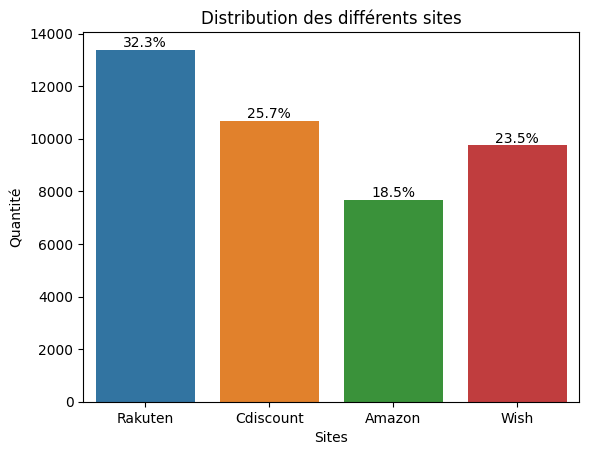

In [160]:
# Barplot du nombres d'avis par site 
print(df["Site"].value_counts())
ax=sns.countplot(x='Site', data=df)
ax.set(title="Distribution des différents sites",xlabel="Sites",ylabel="Quantité");

without_hue(ax,df.note)

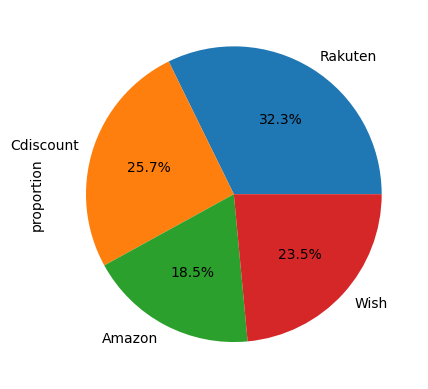

In [161]:
# Nombre de commentaire par site
df.Site.value_counts(True, False).plot.pie(autopct="%.1f%%")
plt.show()

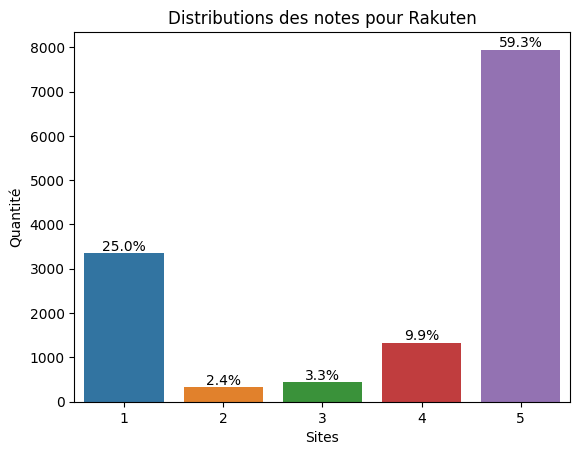

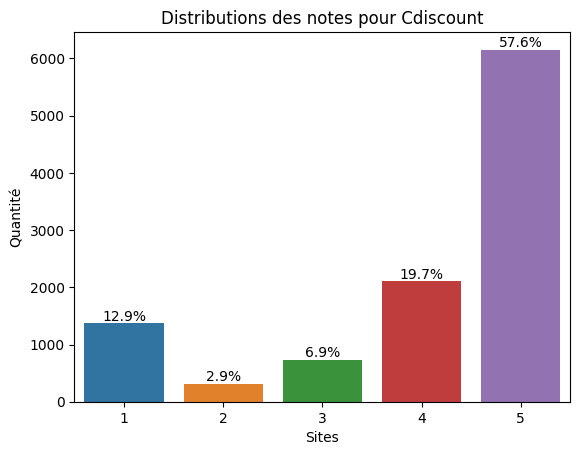

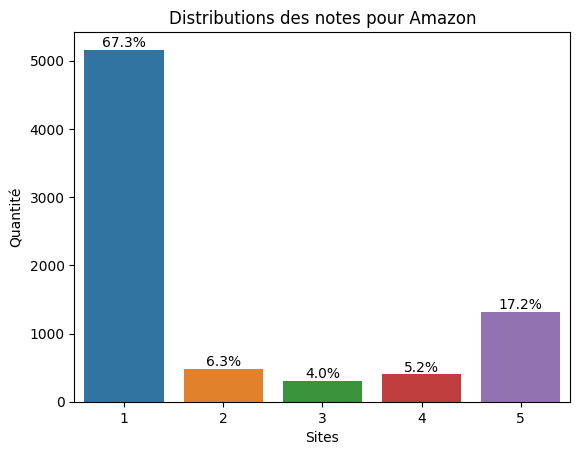

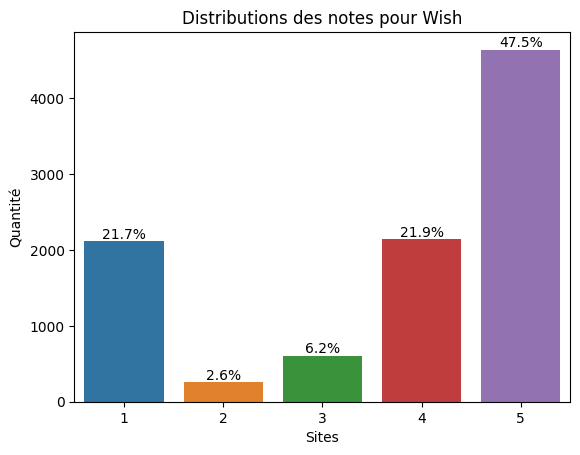

In [162]:
# Création d'un graphique en barres des notes pour chaque site
for site in df["Site"].unique():
    ax=sns.countplot(x='note', data=df[df["Site"]==site])
    ax.set(title="Distributions des notes pour {}".format(site),xlabel="Sites",ylabel="Quantité");        
    without_hue(ax,df[df["Site"]==site])

# La plupart de sites ont des clients très satisfaits, le seul site où la majorité de clients sont insatisfaits est Amazon

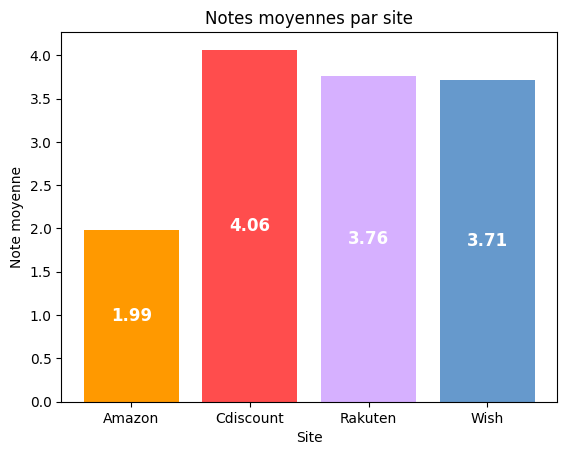

In [163]:
# Note moyenne par site e-commerce
moyennes = df.groupby('Site')['note'].mean()

# Création de la liste de couleurs correspondantes
colors = {'amazon': '#FF9900', 'cdiscount': '#FF4D4D', 'rakuten': '#D6B0FF', 'wish': '#6699CC'}

# Création du graphique
fig, ax = plt.subplots()
ax.bar(moyennes.index, moyennes.values, color=[colors.get(site.lower(), '#A9A9A9') for site in moyennes.index])

# Ajout des étiquettes d'axe et de titre
ax.set_xlabel("Site")
ax.set_ylabel("Note moyenne")
ax.set_title("Notes moyennes par site")

# Ajout des notes au milieu des barres
for i, v in enumerate(moyennes.values):
    ax.text(i, v/2, f"{v:.2f}", ha='center', va='center', color='white', fontweight='bold', fontsize=12)

# Affichage du graphique
plt.show()

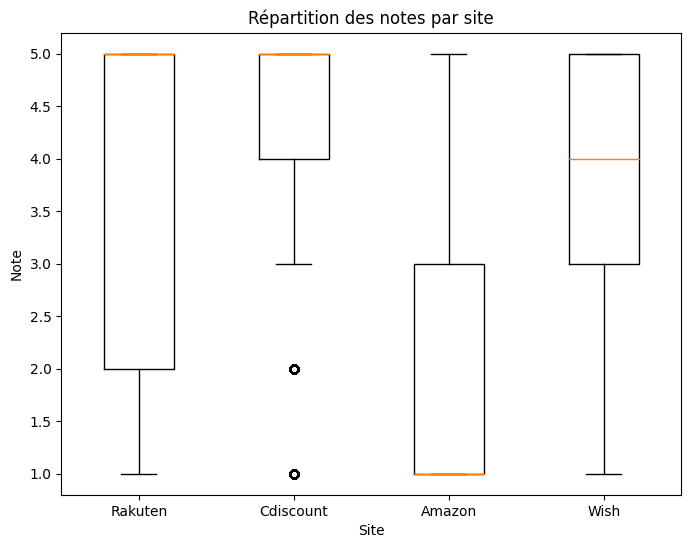

In [164]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Site'] == site]['note'] for site in df['Site'].unique()], labels=df['Site'].unique())

# Ajout des étiquettes d'axe et de titre
plt.xlabel("Site")
plt.ylabel("Note")
plt.title("Répartition des notes par site")

# Affichage du graphique
plt.show()

note
5    20049
1    11994
4     5972
3     2088
2     1379
Name: count, dtype: int64


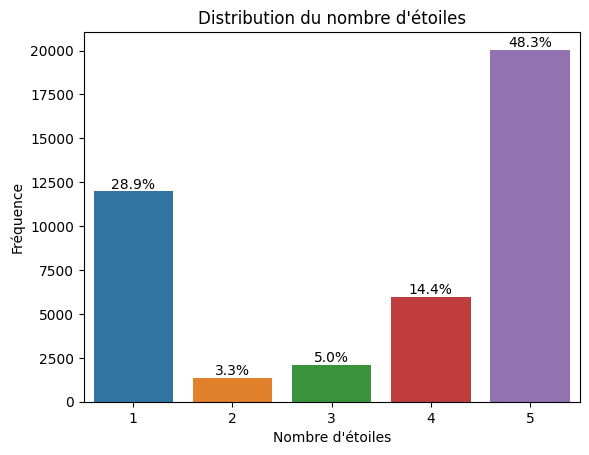

In [165]:
# Distribution du nombre d'étoiles

print(df["note"].value_counts())
ax=sns.countplot(x='note', data=df)
ax.set(title="Distribution du nombre d'étoiles",xlabel="Nombre d'étoiles",ylabel="Fréquence");
without_hue(ax,df.note)

# On peut observer clairement que la plupart des clients sont très satisfaits (à l'exception d'Amazon)
# Il n'y a pas beaucoup de notes intermédiaires, soit ils sont très insatisfaits soit ils sont très satisfaits

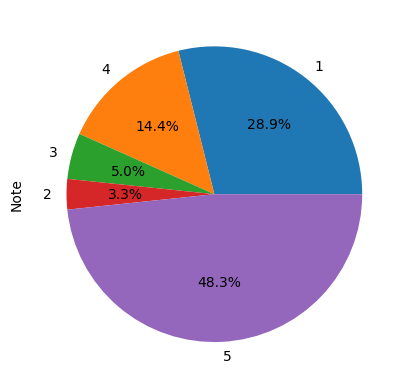

In [166]:
df.note.value_counts(True, False).plot.pie(autopct="%.1f%%")
plt.ylabel("Note")
plt.show()

pays
France                      37294
Canada                       1572
Belgium                      1101
Switzerland                   456
Reunion                       151
Morocco                        96
United Kingdom                 73
United States Of America       73
Spain                          69
Martinique                     65
Name: count, dtype: int64


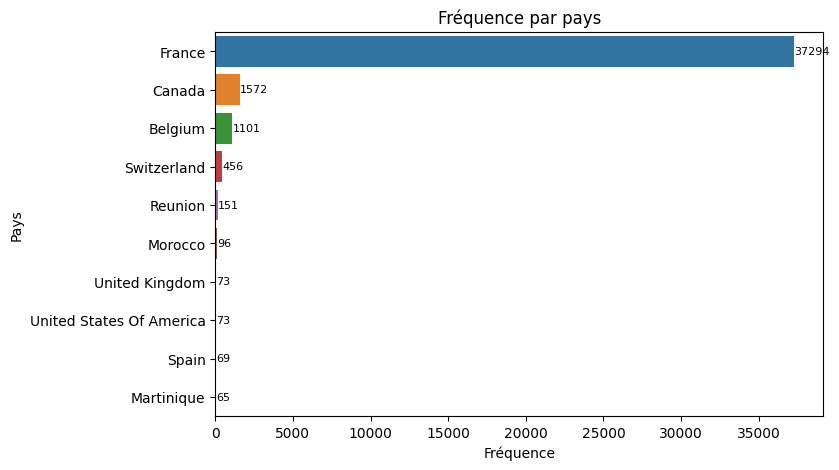

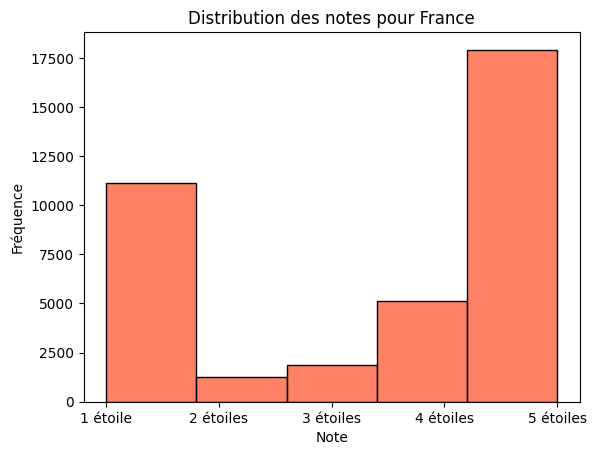

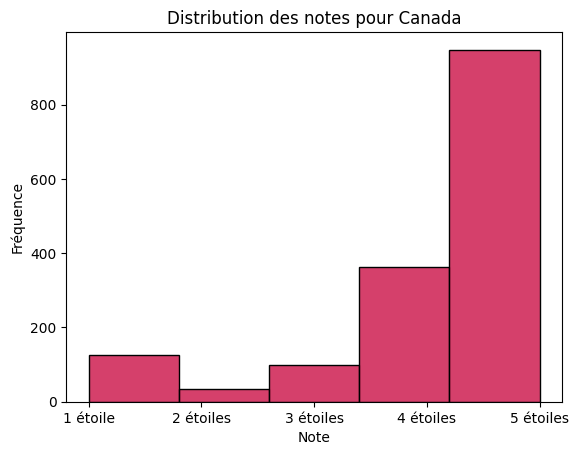

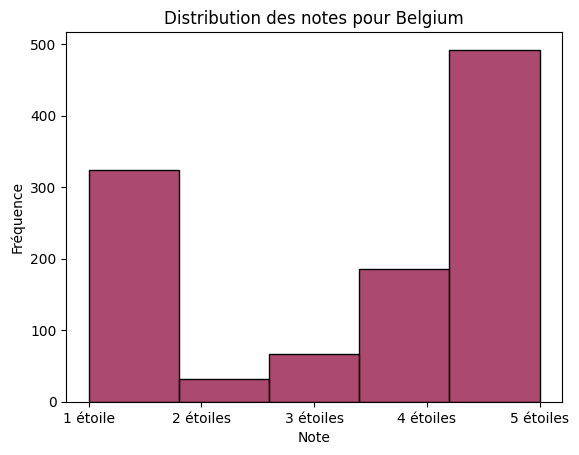

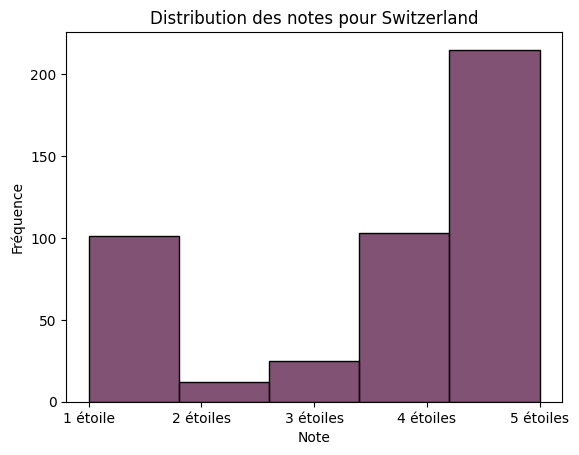

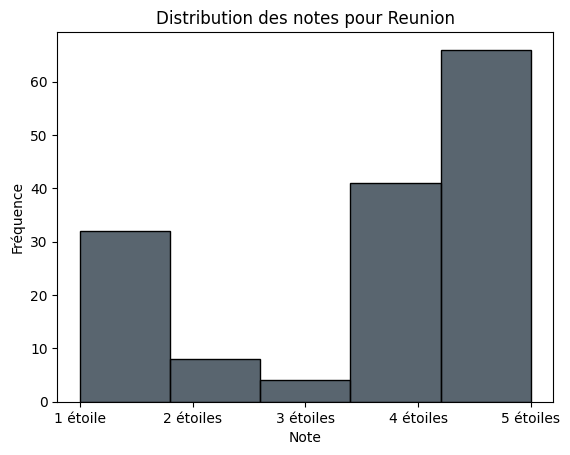

In [167]:
# Fréquence par pays
print(df["pays"].value_counts().head(10))

counts = df["pays"].value_counts().head(10)
x = sns.countplot(y=df['pays'], order=counts.index)
x.set(title="Fréquence par pays", xlabel="Fréquence", ylabel="Pays")

for i, count in enumerate(counts):
    x.text(count+1, i, str(count), va='center', fontsize=8)

plt.subplots_adjust(left=0, right=0.95, bottom=0.1, top=0.9)
plt.show()

# La plupart des avis proviennent de la France ce qui n'est pas étonnant car il s'agit des avis des sites présents en France.
# D'autres personnes ont également répondu depuis la Belgique, la Suisse et le Canada.

# Quelle est la distribution du nombre d'étoiles par pays ?

top_5_pays = df['pays'].value_counts().head(5).index

colors = ["#FF5733", "#C70039", "#900C3F", "#581845", "#22313F"]

for i, pays in enumerate(top_5_pays):
    subset = df[df['pays'] == pays]
    plt.figure()
    sns.histplot(data=subset, x="note", kde=False, bins=5, color=colors[i])
    plt.title("Distribution des notes pour " + pays)
    plt.xlabel("Note")
    plt.ylabel("Fréquence")
    plt.xticks(ticks=[1,2,3,4,5], labels=["1 étoile", "2 étoiles", "3 étoiles", "4 étoiles", "5 étoiles"])
    plt.show()


# Les canadiens semblent être bien plus satisfait que les autres pays 
# Suppression de la variable pays

df.drop(columns="pays",inplace=True)

jour_comm
8     1518
4     1479
18    1470
5     1458
9     1453
Name: count, dtype: int64
jour_exp
8     1492
5     1479
18    1474
4     1471
2     1437
Name: count, dtype: int64


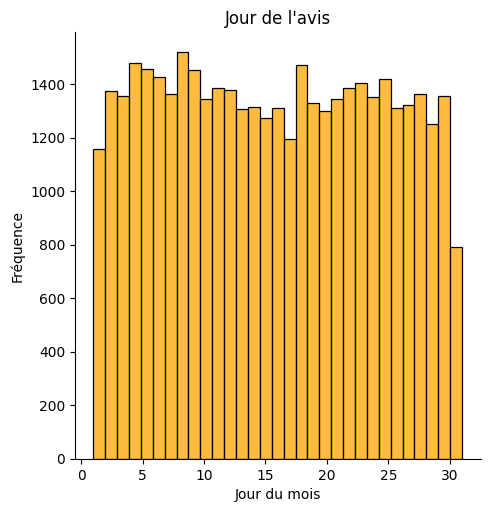

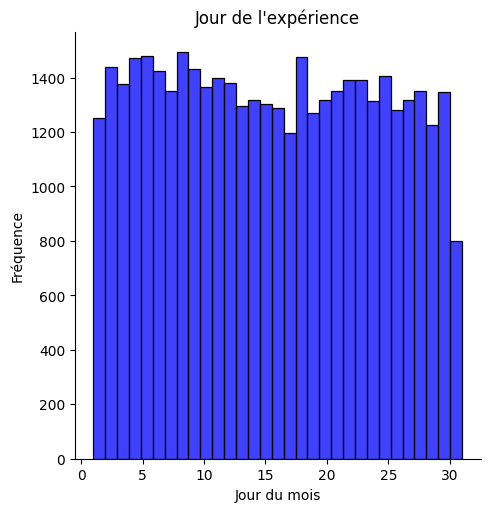

In [168]:
# Distribution du jour du commentaire

ax=sns.displot(df["jour_comm"], kind="hist", color="orange",bins=31)
ax.set(title="Jour de l'avis",xlabel="Jour du mois",ylabel="Fréquence"); 

print(df["jour_comm"].value_counts().head())

# Distribution du jour de l'expérience

ax=sns.displot(df["jour_exp"], kind="hist", color="blue",bins=31)
ax.set(title="Jour de l'expérience",xlabel="Jour du mois",ylabel="Fréquence"); 

print(df["jour_exp"].value_counts().head())

# Le jour de l'avis laissé sur le site ou de l'expérience n'ont pas une distribution particulière


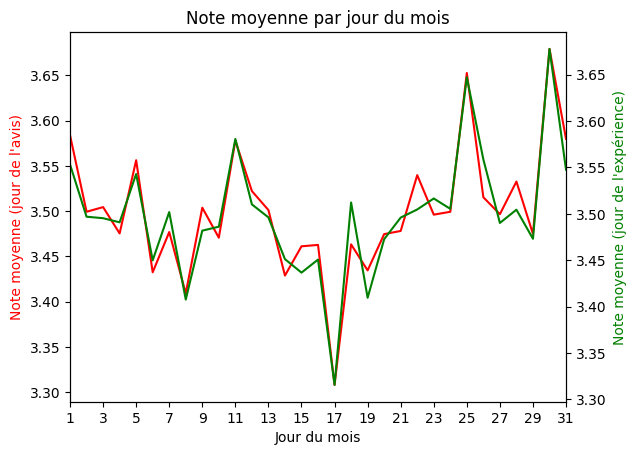

In [169]:
# Note moyenne par jour de l'avis et par jour de l'expérience

note_moy_jour_comm = df.groupby(df['jour_comm'])['note'].mean()
note_moy_jour_exp = df.groupby(df['jour_exp'])['note'].mean()

fig, ax = plt.subplots()

sns.lineplot(x=note_moy_jour_comm.index, y=note_moy_jour_comm, color='red', ax=ax)

ax2 = ax.twinx()
sns.lineplot(x=note_moy_jour_exp.index, y=note_moy_jour_exp, color='green', ax=ax2)

ax.set_title("Note moyenne par jour du mois")
ax.set_xlabel("Jour du mois")
ax.set_ylabel("Note moyenne (jour de l'avis)", color='red')

ax2.set_ylabel("Note moyenne (jour de l'expérience)", color='green')

ax.set_xticks(range(1, 32, 2))

ax.set_xlim(1, 31)

plt.show()

# La note moyenne oscille entre 3.30 et 3.65 peu importe le jour du mois. Ces deux variables n'apportent pas beaucoup d'information à l'analyse
# Suppression des deux variables de la base

df.drop(columns=["jour_comm","jour_exp"],inplace=True)

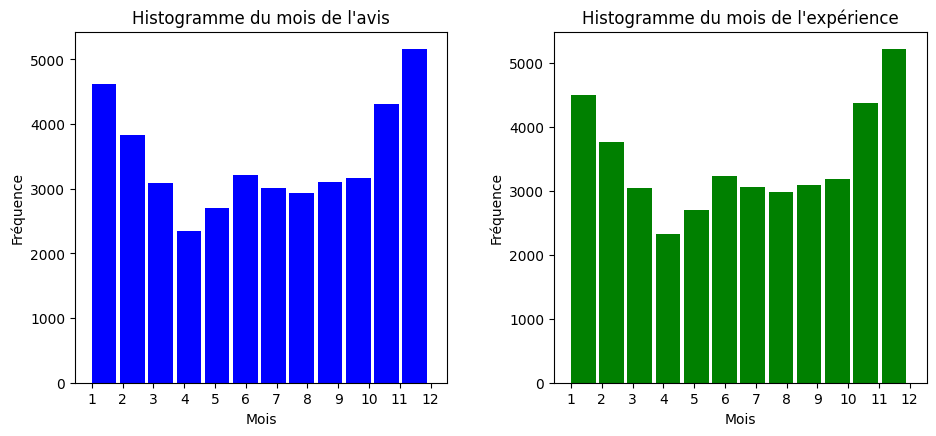

In [170]:
# Mois du commentaire et de l'expérience

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(df['mois_comm'], bins=12, color='blue', width=0.8)
ax[0].set(title='Histogramme du mois de l\'avis', xlabel='Mois', ylabel='Fréquence')
ax[0].set_xticks(range(1, 13))

ax[1].hist(df['mois_exp'], bins=12, color='green', width=0.8)
ax[1].set(title='Histogramme du mois de l\'expérience', xlabel='Mois', ylabel='Fréquence')
ax[1].set_xticks(range(1, 13))

fig.tight_layout(pad=3.0)

plt.show()

# Il semblerait qu'il y a plus d'avis au mois de décembre et au mois de janvier.


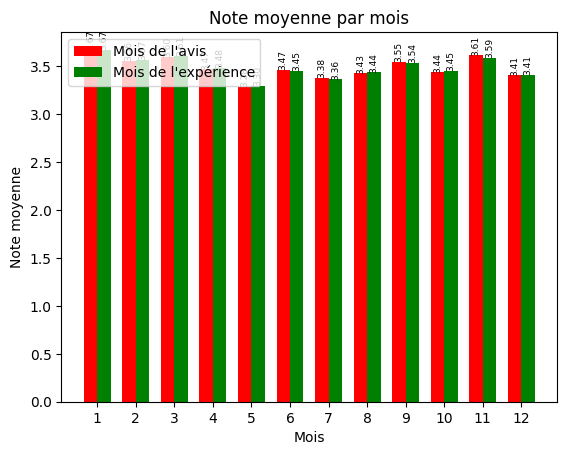

In [171]:
# Note moyenne par mois de l'avis et par mois de l'expérience

# Calcul de la note moyenne
note_moy_comm = df.groupby(df['mois_comm'])['note'].mean().to_list()
note_moy_exp = df.groupby(df['mois_exp'])['note'].mean().to_list()

# Création de la figure et des axes
fig, ax = plt.subplots()

# Coordonnées pour centrer les barres
bar_width = 0.35
x_pos = np.arange(1, 13)
center_pos_comm = x_pos - bar_width/2
center_pos_exp = x_pos + bar_width/2

# Création des barres côte à côte
bar1 = ax.bar(center_pos_comm, note_moy_comm, color='red', width=bar_width, label='Mois de l\'avis')
bar2 = ax.bar(center_pos_exp, note_moy_exp, color='green', width=bar_width, label='Mois de l\'expérience')

# Ajout des titres et des légendes
ax.set_title("Note moyenne par mois")
ax.set_xlabel("Mois")
ax.set_ylabel("Note moyenne")
ax.set_xticks(x_pos)
ax.legend()

# Ajout des annotations de note moyenne
for i, bar in enumerate(bar1):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            f"{note_moy_comm[i]:.2f}", ha='center', va='bottom', fontsize=6.5, rotation='vertical')
for i, bar in enumerate(bar2):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            f"{note_moy_exp[i]:.2f}", ha='center', va='bottom', fontsize=6.5, rotation='vertical')

plt.show()

# La note moyenne par mois de l'avis ou de l'expérience varie entre 3.30 et 3.67, ces variables ne semblent pas apporter beaucoup d'information à l'analyse, elles seront supprimées

df.drop(columns=["mois_comm","mois_exp"],inplace=True)

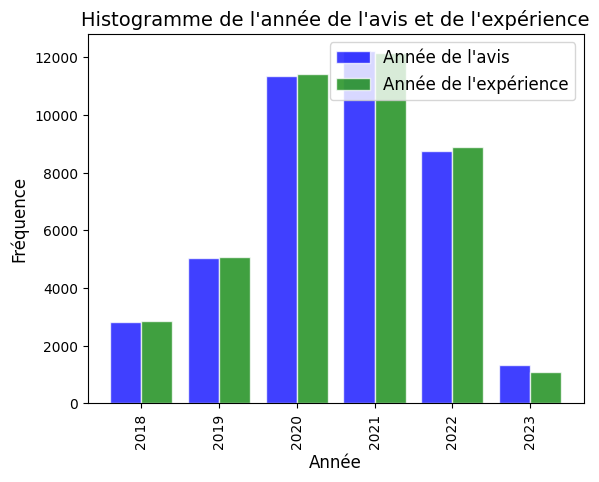

In [172]:
# Années des avis et de l'expérience

# Création de la figure et des axes
fig, ax = plt.subplots()

# Définition des données pour l'histogramme
annee_comm = df['annee_comm']
annee_exp = df['annee_exp']

# Liste des couleurs pour chaque dataset
colors = ['blue', 'green']

# Création de l'histogramme
ax.hist([annee_comm, annee_exp], bins=range(2018, 2025), color=colors, edgecolor='white', alpha=0.75, align='left')

# Ajout des titres et des légendes
ax.set_title("Histogramme de l'année de l'avis et de l'expérience", fontsize=14)
ax.set_xlabel("Année", fontsize=12)
ax.set_ylabel("Fréquence", fontsize=12)
ax.legend(['Année de l\'avis', 'Année de l\'expérience'], fontsize=12)

# Définition des ticks de l'axe des x
plt.xticks(range(2018, 2024), rotation=90, ha='center')

plt.show()


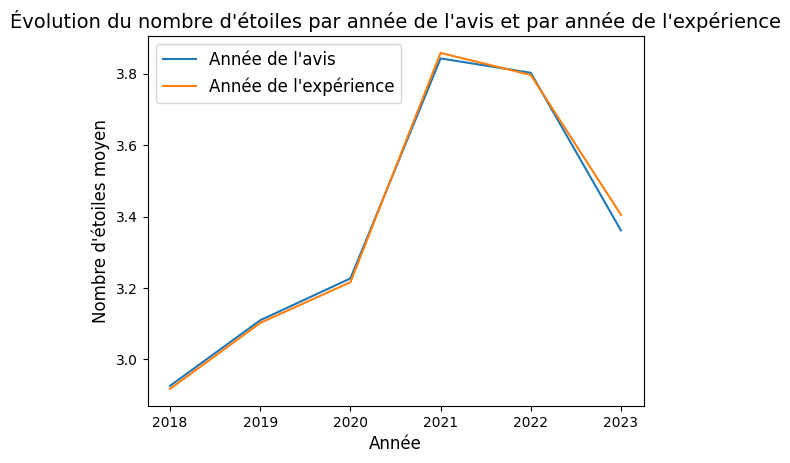

In [173]:
# Rélation entre l'année de l'avis et de l'expérience avec la note

# Groupement des données par année de l'avis et calcul de la moyenne du nombre d'étoiles
stars_by_year_comm = df.groupby('annee_comm')['note'].mean()

# Groupement des données par année de l'expérience et calcul de la moyenne du nombre d'étoiles
stars_by_year_exp = df.groupby('annee_exp')['note'].mean()

# Création de la figure et des axes
fig, ax = plt.subplots()

# Création des courbes
ax.plot(stars_by_year_comm.index, stars_by_year_comm, label='Année de l\'avis')
ax.plot(stars_by_year_exp.index, stars_by_year_exp, label='Année de l\'expérience')

# Ajout des titres et des légendes
ax.set_title("Évolution du nombre d'étoiles par année de l'avis et par année de l'expérience", fontsize=14)
ax.set_xlabel("Année", fontsize=12)
ax.set_ylabel("Nombre d'étoiles moyen", fontsize=12)
ax.legend(fontsize=12)

plt.show()

# On peut observer que la note moyenne s'est amélioré avec le temps et que la variable année est très importante pour expliquer la satisfaction.
# Etant donnée que l'année de l'avis et du commentaire sont quasiment toujours les mêmes on peut garder uniquement la variable année de l'avis

df.drop(columns="annee_exp",inplace=True)

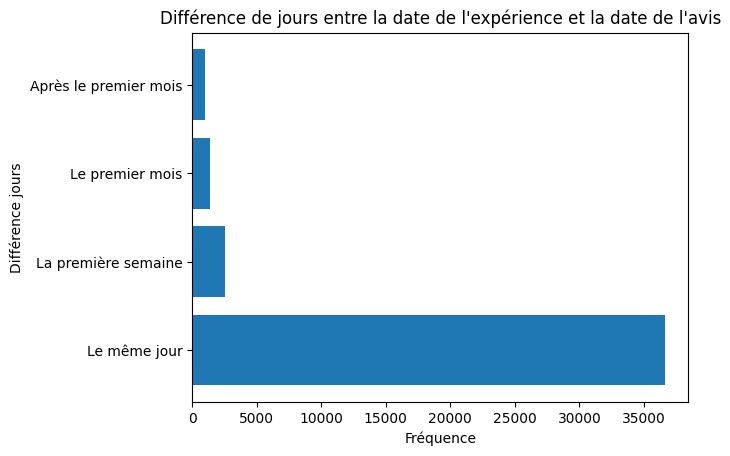

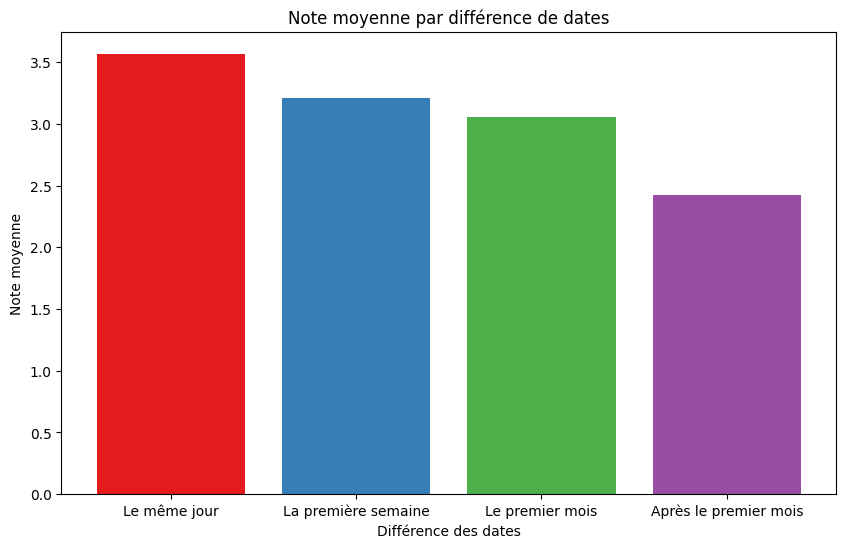

In [174]:
# Analyse de la différence de jours entre la date de l'avis et la date de l'expérience

df["diff_jours"] = df.apply(get_diff_jours, axis=1)

counts=df["diff_jours"].value_counts()

# Création du diagramme en barres
plt.barh(counts.index, counts.values)

plt.title('Différence de jours entre la date de l\'expérience et la date de l\'avis')
plt.xlabel('Fréquence')
plt.ylabel('Différence jours')

plt.show()

# La plupart des gens laissent un avis le même jour de l'achat sur le site Amazon

# Est-ce que cette variable a un impact sur la satisfaction des clients?

means = df.groupby('diff_jours')['note'].mean().sort_values(ascending=False)

colors = plt.cm.Set1(range(len(means.index)))

plt.figure(figsize=(10, 6))
plt.bar(means.index, means.values, color=colors)

plt.title('Note moyenne par différence de dates')
plt.xlabel('Différence des dates')
plt.ylabel('Note moyenne')

plt.show()

# La note moyenne ne varie pas beaucoup par rapport à cette variable, elle sera éliminée de la base

df.drop(columns=["diff_jours","difference_jours"],inplace=True)

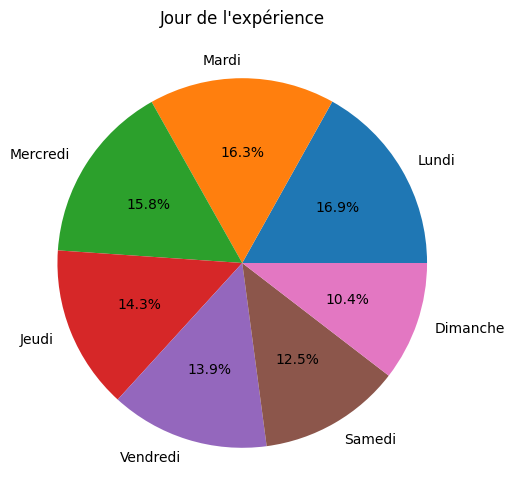

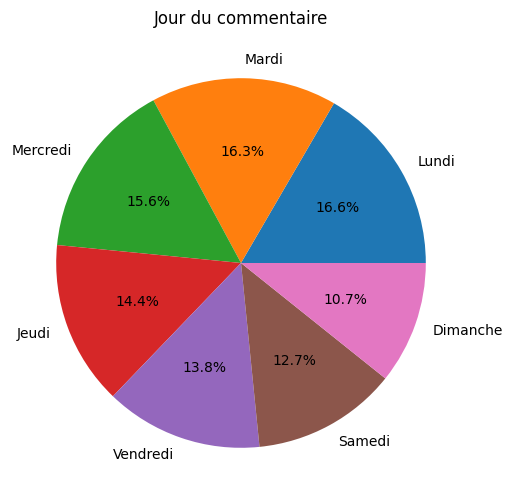

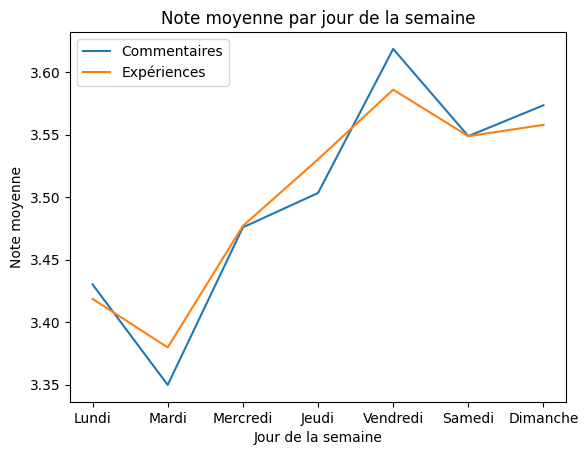

In [175]:
# Définition des nouveaux labels
labels_fr = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

count_exp = df['jour_semaine_exp'].value_counts()

# Création du pie chart pour la variable jour_semaine_exp
plt.figure(figsize=(8, 6))
plt.pie(count_exp, labels=labels_fr, autopct='%1.1f%%')
plt.title('Jour de l\'expérience')
plt.show()


count_comm = df['jour_semaine_comm'].value_counts()

# Création du pie chart pour la variable jour_semaine_comm
plt.figure(figsize=(8, 6))
plt.pie(count_comm, labels=labels_fr, autopct='%1.1f%%')
plt.title('Jour du commentaire')
plt.show()

# Les internautes ont laissé plus d'avis en début de semaine

# Quelle influence sur la satisfaction ?

labels_fr = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['jour_semaine_comm'] = pd.Categorical(df['jour_semaine_comm'], categories=labels, ordered=True)
df['jour_semaine_exp'] = pd.Categorical(df['jour_semaine_exp'], categories=labels, ordered=True)

note_moy_comment = df.groupby('jour_semaine_comm')['note'].mean().reindex(labels)
note_moy_experience = df.groupby('jour_semaine_exp')['note'].mean().reindex(labels)

# Création du graphique pour les commentaires
plt.plot(note_moy_comment.index, note_moy_comment.values, label='Commentaires')

# Création du graphique pour les expériences
plt.plot(note_moy_experience.index, note_moy_experience.values, label='Expériences')

plt.title('Note moyenne par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Note moyenne')
plt.xticks(range(len(labels)), labels_fr)
plt.legend()

plt.show()

# Les clients semblent être plus satisfait les week-ends
# On retient la variable jour semaine commentaire

df.drop(columns=["jour_semaine_exp"],inplace=True)


nb_mots_titre
6     6869
7     5832
2     5664
5     5257
1     4694
3     4611
4     4000
8     2811
9      910
10     334
11     165
12      93
14      50
13      48
15      34
16      24
Name: count, dtype: int64


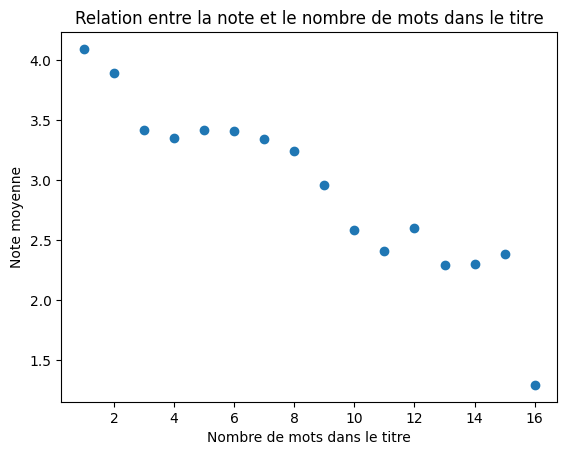

In [176]:
# Nombre de mots utilisés dans le titre

print(df["nb_mots_titre"].value_counts().head(16))

# Influence du nombre de mots dans le titre sur la satisfaction
note_moy_mots_titre = df[df['nb_mots_titre']<17].groupby('nb_mots_titre')['note'].mean()

plt.scatter(note_moy_mots_titre.index, note_moy_mots_titre.values, label='Commentaires')

plt.xlabel('Nombre de mots dans le titre')
plt.ylabel('Note moyenne')
plt.title('Relation entre la note et le nombre de mots dans le titre')

plt.show()

# Plus le titre est long plus le client semble être insatisfait


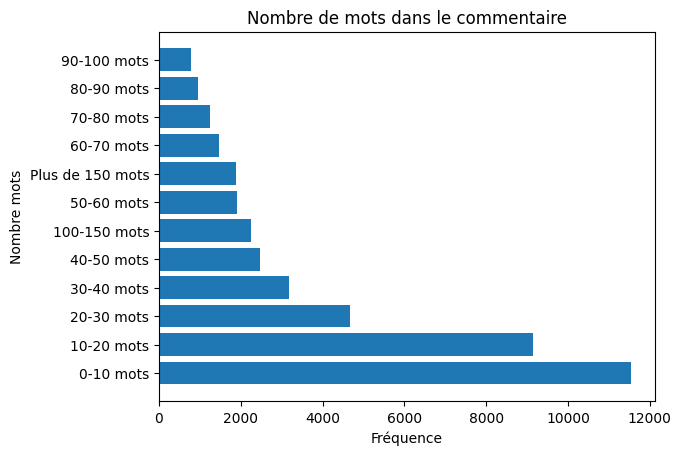

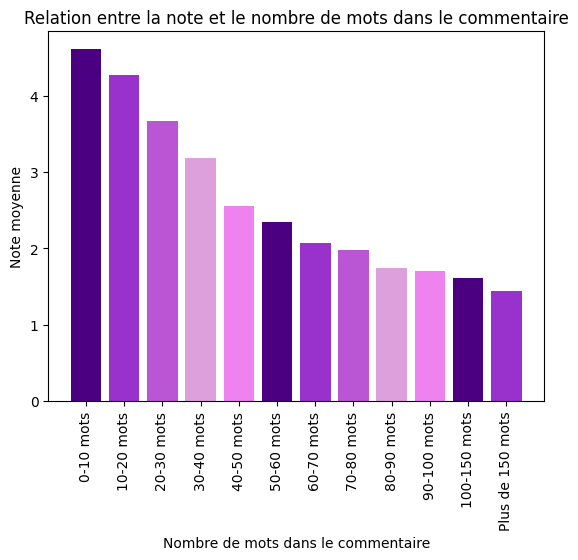

In [177]:
# Nombre de mots utilisés dans le commentaire

df["nb_mots_comm_disc"] = df.apply(nb_mots, axis=1)

counts=df["nb_mots_comm_disc"].value_counts()

# Création du diagramme en barres
plt.barh(counts.index, counts.values)

plt.title('Nombre de mots dans le commentaire')
plt.xlabel('Fréquence')
plt.ylabel('Nombre mots')

plt.show()

# Influence du nombre de mots dans le commentaire sur la satisfaction

couleurs = ['indigo','darkorchid','mediumorchid','plum','violet']

ordre=["0-10 mots","10-20 mots","20-30 mots","30-40 mots","40-50 mots","50-60 mots","60-70 mots","70-80 mots",
       "80-90 mots","90-100 mots","100-150 mots","Plus de 150 mots"]

df['nb_mots_comm_disc'] = pd.Categorical(df['nb_mots_comm_disc'], categories=ordre, ordered=True)
note_moy_mots_comm = df.groupby('nb_mots_comm_disc')['note'].mean().reindex(ordre)

plt.bar(note_moy_mots_comm.index.astype(str), note_moy_mots_comm.values, label='Commentaires', color=couleurs)

plt.xlabel('Nombre de mots dans le commentaire')
plt.ylabel('Note moyenne')
plt.title('Relation entre la note et le nombre de mots dans le commentaire')

plt.xticks(rotation='vertical')

plt.show()

# De la même manière que pour le titre, plus il y a des mots dans le commentaire plus le client est insatisfait

# Les conclusions sur l'analyse du titre et des commentaires semblent être similaires. On va analyser uniquement les commentaires

df.drop(columns="nb_mots_titre",inplace=True)

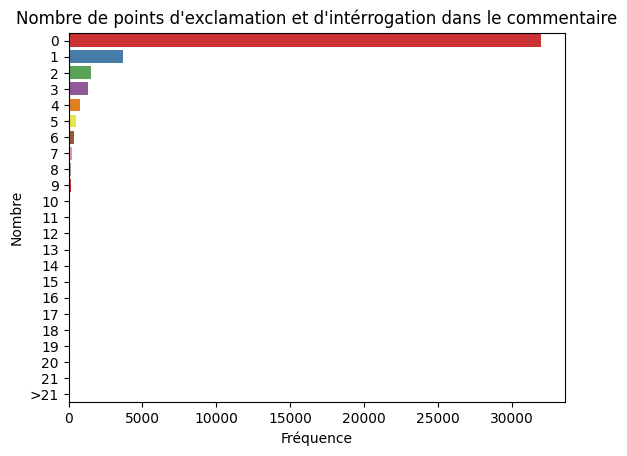

In [182]:
# Analyse du nombre de points d'exclamation et d'intérrogation dans le commentaire

df["expression_count_comm_str"]=df["expression_count_comm"].map(str)
df["expression_count_comm2"] = df.apply(nb_exp, axis=1,args=(21,))

df["expression_count_comm2"].value_counts()

ordre=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21",">21"]

df["expression_count_comm2"] = pd.Categorical(df["expression_count_comm2"], categories=ordre, ordered=True)

ax=sns.countplot(y=df["expression_count_comm2"], palette="Set1")
ax.set(title="Nombre de points d'exclamation et d'intérrogation dans le commentaire",xlabel="Fréquence",ylabel="Nombre")

plt.show(); 


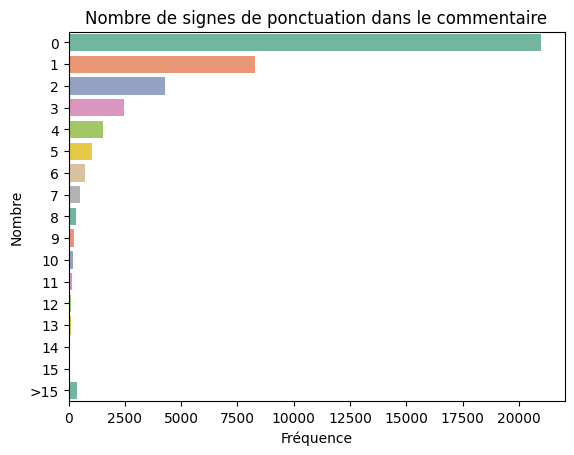

In [183]:
# Analyse du nombre de signes de ponctuation dans le commentaire

df["standard_count_comm_str"]=df["standard_count_comm"].map(str)


df["standard_count_comm2"] = df.apply(nb_expbis, axis=1,args=(15,))

df["standard_count_comm2"].value_counts()

ordre=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",">15"]

df["standard_count_comm2"] = pd.Categorical(df["standard_count_comm2"], categories=ordre, ordered=True)

ax = sns.countplot(y=df["standard_count_comm2"], palette="Set2")
ax.set(title="Nombre de signes de ponctuation dans le commentaire", xlabel="Fréquence", ylabel="Nombre")
plt.show();

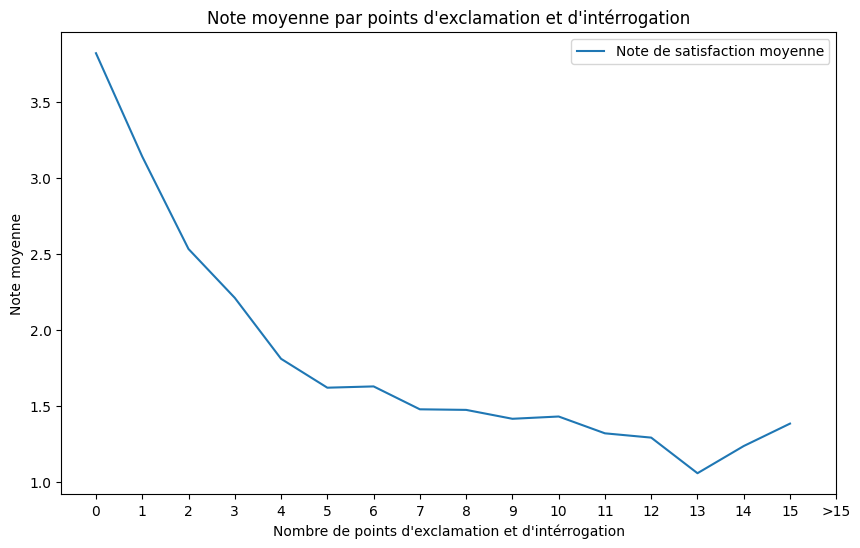

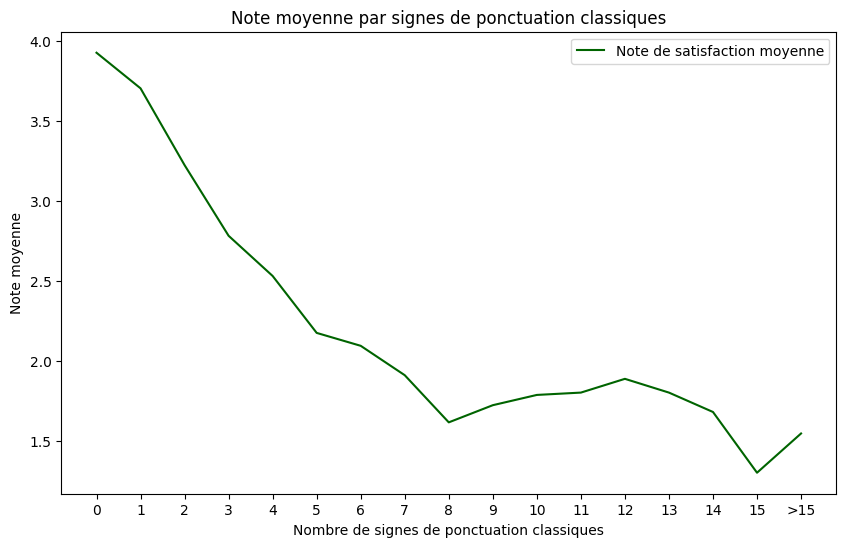

In [184]:
# Quel est la relation entre le nombre de points d'exclamation et d'intérrogation et la satisfaction ?

note_moy_comment = df.groupby('expression_count_comm2')['note'].mean().reindex(ordre)
plt.figure(figsize=(10, 6))
plt.plot(note_moy_comment.index, note_moy_comment.values, label='Note de satisfaction moyenne')
plt.title('Note moyenne par points d\'exclamation et d\'intérrogation')
plt.xlabel('Nombre de points d\'exclamation et d\'intérrogation')
plt.ylabel('Note moyenne')
plt.xticks(range(len(ordre)), ordre)
plt.legend()

plt.show()

# Plus le client utilise des points d'exclamation et d'intérrogation plus il est insatisfait

df.drop(columns="expression_count_titre",inplace=True)

# Quel est la relation entre le nombre de signes de ponctuation classiques et la satisfaction ?

note_moy_comment = df.groupby('standard_count_comm2')['note'].mean().reindex(ordre)
plt.figure(figsize=(10, 6))
plt.plot(note_moy_comment.index, note_moy_comment.values, color="darkgreen", label='Note de satisfaction moyenne')
plt.title('Note moyenne par signes de ponctuation classiques')
plt.xlabel('Nombre de signes de ponctuation classiques')
plt.ylabel('Note moyenne')
plt.xticks(range(len(ordre)), ordre)
plt.legend()

plt.show();

# Plus le client utilise des signes de ponctuation classiques plus il est insatisfait, cela doit être un effet longueur du commentaire: il faut se méfier de cette conclusion

df.drop(columns="standard_count_titre",inplace=True)



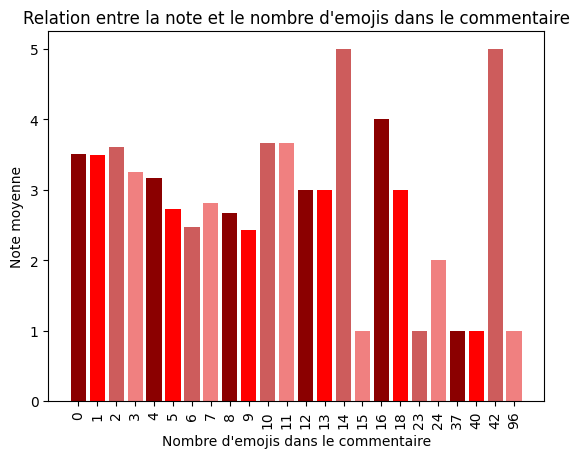

In [185]:
# Combien d'emojis a utilisé le client dans son commentaire ?
df["nb_emoji_comm"].value_counts()

# Uniquement quelques clients ont utilisé des emojis

# Est-ce que cela a un impact sur la satisfaction ?

note_moy_emoji_comm = df.groupby('nb_emoji_comm')['note'].mean()

couleurs = ['darkred','red','indianred','lightcoral']
plt.bar(note_moy_emoji_comm.index.astype(str), note_moy_emoji_comm.values, label='Commentaires', color=couleurs)

plt.xlabel('Nombre d\'emojis dans le commentaire')
plt.ylabel('Note moyenne')
plt.title('Relation entre la note et le nombre d\'emojis dans le commentaire')

plt.xticks(rotation='vertical')

plt.show()

# Cette variable ne semble pas avoir un impact significatif sur la note attribuée


In [186]:
# Nombre d'emojis positifs et négatifs
print(df["count_emoji_pos_comm"].value_counts(""))
print(df["count_emoji_neut_comm"].value_counts(""))
print(df["count_emoji_neg_comm"].value_counts(""))

corr_pos, _ = pearsonr(df["count_emoji_pos_comm"], df["note"])
print("Corrélation entre le nombre d'emojis positifs et la note :", corr_pos)

corr_neg, _ = pearsonr(df["count_emoji_neg_comm"], df["note"])
print("Corrélation entre le nombre d'emojis négatifs et la note :", corr_neg)

corr_neut, _ = pearsonr(df["count_emoji_neut_comm"], df["note"])
print("Corrélation entre le nombre d'emojis neutre et la note :", corr_neg)
# Les corrélations sont assez faibles, ces variables seront supprimées de la base

df.drop(columns=["emoji_titre","nb_emoji_titre","emoji_comm","nb_emoji_comm",
                 "count_emoji_pos_titre","count_emoji_neg_titre","count_emoji_pos_comm",
                 "count_emoji_neg_comm","count_emoji_neut_titre","count_emoji_neut_comm"],inplace=True)

count_emoji_pos_comm
0     40923
1       301
2       129
3        57
4        30
5        10
6         9
9         4
7         3
12        2
8         2
18        2
11        2
13        2
21        1
23        1
32        1
33        1
42        1
16        1
Name: count, dtype: int64
count_emoji_neut_comm
0    41410
1       47
2       14
5        4
4        2
3        2
8        1
7        1
9        1
Name: count, dtype: int64
count_emoji_neg_comm
0     41213
1       129
2        49
3        29
4        14
5        13
6        12
7         6
9         5
8         5
15        3
11        1
13        1
56        1
23        1
Name: count, dtype: int64
Corrélation entre le nombre d'emojis positifs et la note : 0.02151023141636258
Corrélation entre le nombre d'emojis négatifs et la note : -0.05706100986635015
Corrélation entre le nombre d'emojis neutre et la note : -0.05706100986635015


Contains_Ellipsis_comm
0    36022
1     5460
Name: count, dtype: int64


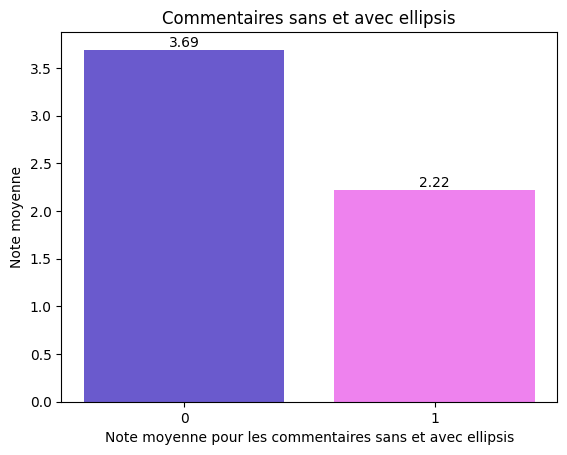

In [187]:
# Analyse des points de suspension 

print(df["Contains_Ellipsis_comm"].value_counts())

note_moy_ellipsis = df.groupby('Contains_Ellipsis_comm')['note'].mean()

couleurs=["slateblue","violet"]

plt.bar(note_moy_ellipsis.index.astype(str), note_moy_ellipsis.values, label='Commentaires', color=couleurs)

for i, val in enumerate(note_moy_ellipsis.values):
    plt.annotate(str(round(val, 2)), xy=(i, val), ha='center', va='bottom')

plt.xlabel('Note moyenne pour les commentaires sans et avec ellipsis')
plt.ylabel('Note moyenne')
plt.title('Commentaires sans et avec ellipsis')

plt.show()

# La note moyenne est plus élevée pour les clients qui n'ont pas utilisés des points de suspension dans leur commentaire

df.drop(columns="Contains_Ellipsis_titre",inplace=True)


In [188]:
# Analyse de la longueur du commentaire et de sa corrélation avec la variable nombre de mots dans le commentaire

print(df["long_comm"].value_counts())

print(df.groupby('long_comm')['note'].mean())

corr, _ = pearsonr(df["long_comm"], df["nb_mots_comm"])
print("Corrélation entre la longueur du commentaire et la note :", corr)

# La variable longueur du commentaire et parfaitement correlée avec la variable nombre de mots dans le commentaire, cette variable sera supprimée

df.drop(columns=["long_titre","long_comm"],inplace=True)


long_comm
41      346
42      343
43      332
46      313
47      312
       ... 
2483      1
1630      1
3059      1
1227      1
9926      1
Name: count, Length: 1834, dtype: int64
long_comm
11      4.285714
12      4.447761
13      4.592593
14      4.628571
15      4.619883
          ...   
5728    1.000000
6285    1.000000
6502    1.000000
9833    1.000000
9926    4.000000
Name: note, Length: 1834, dtype: float64
Corrélation entre la longueur du commentaire et la note : 0.9971319995490675


Le pourcentage de clients qui n'ont pas utilisé des majuscules dans leur commentaire est 83.05%


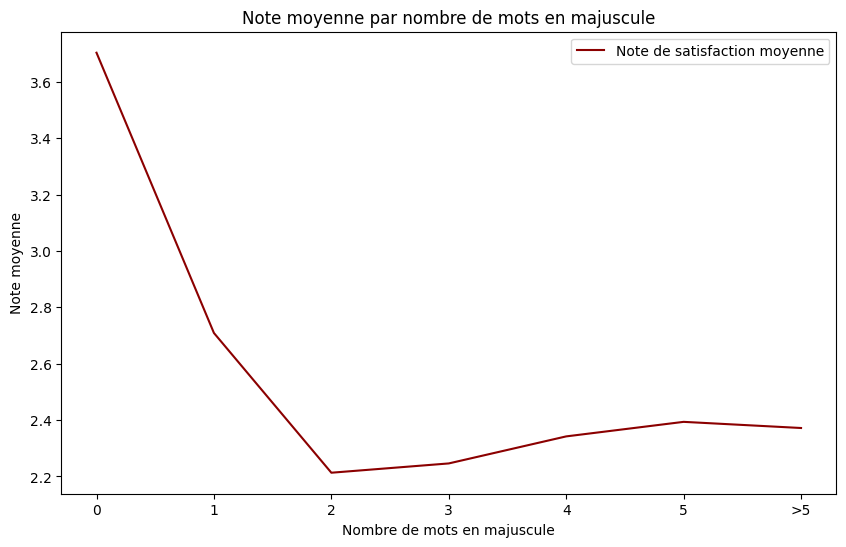

In [189]:
# Analyse du nombre de majuscules dans le commentaire

counts = df["nb_mots_maj_comm"].value_counts()
zeros = counts.get(0, 0)
percentage = zeros / len(df) * 100
print(f"Le pourcentage de clients qui n'ont pas utilisé des majuscules dans leur commentaire est {percentage:.2f}%")

df["nb_mots_maj_comm_str"]=df["nb_mots_maj_comm"].map(str)

df["nb_mots_maj_comm2"] = df.apply(nb_expter, axis=1,args=(5,))

df["nb_mots_maj_comm2"].value_counts()

ordre=["0","1","2","3","4","5",">5"]

df["nb_mots_maj_comm2"] = pd.Categorical(df["nb_mots_maj_comm2"], categories=ordre, ordered=True)

note_moy_comment = df.groupby('nb_mots_maj_comm2')['note'].mean().reindex(ordre)
plt.figure(figsize=(10, 6))
plt.plot(note_moy_comment.index, note_moy_comment.values, color="darkred",label='Note de satisfaction moyenne')
plt.title('Note moyenne par nombre de mots en majuscule')
plt.xlabel('Nombre de mots en majuscule')
plt.ylabel('Note moyenne')
plt.xticks(range(len(ordre)), ordre)
plt.legend()

plt.show();

# Plus le client utilise des mots en majuscule plus il semble être insatisfait

df = df.set_index("customer_name")
df.drop(columns=['commentaire_mots','titre_mots', 'nb_mots_maj_titre', 'lemmatized_tokens_titre', 'nb_mots_comm_disc', 'expression_count_comm_str',
       'expression_count_comm2', 'standard_count_comm_str','standard_count_comm2', 'nb_mots_maj_comm_str', 'nb_mots_maj_comm2',
       'titre_commentaire','date_experience', 'date_commentaire'],inplace=True)

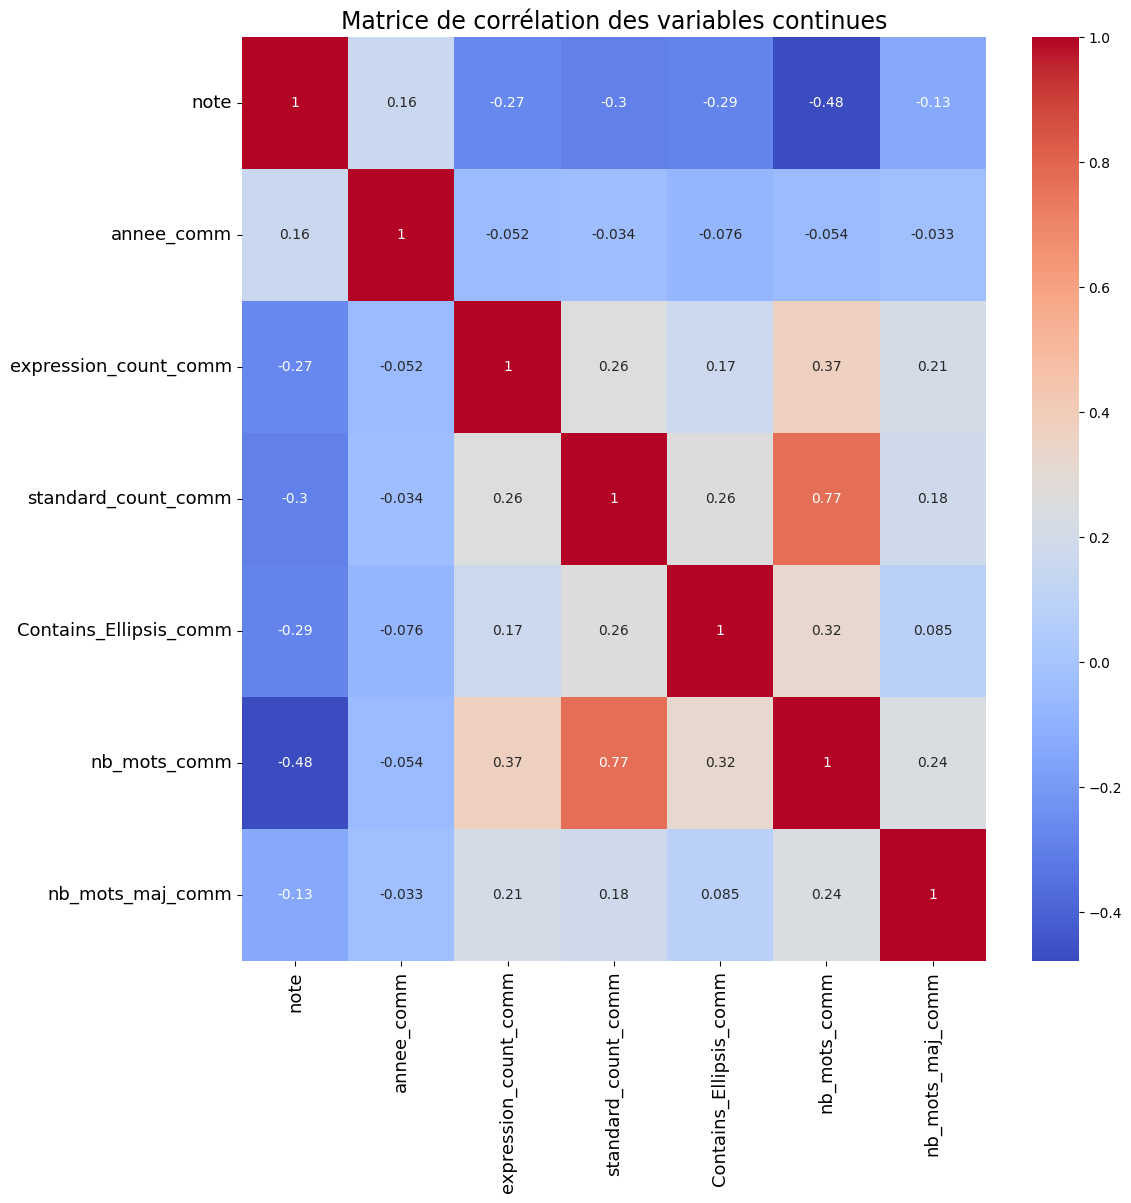

In [190]:
# Matrice de corrélation des variables continues
dfcor=df.drop(columns=["commentaire"])
numerique=dfcor.select_dtypes(include=['float','int'])
cor = numerique.corr() 
fig, ax = plt.subplots(figsize=(12,12)) 
matrice=sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm')
plt.title(label="Matrice de corrélation des variables continues",size=17)
plt.yticks(size=13)
plt.xticks(size=13); 

# Les variables "nombre de mots dans le commentaire" et "nombre de signes de ponctuation standard" sont fortement correlées, cette dernière est moins correlée à la note, elle peut donc
# être supprimée de la base

df.drop(columns="standard_count_comm", inplace=True)


## Analyse des bigrammes

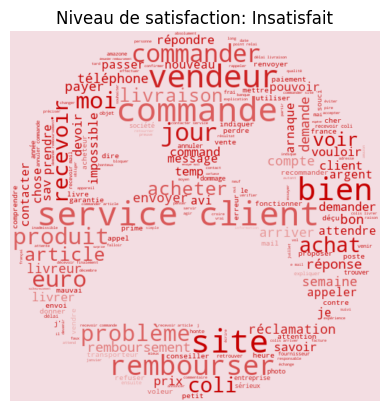

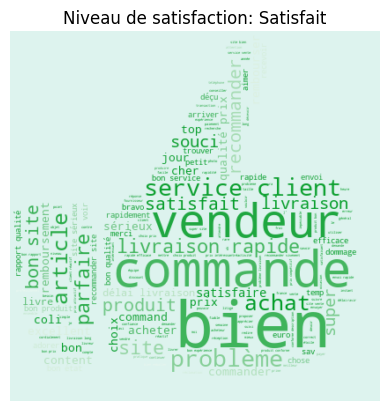

In [191]:
# Word cloud des mots positifs et négatifs
# Ouverture de l'image
image = Image.open("unhappy.jpg")
# Conversion de l'image en rgb: tableau de tuples de 3 ratios de couleur rouge, vert et bleue
image = image.convert('RGB')
# Dimension de l'image
l,h=image.size
#Création d'une nouvelle image avec les mêmes dimensions
im = Image.new(mode="RGB", size=(l, h))
#parcours des pixels
for x in range(l):
    for y in range(h):
        #on récupère la couleur du pixel
        r,g,b=image.getpixel((x,y))
        if r!=255:
            im.putpixel((x,y), (198, 0, 0))# on choisit une nouvelle couleur à la place du noir 
        else:
            im.putpixel((x,y), (r, g, b))# on laisse le reste tel qu'il était avant
            
# Nuage de mots par note (satisfait, insatisfait)
df_bad = df[df['type'] == 'Insatisfait']# Création d'un dataframe pour les avis insatisfaits
tokens_bad = [token for sublist in df_bad['lemmatized_tokens_comm'] for token in sublist]#récupération des tokens de la liste des commentaires lemmatizés
text_bad = ' '.join(tokens_bad)# jointure des tokens en un seul texte

custom_mask = np.array(im)#initialisation du mask
wc = WordCloud(background_color="#f3dde2", mask=custom_mask)#déclaration du nuage de mots avec le mask
wc.generate(text_bad)#les mots 
image_colors = ImageColorGenerator(custom_mask)#récupération des couleurs du nuage de mots
wc.recolor(color_func=image_colors)# ajout des couleurs pour le nuage de mots

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Niveau de satisfaction: Insatisfait')
plt.show()

# Avis satisfaits
df_good = df[df['type'] == 'Satisfait']
tokens_good = [token for sublist in df_good['lemmatized_tokens_comm'] for token in sublist]
text_good = ' '.join(tokens_good)
  
        
custom_mask = np.array(Image.open('satisfait.jpg'))
wc = WordCloud(background_color="#ddf3ee", mask=custom_mask)
wc.generate(text_good)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func=image_colors)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Niveau de satisfaction: Satisfait')
plt.show()

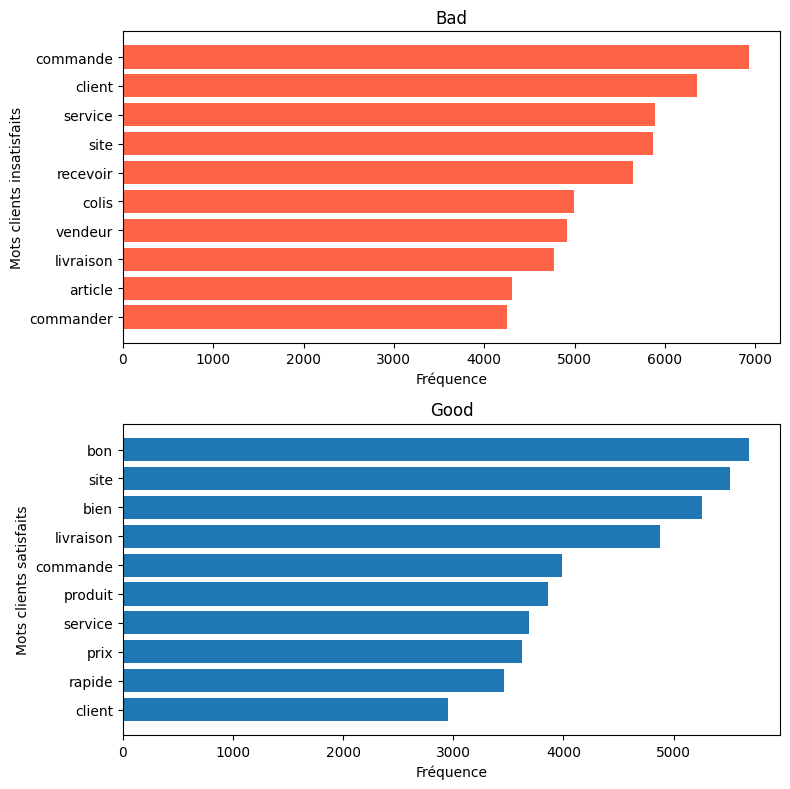

In [192]:
# Etudes des mots les plus fréquents Positifs/Négatifs

tokens_bad = [token.lower() for token in tokens_bad if token.isalpha() or token.isalnum()]# transformation de chaque élément de la liste "tokens_bad" en minuscules en utilisant la méthode 
#"lower()", mais seulement si l'élément est une lettre alphabétique ou alphanumérique, en utilisant les méthodes "isalpha()" et "isalnum()".
fdist_bad = nltk.FreqDist(tokens_bad)#Calcul des fréquences des éléments dans la liste "tokens_bad" avec NLTK.

tokens_good = [token.lower() for token in tokens_good if token.isalpha() or token.isalnum()]#transformation de chaque élément de la liste "tokens_good" en minuscules en utilisant la méthode 
#"lower()", mais seulement si l'élément est une lettre alphabétique ou alphanumérique, en utilisant les méthodes "isalpha()" et "isalnum()".
fdist_good = nltk.FreqDist(tokens_good)#Calcul des fréquences des éléments dans la liste "tokens_good" avec NLTK.

sorted_fdist_bad = sorted(fdist_bad.items(), key=lambda x: x[1], reverse=True)# Tri des occurrences de fdist_bad en ordre décroissant basé sur les valeurs.
sorted_fdist_good = sorted(fdist_good.items(), key=lambda x: x[1], reverse=True)# Tri des occurrences de fdist_good en ordre décroissant basé sur les valeurs.

fig, axs = plt.subplots(2, 1, figsize=(8, 8))  # Création d'une grille de 2 sous-graphiques

axs[0].barh(list(zip(*sorted_fdist_bad[:10]))[0], list(zip(*sorted_fdist_bad[:10]))[1], color="tomato")
axs[0].set_title("Bad")
axs[0].set_ylabel('Mots clients insatisfaits')
axs[0].set_xlabel('Fréquence')
axs[0].invert_yaxis()

axs[1].barh(list(zip(*sorted_fdist_good[:10]))[0], list(zip(*sorted_fdist_good[:10]))[1])
axs[1].set_title("Good")
axs[1].set_ylabel('Mots clients satisfaits')
axs[1].set_xlabel('Fréquence')
axs[1].invert_yaxis()

plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour éviter la superposition
plt.show()

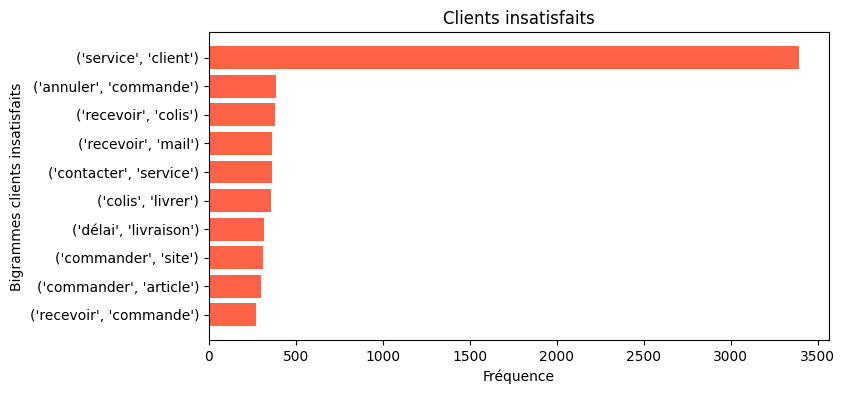

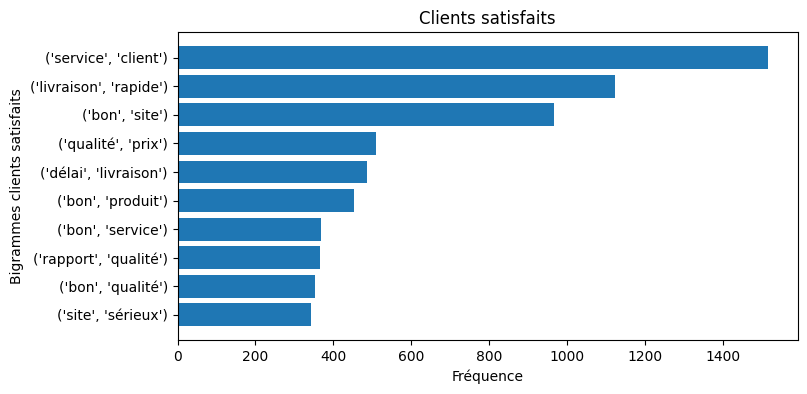

In [193]:
# Etudes des bigrammes les plus fréquents Positifs/Négatifs
bigrams_bad = list(bigrams(tokens_bad))# création d'une liste de bigrammes à partir des tokens négatifs
fdist_bigrams_bad = nltk.FreqDist(bigrams_bad)# étude de la fréquence des bigrammes négatifs
top_10_bigrams_bad = fdist_bigrams_bad.most_common(10)# extraction du top 10 des bigrammes en fonction de leur fréquence

bigrams_bad, frequencies_bad = zip(*top_10_bigrams_bad)
# L'opérateur * permet de décompacter les éléments d'une liste et zip parcourt ces éléments décompactés pour créer deux listes différentes

plt.figure(figsize=(8, 4))
plt.barh(range(len(bigrams_bad)), frequencies_bad,color="tomato")
plt.yticks(range(len(bigrams_bad)), bigrams_bad)
plt.xlabel('Fréquence')
plt.ylabel('Bigrammes clients insatisfaits')
plt.gca().invert_yaxis()
plt.title("Clients insatisfaits")
plt.show()

#pareil poru
bigrams_good = list(bigrams(tokens_good))# création d'une liste de bigrammes à partir des tokens positifs
fdist_bigrams_good = nltk.FreqDist(bigrams_good)# étude de la fréquence des bigrammes positifs
top_10_bigrams_good = fdist_bigrams_good.most_common(10)# extraction du top 10 des bigrammes en fonction de leur fréquence

bigrams_good, frequencies_good = zip(*top_10_bigrams_good)
# L'opérateur * permet de décompacter les éléments d'une liste et zip parcourt ces éléments décompactés pour créer deux listes différentes

plt.figure(figsize=(8, 4))
plt.barh(range(len(bigrams_good)), frequencies_good)
plt.yticks(range(len(bigrams_good)), bigrams_good)
plt.xlabel('Fréquence')
plt.ylabel('Bigrammes clients satisfaits')
plt.gca().invert_yaxis()
plt.title("Clients satisfaits")
plt.show()


In [194]:
# Fusion des listes des bigrammes en une seule liste
liste_bigrammes = list(set(bigrams_bad + bigrams_good))
#Filtre des bigrammes présents dans la colonne des mots lématisés qui sont présents dans liste_bigrammes
df["bigrams_comm"] = df["lemmatized_tokens_comm"].apply(lambda x: [bigram for bigram in list(zip(x, x[1:])) if bigram in liste_bigrammes])

In [195]:
# Convertion du type des variables indicatrices des bigrammes 
bigram_columns = [col for col in df.columns if col.startswith("bigram") and col != "bigrams_comm"]
df[bigram_columns] = df[bigram_columns].apply(pd.to_numeric, downcast='integer')

In [196]:
# Création des variables indicatrices à partir des bigrammes les plus importants
bigrams = list(filter(lambda x: x in [bigram for sublist in df["bigrams_comm"] for bigram in sublist], liste_bigrammes))
df = pd.concat([df, df["bigrams_comm"].apply(lambda x: pd.Series({bigram: 1 for bigram in x if bigram in bigrams})).fillna(0)], axis=1)
df.columns = [col if col not in bigrams else "bigram_" + "_".join(col) for col in df.columns ]

lemmatized_tokens_comm et bigrams comm

In [197]:
df.drop(columns=["lemmatized_tokens_comm","bigrams_comm"],inplace=True)

In [198]:
# Table des moyennes, médiannes et variances
tab=[]
for i in df:
    if type(df[i][0])!=type("str"):
        values = np.array(df[i].fillna(0))
        tab.append((i,round(np.mean(values),1),round(np.median(values),1),round(np.var(values),1)))
    else:
        tab.append((i,None,None,None))
IMMV=pd.DataFrame(tab,columns=['Nom variable',"Moyenne","Médiane",'Variance'])
print(IMMV)

                Nom variable  Moyenne  Médiane  Variance
0                       note      3.5      4.0       3.0
1                commentaire      NaN      NaN       NaN
2                       Site      NaN      NaN       NaN
3                 annee_comm   2020.6   2021.0       1.5
4                       type      NaN      NaN       NaN
5          jour_semaine_comm      NaN      NaN       NaN
6      expression_count_comm      0.9      0.0      10.3
7     Contains_Ellipsis_comm      0.1      0.0       0.1
8               nb_mots_comm     42.0     21.0    3715.1
9           nb_mots_maj_comm      0.7      0.0      14.9
10     bigram_service_client      0.1      0.0       0.1
11      bigram_recevoir_mail      0.0      0.0       0.0
12       bigram_site_sérieux      0.0      0.0       0.0
13     bigram_commander_site      0.0      0.0       0.0
14           bigram_bon_site      0.0      0.0       0.0
15   bigram_annuler_commande      0.0      0.0       0.0
16       bigram_qualité_prix   

In [199]:
# Dichotomisation de la variable jour de la semaine du commentaire

dummies = pd.get_dummies(df['jour_semaine_comm'])
dummies.drop(columns="Sunday",inplace=True)

df = pd.concat([df, dummies], axis=1)
df.drop('jour_semaine_comm', axis=1, inplace=True)
df.sample(5)

note                                        commentaire   
customer_name                                                              
Yvonne (Yvonne)     1  Ma dernière commande du 3 août 2022 est un dés...  \
jean Ehrsam         5                             professionnel, fiable.   
ch83 robi           3  + Beaucoup de choix. la plupart des produits s...   
Nathalie Nalem      5  C'est très bien et les articles commandés sont...   
josette             5  je suis une fan du site on y trouve de nombreu...   

                    Site  annee_comm         type  expression_count_comm   
customer_name                                                              
Yvonne (Yvonne)     Wish        2022  Insatisfait                      0  \
jean Ehrsam      Rakuten        2022    Satisfait                      0   
ch83 robi         Amazon        2022  Insatisfait                      0   
Nathalie Nalem      Wish        2019    Satisfait                      0   
josette          Rakuten        2021    Satisfait                      0   

                 Contains_Ellipsis_comm  nb_mots_comm  nb_mots_maj_comm   
customer_name                                                             
Yvonne (Yvonne)                       0           238                14  \
jean Ehrsam                           0             2                 0   
ch83 robi                             0            49                 0   
Nathalie Nalem                        1            13                 0   
josette                               0            44                 0   

                 bigram_service_client  ...  bigram_rapport_qualité   
customer_name                           ...                           
Yvonne (Yvonne)                    1.0  ...                     0.0  \
jean Ehrsam                        0.0  ...                     0.0   
ch83 robi                          1.0  ...                     0.0   
Nathalie Nalem                     0.0  ...                     0.0   
josette                            0.0  ...                     0.0   

                 bigram_bon_service  bigram_colis_livrer   
customer_name                                              
Yvonne (Yvonne)                 0.0                  0.0  \
jean Ehrsam                     0.0                  0.0   
ch83 robi                       0.0                  0.0   
Nathalie Nalem                  0.0                  0.0   
josette                         0.0                  0.0   

                 bigram_commander_article  Monday  Tuesday  Wednesday   
customer_name                                                           
Yvonne (Yvonne)                       0.0    True    False      False  \
jean Ehrsam                           0.0   False    False      False   
ch83 robi                             0.0   False     True      False   
Nathalie Nalem                        0.0   False    False      False   
josette                               0.0   False    False      False   

                 Thursday  Friday  Saturday  
customer_name                                
Yvonne (Yvonne)     False   False     False  
jean Ehrsam         False    True     False  
ch83 robi           False   False     False  
Nathalie Nalem       True   False     False  
josette             False   False      True  

[5 rows x 33 columns]

In [200]:
del isocode, site, colors, i, count, pays, subset, note_moy_comm, note_moy_exp, x_pos, center_pos_comm, center_pos_exp, bar1, bar2, labels_fr, labels, couleurs, ordre, zeros, dfcor, numerique, cor, tab, values, IMMV, dummies

## NER et POS

## NER

Le NER (Named Entity Recognition) est une technique de traitement automatique du langage naturel (NLP) qui consiste à identifier et à classer les entités nommées dans un texte. Les entités nommées sont des éléments du texte qui représentent des objets du monde réel, tels que les personnes, les lieux, les organisations, les événements, les produits, etc.

In [139]:
# NER Graphique
doc2=nlp(df["commentaire"][1])
colors = {"LOC": "linear-gradient(90deg, #9feac3, #c39fea )", 
          "MISC": "linear-gradient(90deg, #f1b27d, #7df1b2)", 
          "ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)", 
          "PER": "linear-gradient(90deg, #b4c5fc, #fcc5b4)"}
options = {"ents": ["LOC", "MISC", "ORG", "PER"], "colors": colors}
displacy.render(doc2, style="ent", options=options)

In [140]:
# Ajout des variables NER
# La boucle parcourt chaque étiquette d'entité, extrait les valeurs correspondantes de chaque commentaire dans "testtab", 
# puis crée de nouvelles colonnes dans le DataFrame "df" en utilisant les étiquettes d'entité et compte les occurrences de chaque étiquette.
testtab=df["commentaire"].apply(text_ner)
for i in entity_labels:
    tmptab=[]
    for j in testtab:
        tmptab.append(j[i])
    df[i+'_count']=tmptab

## POS

POS (Part-Of-Speech) est une autre technique de traitement automatique du langage naturel (NLP) qui consiste à identifier la fonction grammaticale de chaque mot dans un texte. Les fonctions grammaticales comprennent les verbes, les noms, les adjectifs, les adverbes, les pronoms, les prépositions, les conjonctions, etc.

In [141]:
# POS Graphique
options = {"compact": True, "color": "black","ents": [""] , "arrow_stroke": 0, "word_spacing": 25,"distance":100}
doc=nlp(df["commentaire"][1])
for token in doc:
    if token.dep_ :
        token.dep_ = ""
sentence_spans = list(doc.sents)
displacy.render(sentence_spans, style="dep", options=options)

[W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models


In [142]:
# Ajout des variables POS
# La boucle "for" crée de nouvelles colonnes dans le dataframe "df" en comptant les occurrences de chaque étiquette de partie du discours dans la colonne "commentaire".
testtab=df["commentaire"].apply(text_pos)
for i in pos_labels:
    tmptab=[]
    for j in testtab:
        tmptab.append(j[i])
    df[i+'_count']=tmptab
    

In [143]:
del i,j,tmptab,df

# Modélisation

## Modélisation de la satisfaction du client : approche supervisée

### Première approche : basée uniquement sur les variables collectées et créées

Le problème de modélisation vise à déterminer si la satisfaction du client peut être prédite à partir des variables recueillies avec l'avis ainsi que des variables créées ultérieurement. Ce problème est une tâche de classification binaire, où l'objectif est de classifier les clients en deux catégories distinctes : satisfaits et insatisfaits.

#### Prétraitement des données

In [75]:
# Import du dataframe
dfrakuten=pd.read_excel(r"Rakuten.xlsx")
dfrakuten["Site"]="Rakuten"
dfamazon=pd.read_excel(r"Amazon.xlsx")
dfamazon["Site"]="Amazon"
dfwish=pd.read_excel(r"Wish.xlsx")
dfwish["Site"]="Wish"
dfcdiscount=pd.read_excel(r"Cdiscount.xlsx")
dfcdiscount["Site"]="Cdiscount"
df = pd.concat([dfrakuten, dfcdiscount, dfamazon,dfwish], ignore_index=True)
indices_a_supprimer=[41472,23812,41477,21262,39440,21395,8225,40493,23602,33716,34100,33462,39737,40635,39741,40131,22596,41540,39878,41413,22603,40014,41427,33114,21084,23516,22238,23007,39012,40294,21223,24294,24682,23787,23917,23280,40050,40178,16884,38775,41465,18815]
df.drop(index=indices_a_supprimer,inplace=True)
df.reset_index(inplace=True)
del dfwish, dfcdiscount, dfamazon, dfrakuten

In [76]:
df=preprocessData(df,clean=True)
df.sample(3)

note                                        commentaire  type   
22112     5  Prix intéressant sur certains produits, livrai...     1  \
33233     5  Les articles prennent parfois du temps à arriv...     1   
19904     5  Très bon service client et ce, depuis des anné...     1   

       nb_mots_comm  expression_count_comm  annee_comm   
22112            16                      0        2019  \
33233            14                      0        2022   
19904            14                      2        2020   

       Contains_Ellipsis_comm  Monday  Tuesday  Wednesday  ...  NUM_count   
22112                       0   False    False      False  ...        0.0  \
33233                       0    True    False      False  ...        0.0   
19904                       0   False    False       True  ...        0.0   

       PART_count  PRON_count  PROPN_count  PUNCT_count  SCONJ_count   
22112         0.0        0.00          0.0         5.88          0.0  \
33233         0.0        7.14          0.0         0.00          0.0   
19904         0.0       18.75          0.0        18.75          0.0   

       SYM_count  VERB_count  X_count  SPACE_count  
22112        0.0        0.00      0.0          0.0  
33233        0.0       21.43      0.0          0.0  
19904        0.0        6.25      0.0          0.0  

[3 rows x 54 columns]

#### Oversampling
La variable cible est déséquilibrée 37.2% des clients sont insatisfaits (note de 1 à 3) et 62.8% des clients sont satisfaits (note de 4 à 5). Il faut donc utiliser une technique d'équilibrage de données

In [146]:
# Séléction des données et oversampling
data = df.drop(['note','type',"commentaireAmeliore","commentaire"],axis=1) # Création du dataframe avec les variables explicatives
target = df['type']# Création de la variable cible ou target
ros = RandomOverSampler()# Initialisation de l'oversampler
X_resampled, y_resampled = ros.fit_resample(data, target)# Oversampling

In [147]:
# Split en train et test 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [148]:
# Scaling des données
scaler = preprocessing.StandardScaler() 
X_train[X_train.columns] = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index) 
X_test[X_test.columns] = pd.DataFrame(scaler.transform(X_test), index=X_test.index) 

#### Grid search et comparaison des différents modèles

In [149]:
# Grid Search
%%skip
param_grid = {
    'logistic_regression': {
    'model': LogisticRegression(solver='saga',max_iter=1000),
    'params': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
        }
    },
    'neural_network': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [(10,), (50,), (100,)],
            'alpha': [0.001, 0.01, 0.1],
            'max_iter': [1000, 5000]
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 10, 20],
            'weights': ['uniform', 'distance']
        }
    },
    'svm': {
       'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'criterion': ['gini', 'entropy']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20]
        }
    }
}

# Initialiser GridSearchCV pour chaque modèle
models = {}
with parallel_backend('multiprocessing', n_jobs=-1):  # Spécifier le nombre de processus à utiliser (-1 pour utiliser tous les processeurs disponibles)
    for model_name, mp in param_grid.items():
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        models[model_name] = clf.fit(X_train, y_train)
        print(model_name, "done")

# Afficher les meilleurs résultats pour chaque modèle
for model_name, model in models.items():
    print(model_name, "best score:", model.best_score_)
    print(model_name, "best params:", model.best_params_)
    y_pred = model.predict(X_test)
    test_score = model.score(X_test, y_test)
    print(model_name, "test score:", test_score)
    print(model_name, "classification report:")
    print(classification_report(y_test, y_pred))
    
# logistic_regression best score: 0.8144981634516892
# logistic_regression best params: {'C': 1, 'penalty': 'l2'}
# logistic_regression test score: 0.8193870688826976
# logistic_regression classification report:
#               precision    recall  f1-score   support

#            0       0.85      0.78      0.81      5204
#            1       0.80      0.86      0.83      5205

#     accuracy                           0.82     10409
#    macro avg       0.82      0.82      0.82     10409
# weighted avg       0.82      0.82      0.82     10409

# neural_network best score: 0.8254989795126834
# neural_network best params: {'alpha': 0.1, 'hidden_layer_sizes': (100,), 'max_iter': 5000}
# neural_network test score: 0.8313959073878374
# neural_network classification report:
#               precision    recall  f1-score   support

#            0       0.84      0.82      0.83      5204
#            1       0.83      0.84      0.83      5205

#     accuracy                           0.83     10409
#    macro avg       0.83      0.83      0.83     10409
# weighted avg       0.83      0.83      0.83     10409

# k_neighbors best score: 0.8307593261630701
# k_neighbors best params: {'n_neighbors': 10, 'weights': 'distance'}
# k_neighbors test score: 0.8386972811989625
# k_neighbors classification report:
#               precision    recall  f1-score   support

#            0       0.79      0.93      0.85      5204
#            1       0.91      0.75      0.82      5205

#     accuracy                           0.84     10409
#    macro avg       0.85      0.84      0.84     10409
# weighted avg       0.85      0.84      0.84     10409

# svm best score: 0.8280450846222278
# svm best params: {'C': 10, 'kernel': 'rbf'}
# svm test score: 0.8377365741185513
# svm classification report:
#               precision    recall  f1-score   support

#            0       0.84      0.84      0.84      5204
#            1       0.84      0.84      0.84      5205

#     accuracy                           0.84     10409
#    macro avg       0.84      0.84      0.84     10409
# weighted avg       0.84      0.84      0.84     10409

# random_forest best score: 0.8770928081657218
# random_forest best params: {'criterion': 'gini', 'n_estimators': 200}
# random_forest test score: 0.8914400999135363
# random_forest classification report:
#               precision    recall  f1-score   support

#            0       0.87      0.92      0.89      5204
#            1       0.91      0.87      0.89      5205

#     accuracy                           0.89     10409
#    macro avg       0.89      0.89      0.89     10409
# weighted avg       0.89      0.89      0.89     10409

# decision_tree best score: 0.8141379156061561
# decision_tree best params: {'criterion': 'gini', 'max_depth': 20}
# decision_tree test score: 0.8337976750888654
# decision_tree classification report:
#               precision    recall  f1-score   support

#            0       0.81      0.87      0.84      5204
#            1       0.86      0.80      0.83      5205

#     accuracy                           0.83     10409
#    macro avg       0.84      0.83      0.83     10409
# weighted avg       0.84      0.83      0.83     10409


UsageError: Line magic function `%%skip` not found.


In [150]:
# Rapport de classification pour la forêt aléatoire
rf = RandomForestClassifier(criterion='gini', n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5204
           1       0.91      0.87      0.89      5205

    accuracy                           0.89     10409
   macro avg       0.89      0.89      0.89     10409
weighted avg       0.89      0.89      0.89     10409

0.8919204534537419


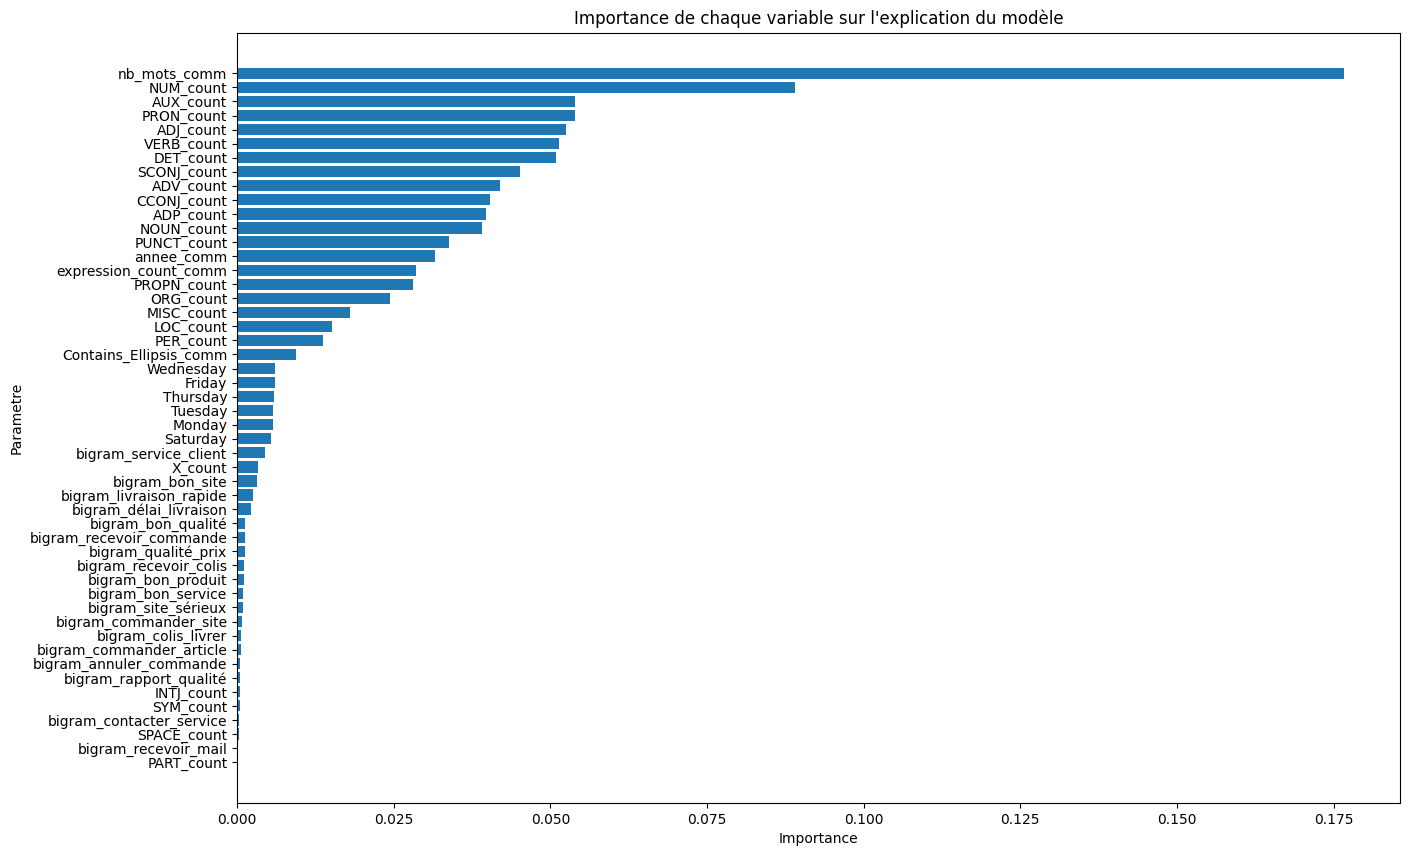

In [151]:
# Interprétabilité du modèle
fnames=[]
for i in X_train:
    fnames.append(i)
importa=rf.feature_importances_
indices=np.argsort(importa)
plt.figure(figsize=(15,10))
plt.barh(range(len(indices)),importa[indices])
plt.yticks(range(len(indices)),[fnames[i] for i in indices])
plt.title("Importance de chaque variable sur l'explication du modèle")
plt.xlabel("Importance")
plt.ylabel("Parametre");


### Deuxième approche : basée uniquement sur l'analyse des avis

#### Naive Bayesien
#### TFIDF  et Count Vectorizer

Les modèles naïfs bayésiens sont basés sur le théorème de Bayes. Pour appliquer ces algorithmes, il est nécessaire de supposer deux choses principales concernant les données : l'indépendance des variables et leur importance égale.

On recherche les différentes probabilités de y sachant X, avec y égal à "Satisfait" ou "Insatisfait", et X étant un vecteur X=(x1, x2, ..., xn) de différents paramètres. L'indépendance est nécessaire pour que la probabilité de x1 intersection x2 intersection ... soit égale à P(x1) * P(x2) ..., mais cette hypothèse d'indépendance n'est pas toujours vérifiée en pratique, et la corrélation entre deux variables peut affecter la précision de l'algorithme.

Nous ne pouvons pas garantir l'indépendance des variables en les vectorisant, mais en utilisant le principe du tf-idf, il y a plus de chances de l'obtenir.

Source: https://www.geeksforgeeks.org/naive-bayes-classifiers/

In [152]:
# Analyse de la corrélation des mots par TF-IDF
%%skip
tfidf=TfidfVectorizer(min_df=0.1, max_features=5000,strip_accents='unicode',ngram_range=(1, 3),stop_words = stop_words)#définition du vectoriser
tfidf_exemple = tfidf.fit_transform(df.commentaireAmeliore)#entraînement et transformation du vectoriser sur les commentaires
tfidf_df = pd.DataFrame(tfidf_exemple.toarray(), columns=tfidf.get_feature_names_out())# récupération des score tf-idf
# Etude de la corrélation des mots en tf-idf
corr_matrix = tfidf_df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strongest_corr = upper_triangle.stack().sort_values(ascending=False)[:10]
print(strongest_corr)

UsageError: Line magic function `%%skip` not found.


In [153]:
# Analyse de la corrélation des mots par Count Vectorizer
%%skip

tfidf=CountVectorizer(max_features=5000,min_df=0.1,strip_accents='unicode', stop_words=stop_words, ngram_range=(1,3))
tfidf_exemple = tfidf.fit_transform(df.commentaireAmeliore)
tfidf_df = pd.DataFrame(tfidf_exemple.toarray(), columns=tfidf.get_feature_names_out())
corr_matrix = tfidf_df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strongest_corr = upper_triangle.stack().sort_values(ascending=False)[:10]
print(strongest_corr)

# La corrélation est beaucoup plus importante avec la méthode de count vectorizer

UsageError: Line magic function `%%skip` not found.


##### Optimisation 

In [154]:
#Optimisation bayésienne pour tf-idf et modèle multinomialNB 
%%skip
# L'optimisation bayésienne est une méthode plus efficace que GridSearch qui utilise une approche probabiliste pour explorer l'espace des hyperparamètres. 
# L'optimisation bayésienne utilise une fonction d'acquisition pour choisir les valeurs les plus prometteuses à tester, plutôt que d'évaluer toutes les combinaisons 
# de paramètres possibles. La fonction d'acquisition estime la probabilité que chaque point dans l'espace des hyperparamètres améliore les performances du modèle,
# en utilisant les informations acquises lors de l'évaluation de points précédents. Cette approche permet de réduire considérablement le nombre d'entraînements nécessaires 
# pour trouver les meilleurs hyperparamètres.

#split
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    #sortie des paramètres
    min_df, max_features, alpha, n_max = params
    # Création d'une représentation vectorielle en utilisant la méthode TF-IDF.
    vectorisation = TfidfVectorizer(min_df=min_df, max_features=max_features,  ngram_range=(1, n_max))
    #"entrainement" de la fonction sur le jeu de données train
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    #définition du modèle Multinomial Naive Bayesien 
    MNB = MultinomialNB(alpha=alpha)
    # entrainement du modele
    MNB.fit(x_train_tfidf, y_train) 
    # vectorisation du jeu de test 
    x_test_tfidf = vectorisation.transform(X_test_text)  
    #evaluation de l'accuracy sur le jeu de test (score à optimiser)
    score = accuracy_score(y_test, MNB.predict(x_test_tfidf))  
    return -score # on retourne "moins le score" car minimiser un score negatif revient a maximiser un score positif, ici on cherche donc a maximiser l'accuracy

#définition de l'espace de recherche pour les différents paramètres
espace = [Real(1e-5, 1e-3, "log-uniform"),  # min_df log uniforme car on suppose que c'est important et un extrême
         Integer(100, 20000),             # max_features
         Real(1e-5, 1e-1, "log-uniform"),# alpha log uniforme car on suppose que c'est important et un extrême
         Integer(1,10)#max du ngram
         ] 
#définition de la fonction d'optimisation avec l'objectif, l'espace, le nombre d'itérations de la fonction et l'état
resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Meilleurs paramètres et performance correspondante
print("Best parameters: min_df={}, max_features={}, alpha={},n_gram={}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df=6.79346743593771e-05, max_features=4292, alpha=0.1,n_gram=1
# Best score: 0.907


UsageError: Line magic function `%%skip` not found.


In [155]:
#Optimisation bayésienne pour count vectorizer et modèle multinomialeNB 
%%skip
#split
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    #sortie des paramètres
    min_df, max_features, alpha, n_max = params
    vectorisation = CountVectorizer(min_df=min_df, max_features=max_features, strip_accents='unicode', ngram_range=(1, n_max))
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    MNB = MultinomialNB(alpha=alpha)
    MNB.fit(x_train_tfidf, y_train) 
    x_test_tfidf = vectorisation.transform(X_test_text)  
    score = accuracy_score(y_test, MNB.predict(x_test_tfidf))  
    return -score 
#définition de l'espace de recherche pour les différents parametres
espace = [Real(1e-5, 1e-3, "log-uniform"),  # min_df
         Integer(100, 20000),             # max_features
         Real(1e-5, 1e-1, "log-uniform"),# alpha
         Integer(1,10)#max du ngram
         ] 
#définition de la fonction d'optimisation avec l'objectif, l'espace, le nombre d'itérations de la fonction et l'état
resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Meilleurs paramètres et performance correspondante
print("Best parameters: min_df={}, max_features={}, alpha={},n_gram={}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df=0.00022030771644438818, max_features=5892, alpha=0.1,n_gram=1
# Best score: 0.903

UsageError: Line magic function `%%skip` not found.


#### Forêt aléatoire

##### Optimisation

In [156]:
#Optimisation bayésienne avec count vectorizer pour le modèle random forest
%%skip
#split
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    #sortie des paramètres
    min_df, max_features,  n_max ,n_estimator,max_depth= params
    vectorisation = CountVectorizer(min_df=min_df, max_features=max_features,  ngram_range=(1, n_max))
    x_train_count = vectorisation.fit_transform(X_train_text)
    rf = RandomForestClassifier(n_estimators=n_estimator,max_depth=max_depth,n_jobs=-1)
    rf.fit(x_train_count, y_train) 
    x_test_count = vectorisation.transform(X_test_text)
    score = accuracy_score(y_test, rf.predict(x_test_count))  
    return -score 

espace = [Real(1e-5, 1e-3, "log-uniform"),  # min_df
         Integer(100, 20000),             # max_features
         Integer(1,10),#max du ngram
         Integer(1,500,"log-uniform"), #n_estimator
         Integer(2,500,"log-uniform")#max_depth
         ] 

resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Meilleurs paramètres et performance correspondante
print("Best parameters: min_df {}, max_features {},  n_max {},n_estimator {},max_depth {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df 1e-05, max_features 20000,  n_max 1,n_estimator 500,max_depth 500
# Best score: 0.892

UsageError: Line magic function `%%skip` not found.


In [157]:
#Optimisation bayésienne avec TF-IDF pour le modèle random forest
%%skip
#split
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    min_df, max_features,  n_max ,n_estimator,max_depth= params
    vectorisation = TfidfVectorizer(min_df=min_df, max_features=max_features, ngram_range=(1, n_max))
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    rf = RandomForestClassifier(n_estimators=n_estimator,max_depth=max_depth,n_jobs=-1)
    rf.fit(x_train_tfidf, y_train)
    x_test_tfidf = vectorisation.transform(X_test_text)  
    score = accuracy_score(y_test, rf.predict(x_test_tfidf))  
    return -score 

espace = [Real(1e-8, 1e-3, "log-uniform"),  # min_df
         Integer(100, 50000),             # max_features
         Integer(1,10),#max du ngram
         Integer(1,800,"log-uniform"), #n_estimator
         Integer(2,800,"log-uniform")#max_depth
         ] 

resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Afficher les meilleurs paramètres et la performance correspondante
print("Best parameters: min_df {}, max_features {},  n_max {},n_estimator {},max_depth {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df 1.6470593629962165e-06, max_features 50000,  n_max 1,n_estimator 735,max_depth 534
# Best score: 0.889

UsageError: Line magic function `%%skip` not found.


#### K-Means

##### Optimisation

##### TF-IDF

In [158]:
#Optimisation bayésienne pour tfidf et kmeans
%%skip
#split
from sklearn.metrics import silhouette_score

X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    min_df, max_features,  n_max = params
    vectorisation = TfidfVectorizer(min_df=min_df, max_features=max_features,  ngram_range=(1, n_max))
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(x_train_tfidf)
    score = silhouette_score(x_train_tfidf, kmeans.labels_)
    return -abs(score) 

espace = [Real(1e-8, 1e-3, "log-uniform"),  # min_df
         Integer(100, 50000),             # max_features
         Integer(1,10)#max du ngram
         ] 

resultats = gp_minimize(objective, espace, n_calls=10, random_state=42)

# Afficher les meilleurs paramètres et la performance correspondante
print("Best parameters: min_df {}, max_features {},  n_max {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df 0.0004929053648241689, max_features 139,  n_max 10
# Best score: 0.031

UsageError: Line magic function `%%skip` not found.


In [159]:
# Analyse du meilleur modèle 
%%skip
#vectorisation avec les meilleurs paramètres pour le modèle Kmeans
vectorisation = TfidfVectorizer(min_df=0.0004929053648241689, max_features=139,  ngram_range=(1, 10))
#vectorisation
x_train_tfidf = vectorisation.fit_transform(X_train_text)
#définition du modèle
kmeans = KMeans(n_clusters=2, random_state=42)
#fit du kmeans
kmeans.fit(x_train_tfidf)
# Transformation du test
x_test_tfidf = vectorisation.transform(X_test_text)

# faire la prédiction
y_pred = kmeans.predict(x_test_tfidf)

# On regarde l'accuracy pour comparer avec les autres modèles
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

if acc<0.5:
    acc=1-acc

print("Accuracy: ", acc)
print("Confusion Matrix:\n", cm)
# Accuracy:  0.5534530553212005
# Confusion Matrix:
#  [[2995   97]
#  [4495  710]]
#On ne garde pas ce modele pour la suite

UsageError: Line magic function `%%skip` not found.


##### Count Vectorizer

In [160]:
#Optimisation bayésienne pour count et kmeans
%%skip
#split

X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    min_df, max_features,  n_max = params
    vectorisation = CountVectorizer(min_df=min_df, max_features=max_features,  ngram_range=(1, n_max))
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(x_train_tfidf)
    #score
    score = silhouette_score(x_train_tfidf, kmeans.labels_)
    return -abs(score) 

espace = [Real(1e-8, 1e-3, "log-uniform"),  # min_df
         Integer(100, 50000),             # max_features
         Integer(1,10)#max du ngram
         ] 

resultats = gp_minimize(objective, espace, n_calls=10, random_state=42)

# Afficher les meilleurs paramètres et la performance correspondante
print("Best parameters: min_df {}, max_features {},  n_max {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df 0.0004929053648241689, max_features 139,  n_max 10
# Best score: 0.455

UsageError: Line magic function `%%skip` not found.


In [161]:
# Analyse du meilleure modele trouvé count Kmeans
%%skip
vectorisation = CountVectorizer(min_df=0.0004929053648241689, max_features=139, ngram_range=(1, 10))
#vectorisation
x_train_tfidf = vectorisation.fit_transform(X_train_text)
#definition du modele
kmeans = KMeans(n_clusters=2, random_state=42)
#fit du kmeans
kmeans.fit(x_train_tfidf)
# Transformation du test
x_test_tfidf = vectorisation.transform(X_test_text)
# faire la prediction
y_pred = kmeans.predict(x_test_tfidf)
# On regarde l'accuracy pour comparer avec les autres modeles
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
if acc<0.5:
    acc=1-acc
# affichage des resultats
print("Accuracy: ", acc)
print("Confusion Matrix:\n", cm)
# Accuracy:  0.7027841388453658
# Confusion Matrix:
#  [[ 728 2364]
#  [ 102 5103]]
#On ne garde pas ce modele pour la suite

UsageError: Line magic function `%%skip` not found.


#### Régression Logistique

##### Optimisation

In [162]:
#Optimisation bayésienne pour count et régression logistique
%%skip
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    min_df, max_features,  n_max ,C= params
    vectorisation = CountVectorizer(min_df=min_df, max_features=max_features, ngram_range=(1, n_max))
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    clf = LogisticRegression(C=C,max_iter=2000)
    clf.fit(x_train_tfidf, y_train)
    x_train_tfidf = vectorisation.transform(X_test_text)
    accuracy = accuracy_score(y_test, clf.predict(x_train_tfidf))
    return -accuracy

espace = [Real(1e-8, 1e-3, "log-uniform"),  # min_df
         Integer(100, 50000),             # max_features
         Integer(1,20),#max du ngram
         Real(1e-6, 100, "log-uniform")  #C
         ] 

resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Afficher les meilleurs paramètres et la performance correspondante
print("Best parameters: min_df {}, max_features {},  n_max {},C {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))

# Best parameters: min_df 4.726680048680589e-06, max_features 44298,  n_max 20,C 0.31257986536244253
# Best score: 0.909

UsageError: Line magic function `%%skip` not found.


In [163]:
#Optimisation bayésienne pour tfidf et régression logistique
%%skip
#split
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)
# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    min_df, max_features,  n_max ,C= params
    vectorisation = TfidfVectorizer(min_df=min_df, max_features=max_features, ngram_range=(1, n_max))
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    clf = LogisticRegression(C=C,max_iter=2000)
    clf.fit(x_train_tfidf, y_train)
    x_train_tfidf = vectorisation.transform(X_test_text)
    accuracy = accuracy_score(y_test, clf.predict(x_train_tfidf))
    return -accuracy

espace = [Real(1e-8, 1e-3, "log-uniform"),  # min_df
         Integer(100, 50000),             # max_features
         Integer(1,20),#max du ngram
         Real(1e-6, 100, "log-uniform")  #C
         ] 

resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Afficher les meilleurs paramètres et la performance correspondante
print("Best parameters: min_df {}, max_features {},  n_max {},C {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df 1e-08, max_features 50000,  n_max 20,C 5.014115691202001
# Best score: 0.914

UsageError: Line magic function `%%skip` not found.


#### XGBOOST

##### Optimisation

In [164]:
#Optimisation bayésienne pour tfidf et XGB
%%skip
# split
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)


# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    min_df, max_features,  n_max ,lr, max_depth, subsample, colsample_bytree = params
    vectorisation = TfidfVectorizer(min_df=min_df, max_features=max_features,ngram_range=(1, n_max))
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    clf = xgb.XGBClassifier(learning_rate=lr, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree, n_jobs=-1)
    clf.fit(x_train_tfidf, y_train)
    x_test_tfidf = vectorisation.transform(X_test_text)
    accuracy = accuracy_score(y_test, clf.predict(x_test_tfidf))
    return -accuracy

espace = [Real(1e-8, 1e-3, "log-uniform"),  # min_df
         Integer(100, 50000),             # max_features
         Integer(1,20),                  # max du ngram
         Real(1e-6, 1, "log-uniform"),   # learning rate
         Integer(1, 500),                 # max depth
         Real(0.1, 1, "uniform"),        # subsample
         Real(0.1, 1, "uniform")         # colsample_bytree
         ] 

resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Afficher les meilleurs paramètres et la performance correspondante
print("Best parameters: min_df {}, max_features {}, n_max {}, learning_rate {}, max_depth {}, subsample {}, colsample_bytree {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df 3.038644183958469e-08, max_features 19504, n_max 20, learning_rate 0.36613892483306554, max_depth 500, subsample 1.0, colsample_bytree 0.1
# Best score: 0.899


UsageError: Line magic function `%%skip` not found.


In [165]:
#Optimisation bayésienne pour count et XGB
%%skip
# split
X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)


# Fonction objectif pour l'optimisation bayésienne
def objective(params):
    min_df, max_features,  n_max ,lr, max_depth, subsample, colsample_bytree = params
    vectorisation = CountVectorizer(min_df=min_df, max_features=max_features, ngram_range=(1, n_max))
    
    x_train_tfidf = vectorisation.fit_transform(X_train_text)
    clf = xgb.XGBClassifier(learning_rate=lr, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree, n_jobs=-1)
    clf.fit(x_train_tfidf, y_train)
    x_test_tfidf = vectorisation.transform(X_test_text)
    accuracy = accuracy_score(y_test, clf.predict(x_test_tfidf))
    return -accuracy

espace = [Real(1e-8, 1e-3, "log-uniform"),  # min_df
         Integer(100, 50000),             # max_features
         Integer(1,20),                  # max du ngram
         Real(1e-6, 1, "log-uniform"),   # learning rate
         Integer(1, 500),                 # max depth
         Real(0.1, 1, "uniform"),        # subsample
         Real(0.1, 1, "uniform")         # colsample_bytree
         ] 

resultats = gp_minimize(objective, espace, n_calls=50, random_state=42)

# Afficher les meilleurs paramètres et la performance correspondante
print("Best parameters: min_df {}, max_features {}, n_max {}, learning_rate {}, max_depth {}, subsample {}, colsample_bytree {}".format(*resultats.x))
print("Best score: {:.3f}".format(-resultats.fun))
# Best parameters: min_df 0.0001409460584674273, max_features 28808, n_max 4, learning_rate 0.3129785646564469, max_depth 500, subsample 0.7307761038433694, colsample_bytree 0.1
# Best score: 0.906

UsageError: Line magic function `%%skip` not found.


#### Comparaison des modeles

In [166]:
# Comparaisons des différents modèles

X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaireAmeliore, df.type, test_size=0.2, random_state=42)

liste_models=[]
#On fait une pipeline avec la vectorisation et le modèle pour chaque modèle selectionné 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~MNB

MNB_pipeline = make_pipeline(
    TfidfVectorizer(min_df=6.8e-5, max_features=4292,  ngram_range=(1, 1)),
    MultinomialNB(alpha=0.1)
    )
liste_models.append(("MNB",MNB_pipeline))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~RF

RF_pipeline = make_pipeline(
    CountVectorizer(min_df=1e-5, max_features=20000, ngram_range=(1,1)),
    RandomForestClassifier(n_estimators=500,max_depth=500,n_jobs=-1)
    )
liste_models.append(("RF",RF_pipeline))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~RL

RL_pipeline = make_pipeline(
    TfidfVectorizer(min_df=1e-08, max_features=50000,  ngram_range=(1, 20)),
    LogisticRegression(C=5,max_iter=2000)
    )

liste_models.append(("RL",RL_pipeline))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XGBOOST

XGB_pipeline = make_pipeline(
    CountVectorizer(min_df=0.00014, max_features=28808,  ngram_range=(1, 4)),
    xgb.XGBClassifier(learning_rate=0.31, max_depth=500, subsample=0.7, colsample_bytree=0.1, n_jobs=-1)
    )

liste_models.append(("XGB",XGB_pipeline))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~RL

KM_pipeline = make_pipeline(
    CountVectorizer(min_df=0.0004929053648241689, max_features=139, ngram_range=(1, 10)),
    KMeans(n_clusters=2, random_state=42)
    )

liste_models.append(("KM",KM_pipeline))



resultats=[]
names=[]
for noms, model in liste_models:
    #cross validation
    cv_scores = cross_val_score(model, X_train_text, y_train, cv=5,scoring="accuracy")
    print(cv_scores)
    print(noms,"cross-validation precision: %.4f variance: %.4f" % (np.mean(cv_scores), np.std(cv_scores)))

    names.append(noms)
    resultats.append(cv_scores)
    #entrainement du modele
    model.fit(X_train_text, y_train)
    #application du modele au jeu test
    y_pred = model.predict(X_test_text)
    #calcul d'accuracy sur le jeu test
    test_accuracy = accuracy_score(y_test, y_pred)
    print(noms,"precision de test: %.4f" % test_accuracy)
    #calcul d'accuracy sur tous les données
    y_pred_all = model.predict(df.commentaireAmeliore)
    all_accuracy = accuracy_score(df.type, y_pred_all)
    print(noms,"precision globale: %.4f" % all_accuracy)
    
# [0.89679072 0.90191352 0.89528401 0.90387223 0.90206419]
# MNB cross-validation precision: 0.9000 variance: 0.0033
# MNB precision de test: 0.9033
# MNB precision globale: 0.9113
# [0.8882025  0.89422932 0.89046256 0.88940786 0.89528401]
# RF cross-validation precision: 0.8915 variance: 0.0028
# RF precision de test: 0.8955
# RF precision globale: 0.9775
# [0.90598162 0.91230978 0.90959771 0.91246045 0.9117071 ]
# RL cross-validation precision: 0.9104 variance: 0.0024
# RL precision de test: 0.9141
# RL precision globale: 0.9602
# [0.9014615  0.90628296 0.90221486 0.90311888 0.90537894]
# XGB cross-validation precision: 0.9037 variance: 0.0018
# XGB precision de test: 0.9114
# XGB precision globale: 0.9531
# [0.2986289  0.29983426 0.2960675  0.69865903 0.2919994 ]
# KM cross-validation precision: 0.3770 variance: 0.1608
# KM precision de test: 0.7028
# KM precision globale: 0.7025

[0.89633871 0.90176284 0.894832   0.90236553 0.90191352]
MNB cross-validation precision: 0.8994 variance: 0.0032
MNB precision de test: 0.9029
MNB precision globale: 0.9109
[0.88594244 0.89513334 0.89091457 0.88955854 0.89377731]
RF cross-validation precision: 0.8911 variance: 0.0032
RF precision de test: 0.8929
RF precision globale: 0.9769
[0.90583095 0.91020039 0.90854302 0.91125509 0.90959771]
RL cross-validation precision: 0.9091 variance: 0.0018
RL precision de test: 0.9133
RL precision globale: 0.9602
[0.90025614 0.90673497 0.90281754 0.90462558 0.90522827]
XGB cross-validation precision: 0.9039 variance: 0.0022
XGB precision de test: 0.9088
XGB precision globale: 0.9509


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


[0.2986289  0.30043694 0.2960675  0.30134097 0.2919994 ]
KM cross-validation precision: 0.2977 variance: 0.0034


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KM precision de test: 0.7028
KM precision globale: 0.7025


In [167]:
resultats[0:4]

[array([0.89633871, 0.90176284, 0.894832  , 0.90236553, 0.90191352]),
 array([0.88594244, 0.89513334, 0.89091457, 0.88955854, 0.89377731]),
 array([0.90583095, 0.91020039, 0.90854302, 0.91125509, 0.90959771]),
 array([0.90025614, 0.90673497, 0.90281754, 0.90462558, 0.90522827])]

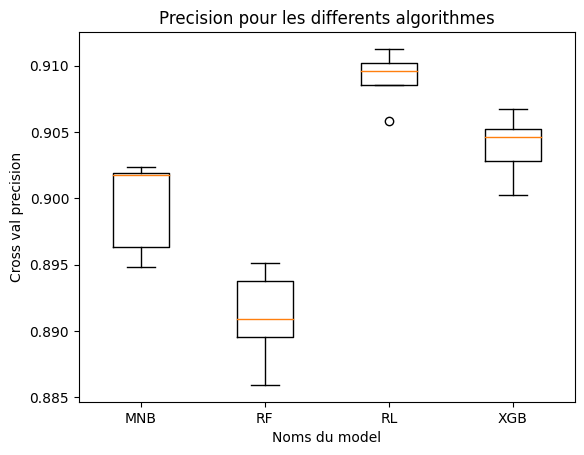

In [168]:
# Boxplot des modèles 
#source https://www.kaggle.com/code/jinxzed/interpreting-logistic-regression-using-shap
plt.boxplot(resultats[0:4])
plt.xticks(np.arange(1,len(names[0:4])+1),names[0:4])
plt.title("Precision pour les differents algorithmes")
plt.xlabel("Noms du model")
plt.ylabel("Cross val precision")
plt.show()

#### Régression logistique: Analyse du modèle

In [169]:
# Accuracy régression logistique
cv_scores = cross_val_score(RL_pipeline, X_train_text, y_train, cv=5)
print("RL cross-validation precision: %.4f variance: %.4f" % (np.mean(cv_scores), np.std(cv_scores)))
RL_pipeline.fit(X_train_text, y_train)

y_pred = RL_pipeline.predict(X_test_text)
test_accuracy = accuracy_score(y_test, y_pred)
print("RL precision de test: %.4f" % test_accuracy)

y_pred_all = RL_pipeline.predict(df.commentaireAmeliore)
all_accuracy = accuracy_score(df.type, y_pred_all)
print("RL precision globale: %.4f" % all_accuracy)

RL cross-validation precision: 0.9091 variance: 0.0018
RL precision de test: 0.9133
RL precision globale: 0.9602


In [170]:
# Créer un dictionnaire de mots et de leurs coefficients associés pour la régression logistique
word_dict = dict(zip(RL_pipeline.named_steps['tfidfvectorizer'].get_feature_names_out(), abs(RL_pipeline.named_steps['logisticregression'].coef_[0])))

Text(0.5, 1.0, 'Nuage de mots des caractéristiques les plus importantes')

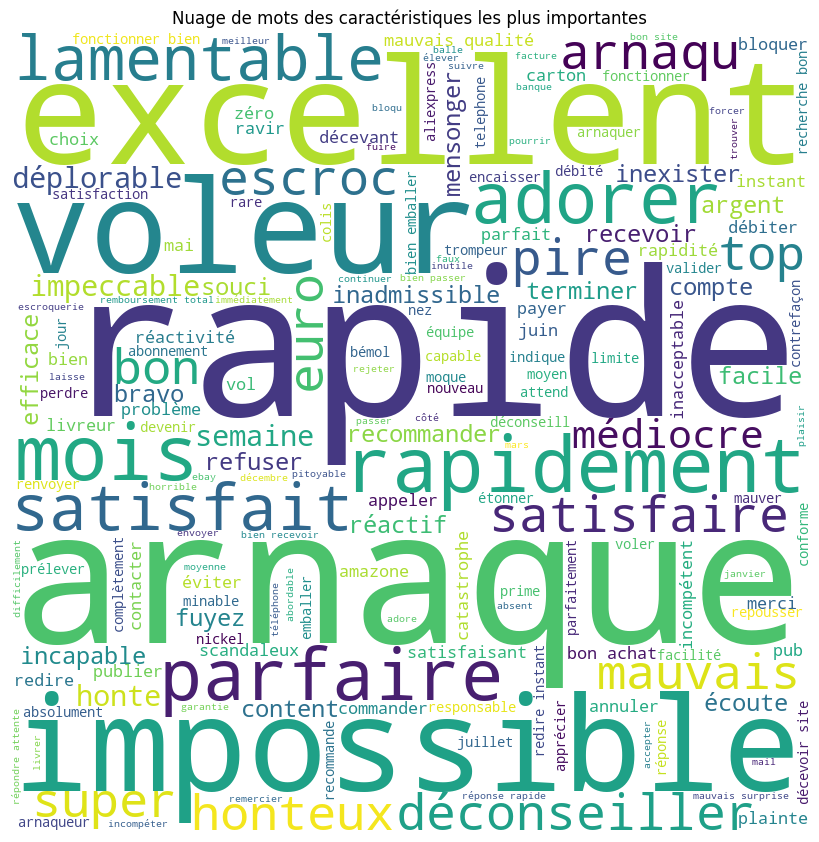

In [171]:
# Créer un nuage de mots avec les 50 mots les plus importants
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_frequencies(word_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Nuage de mots des caractéristiques les plus importantes')

<Axes: >

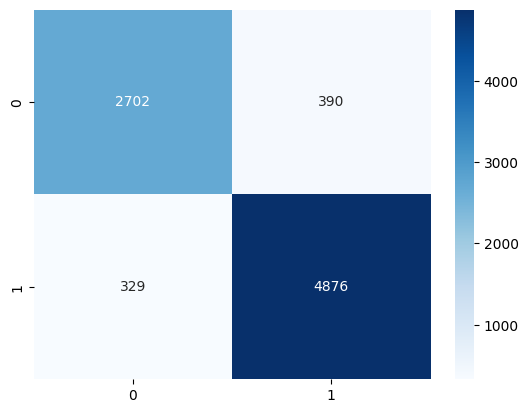

In [172]:
# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

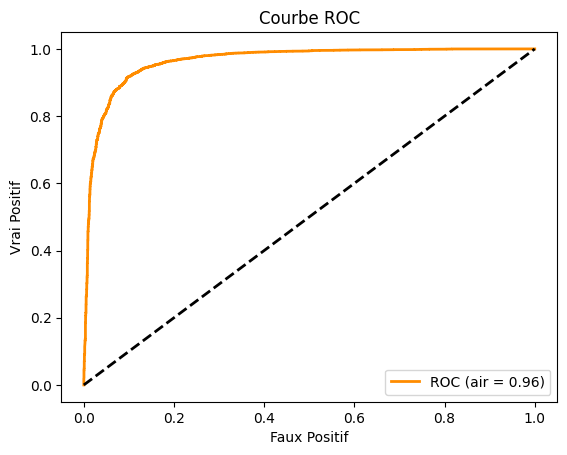

In [173]:
# Courbe ROC
y_pred_proba = RL_pipeline.predict_proba(X_test_text)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (air = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('Faux Positif')
plt.ylabel('Vrai Positif')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [174]:
# courbe Recall
#Recall = TP/(TP+FN)
# disp = plot_precision_recall_curve(RL_pipeline, X_test_text, y_test)
# disp.ax_.set_title('Courbe de précision-rappel')

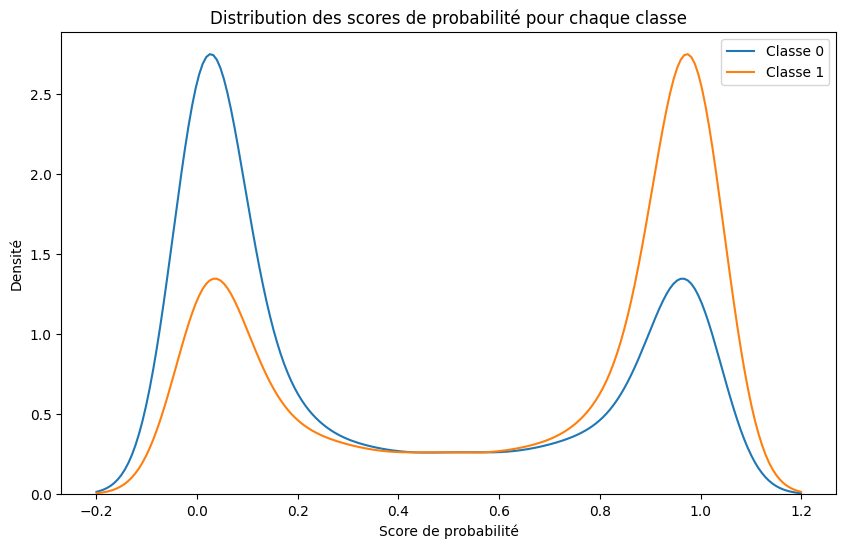

In [175]:
# Courbe de distribution des prédiction
y_prob = RL_pipeline.predict_proba(X_test_text)

# Tracer une distribution des scores de probabilité pour chaque classe
plt.figure(figsize=(10, 6))
sns.kdeplot(y_prob[:, 0], label='Classe 0')
sns.kdeplot(y_prob[:, 1], label='Classe 1')
plt.xlabel('Score de probabilité')
plt.ylabel('Densité')
plt.title('Distribution des scores de probabilité pour chaque classe')
plt.legend()

In [176]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3092
           1       0.93      0.94      0.93      5205

    accuracy                           0.91      8297
   macro avg       0.91      0.91      0.91      8297
weighted avg       0.91      0.91      0.91      8297



In [177]:
# Créer un dictionnaire de mots et de leurs coefficients associés

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(204, 0, 0)"
word_dict = dict(zip(RL_pipeline.named_steps['tfidfvectorizer'].get_feature_names_out(), -1*(RL_pipeline.named_steps['logisticregression'].coef_[0])))

Text(0.5, 1.0, 'Nuage de mots des caractéristiques les plus importantes coté négatif')

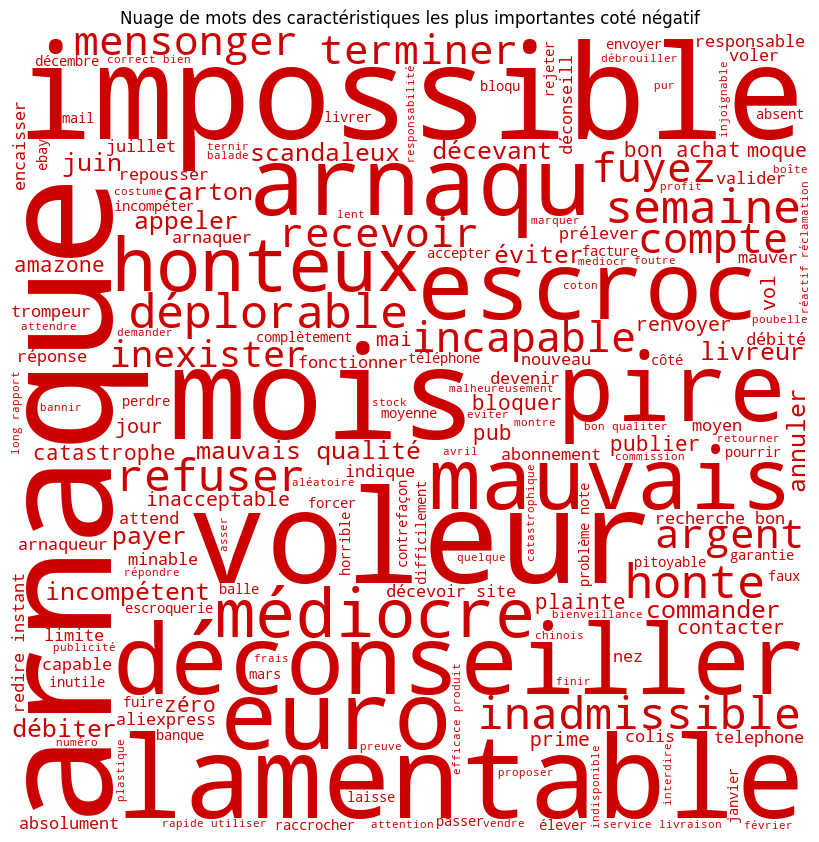

In [178]:
# Créer un nuage de mots avec les 50 mots négatifs les plus importants
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10,color_func=red_color_func).generate_from_frequencies(word_dict)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Nuage de mots des caractéristiques les plus importantes coté négatif')

In [179]:
# Créer un dictionnaire de mots et de leurs coefficients associés
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(0, 204, 0)"

word_dict = dict(zip(RL_pipeline.named_steps['tfidfvectorizer'].get_feature_names_out(), RL_pipeline.named_steps['logisticregression'].coef_[0]))

Text(0.5, 1.0, 'Nuage de mots des caractéristiques les plus importantes coté positif')

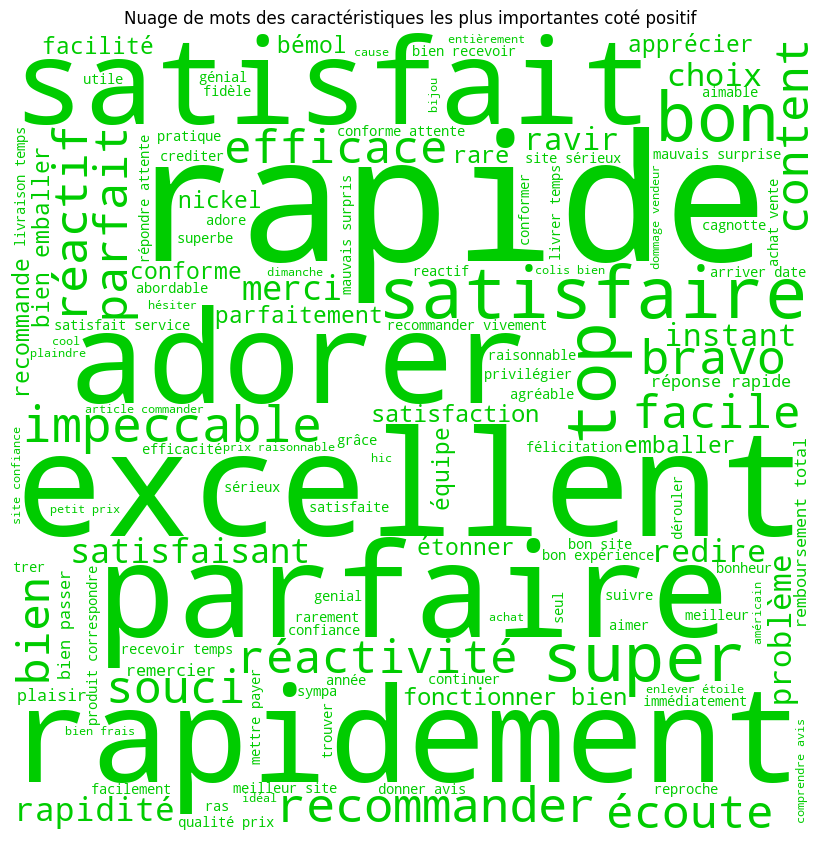

In [180]:
# Créer un nuage de mots avec les 50 mots positifs les plus importants
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10,color_func=red_color_func).generate_from_frequencies(word_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Nuage de mots des caractéristiques les plus importantes coté positif')

In [181]:
# ELI5 poids des mots
eli5.show_weights(RL_pipeline.named_steps['logisticregression'], vec=RL_pipeline.named_steps['tfidfvectorizer'], feature_names=RL_pipeline.named_steps['tfidfvectorizer'].get_feature_names_out())

In [182]:
# ELI5 exemple prédiction
eli5.show_prediction(RL_pipeline.named_steps['logisticregression'], doc=X_test_text[1], vec=RL_pipeline.named_steps['tfidfvectorizer'], feature_names=RL_pipeline.named_steps['tfidfvectorizer'].get_feature_names_out(),force_weights=True)
#Plus c'est vert foncé plus ca va dans le sens de la prediction et plus c'est rouge plus ca va dans le sens contraire de la prédiction

In [183]:
# Shap initialisation
shap.initjs()
explainer = shap.LinearExplainer(RL_pipeline.named_steps['logisticregression'],RL_pipeline.named_steps['tfidfvectorizer'].transform(X_train_text))

shap_values = explainer.shap_values(RL_pipeline.named_steps['tfidfvectorizer'].transform(X_test_text))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


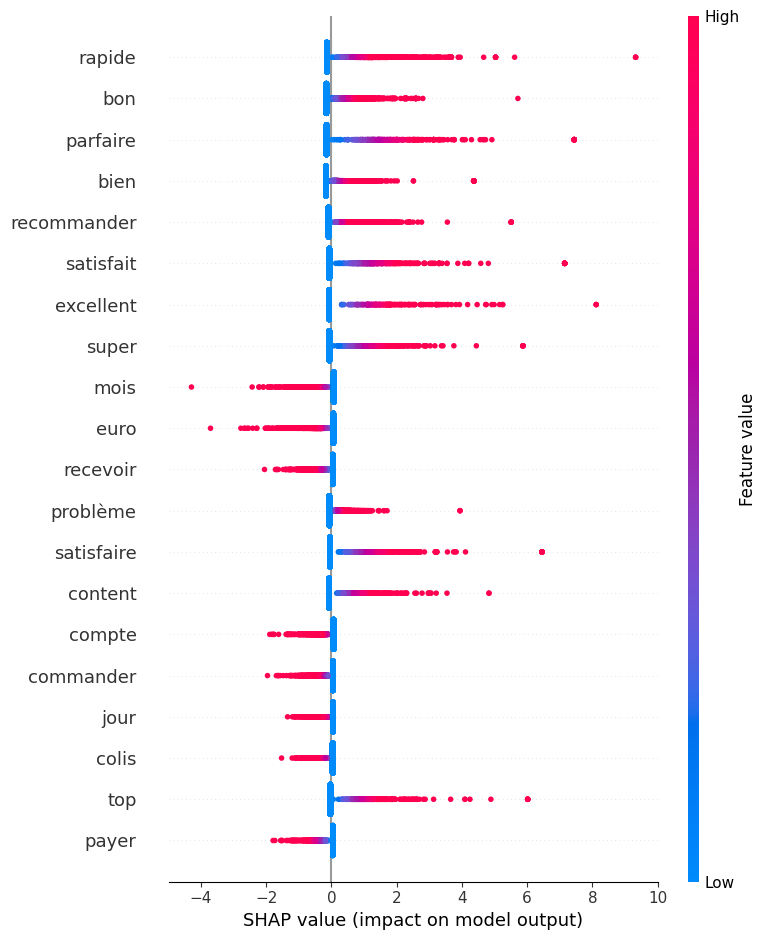

In [184]:
# SHAP Graphique summary
X_test_array = RL_pipeline.named_steps['tfidfvectorizer'].transform(X_test_text).toarray()
shap.summary_plot(shap_values,
                  X_test_array,
                  feature_names=RL_pipeline.named_steps['tfidfvectorizer'].get_feature_names_out())

Sur le graphique ci-dessus, les valeurs de SHAP sont représentées par des points. Les valeurs faibles sont marquées en bleu et les valeurs fortes en rouge. En analysant leur position, nous pouvons déterminer si elles ont un impact positif ou négatif sur le modèle. Par exemple, le terme "euro" a un impact faible sur les valeurs positives, mais un fort impact sur les valeurs négatives, contrairement à "top" ou "satisfaire". Nous pouvons constater que la plupart des mots présents dans cette représentation ont une orientation très marquée, sans présence de valeurs faibles ayant un fort impact.

In [185]:
# Exemple prédiction
ind=1
force_plot = shap.force_plot(
    explainer.expected_value, shap_values[ind], X_test_array[ind,:],
    feature_names=RL_pipeline.named_steps['tfidfvectorizer'].get_feature_names_out()
)
display.display(display.Markdown(f"**Text:** {X_test_text[ind]}"))
display.display(force_plot)

**Text:** site agréable visiter facile utiliser génial pouvoir trouver produit occasion point top pouvoir cumuler programme fidélité recommande essayer bémol

Voici une représentation visuelle de l'impact des valeurs. Les valeurs en rouge indiquent un impact positif sur notre prédiction par rapport à la valeur de base, tandis que les valeurs en bleu indiquent un impact différent. Chaque valeur est accompagnée de son impact et de sa propre valeur.

#### Réseau de neuronnes

##### Modèle pré-entraîné

In [186]:
# Model Préentrainé
# %%skip
#https://huggingface.co/cmarkea/distilcamembert-base-sentiment/tree/main
#L'objectif ici est d'évaluer si un modèle pré-entraîné sur un ensemble de données plus vaste, en utilisant des algorithmes à la pointe optimisés 
#pour la même tâche, est aussi efficace que nos propres modèles.

X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaire, df.type, test_size=0.2, random_state=42)

# Le modèle est importé en spécifiant une troncature fixe lorsque la longueur dépasse 512.
analyzer = pipeline(
    task='text-classification',
    model="distilcamembert-base-sentiment",
    tokenizer="distilcamembert-base-sentiment",
    max_length=512,
    truncation=True
)

resultats = []
probas = []
for commentaire in tqdm(X_test_text):
    #calcul des scores pour chaque note
    scores = analyzer(commentaire, top_k=None)
    #Le premier label extrait est celui ayant le score le plus élevé.
    res=int(re.search(r"\d+",scores[0]["label"]).group())
    proba = scores[0]['score']
    #stockage des probabilités
    probas.append(proba)
    #transformation de la note en catégorie
    if res<=3:
        resultats.append(0)
    elif res >=4:
        resultats.append(1)
#matrice de confusion
matrice_confusion = confusion_matrix(y_test, resultats)
#calcul de l'accuracy
accuracy = (matrice_confusion[0][0] + matrice_confusion[1][1]) / sum(sum(matrice_confusion))


print("Matrice de confusion :")
print(matrice_confusion)
print("Accuracy : {:.2f}".format(accuracy))
# 100%|██████████| 8297/8297 [20:43<00:00,  6.67it/s]  
# Matrice de confusion :
# [[2976  116]
#  [ 647 4558]]
# Accuracy : 0.91
print("Classification Report:")
print(classification_report(y_test, resultats))

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
100%|██████████| 8297/8297 [07:35<00:00, 18.20it/s]

Matrice de confusion :
[[2976  116]
 [ 650 4555]]
Accuracy : 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3092
           1       0.98      0.88      0.92      5205

    accuracy                           0.91      8297
   macro avg       0.90      0.92      0.90      8297
weighted avg       0.92      0.91      0.91      8297



##### Modèle MLP

In [187]:
#Préparation des données pour le MLP
sentences = df['commentaireAmeliore']
labels = df['type']
train_sentences, val_sentences, train_labels,val_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [188]:
# Tokenization et rembourrage (padding) des données textuelles pour les préparer à l'entraînement d'un modèle de traitement du langage naturel

#Le rembourrage est une technique utilisée en traitement du langage naturel pour rendre toutes les séquences de texte d'une taille uniforme. 
#Le rembourrage consiste à ajouter des éléments spéciaux à la fin d'une séquence pour la faire correspondre à une longueur prédéfinie. 
# Par exemple, si la longueur maximale des séquences est définie à 100, et que la séquence d'origine ne contient que 50 éléments, alors 50 éléments spéciaux 
# ("jetons de remplissage" ou "<PAD>") seront ajoutés à la fin de la séquence pour la faire correspondre à une longueur de 100.

# Un vocabulaire de 8000 mots est utilisé, et si un mot n'est pas trouvé dans le vocabulaire, il sera remplacé par le jeton spécial "<00V>"

# Rembourrage
vocab_size = 8000
oov_token = '<00V>'
#taille max et min apres rembourage
max_length = 200
padding_type = 'post'
trunc_type = 'post'

# Tokenization:  la classe Tokenizer de Keras est utilisée pour tokeniser les phrases d'entraînement à l'aide de la méthode texts_to_sequences. 
# Cette méthode transforme chaque phrase en une séquence d'entiers, où chaque entier représente l'index du mot dans le vocabulaire.

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
# Adaptation du tokenizer aux phrases d'entraînement en utilisant la méthode fit_on_texts 
# Cela permet au tokenizer de créer un vocabulaire des mots présents dans les phrases d'entraînement, et d'assigner un index unique à chaque mot.
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Utilisation de la méthode texts_to_sequences pour transformer chaque phrase en une séquence d'entiers
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [189]:
# Construction et entrainement du reseau de neuronnes 
embedding_dim = 16 # Chaque mot sera représenté par un vecteur de 16 dimensions

# Une epoch correspond à une itération complète de l'algorithme d'apprentissage du réseau de neurones sur l'ensemble des données d'entraînement. Pendant chaque epoch, 
# le réseau calcule les prédictions pour chaque exemple d'entraînement, calcule l'erreur entre les prédictions et les valeurs cibles, et met à jour les poids des neurones pour minimiser 
# l'erreur.
num_epochs = 50 # Le modèle sera entraîné sur les données d'entraînement pendant 50 itérations
batch_size = 30# Les données d'entraînement seront divisées en lots de 30 exemples

# Le modèle est défini à l'aide de la classe Sequential de Keras, qui permet de créer des modèles séquentiels de couches.
model = tf.keras.Sequential([
#La première couche du modèle est une couche d'embedding, qui prend en entrée des séquences d'entiers et transforme chaque entier en un vecteur dense de dimension embedding_dim. 
#Ici, l'entrée est une séquence de taille maximale max_length, et le nombre de mots dans le vocabulaire est vocab_size.
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
# La deuxième couche est une couche de pooling globale en moyenne (GlobalAveragePooling1D) qui prend en entrée la sortie de la couche d'embedding et calcule la moyenne de chaque 
# dimension du vecteur sur l'ensemble de la séquence.
# Cette couche est utile pour les tâches de classification de séquences, où l'objectif est de prédire une étiquette pour une séquence d'entrée. Elle permet de réduire la dimensionnalité de la sortie du CNN, 
# tout en conservant les informations importantes de la séquence, ce qui permet d'éviter le surapprentissage et d'améliorer la généralisation du modèle.
    tf.keras.layers.GlobalAveragePooling1D(),
# La troisième couche est une couche dense (Dense) de 24 neurones avec une fonction d'activation ReLU.
    tf.keras.layers.Dense(24, activation='relu'),
# La dernière couche est une couche dense (Dense) de 1 neurone avec une fonction d'activation sigmoïde, qui est utilisée pour la classification binaire.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Le modèle est compilé en utilisant la méthode compile, qui prend en entrée l'optimiseur Adam, la fonction de perte binaire_crossentropy et la métrique d'évaluation de la précision.
model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy']
             )

# Le modèle est entraîné sur les données d'entraînement en utilisant la méthode fit, qui prend en entrée les données d'entraînement et d'évaluation, ainsi que la taille de lot, 
# le nombre d'époques et le mode verbose. Le résultat de l'entraînement est stocké dans l'objet history, qui contient les mesures de performance du modèle à chaque itération d'entraînement.
history = model.fit(train_padded, train_labels, batch_size=batch_size, epochs=num_epochs, verbose=0,validation_data=(val_padded,val_labels))

#Dans un modèle de réseau de neurones, les couches sont des blocs de traitement qui prennent des entrées et effectuent des transformations mathématiques pour produire des sorties.
#Les couches peuvent être vues comme des "filtres" qui extraient des caractéristiques spécifiques des données en entrée. Les données d'entrée passent à travers chaque couche du réseau, subissant 
#des transformations à chaque étape. La sortie de chaque couche devient l'entrée de la couche suivante jusqu'à ce que les sorties finales soient produites.

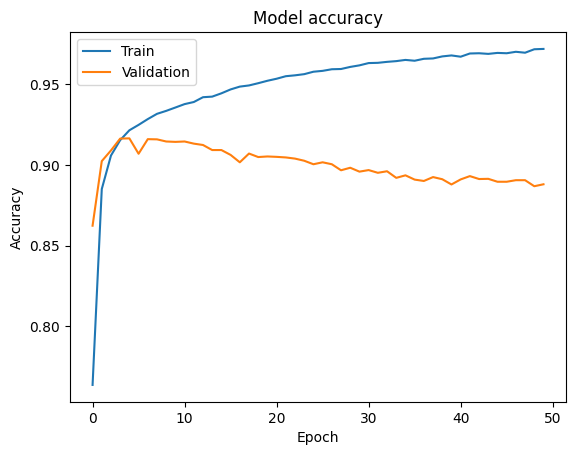

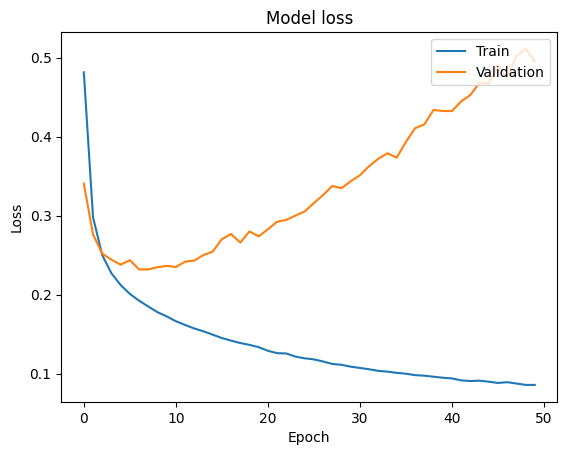

In [190]:
# Choix de l'epoch optimale

# Le nombre d'epochs est un hyperparamètre important qui doit être choisi avec soin. Si le nombre d'epochs est trop faible, le réseau n'aura pas suffisamment de 
# temps pour apprendre les caractéristiques importantes des données d'entraînement. En revanche, si le nombre d'epochs est trop élevé, le réseau risque de sur-apprendre 
# les données d'entraînement, c'est-à-dire qu'il peut apprendre à mémoriser les données d'entraînement plutôt que de généraliser pour les nouvelles données.

# Plot training and validation accuracy and loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/4
1107/1107 - 3s - loss: 0.4835 - accuracy: 0.7597 - val_loss: 0.3408 - val_accuracy: 0.8749 - 3s/epoch - 3ms/step
Epoch 2/4
1107/1107 - 2s - loss: 0.2904 - accuracy: 0.8861 - val_loss: 0.2651 - val_accuracy: 0.8996 - 2s/epoch - 2ms/step
Epoch 3/4
1107/1107 - 2s - loss: 0.2438 - accuracy: 0.9060 - val_loss: 0.2469 - val_accuracy: 0.9125 - 2s/epoch - 2ms/step
Epoch 4/4
1107/1107 - 3s - loss: 0.2221 - accuracy: 0.9169 - val_loss: 0.2383 - val_accuracy: 0.9114 - 3s/epoch - 2ms/step
260/260 [==============================] - 0s 967us/step
Confusion Matrix:
[[2585  507]
 [ 228 4977]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           128000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                             

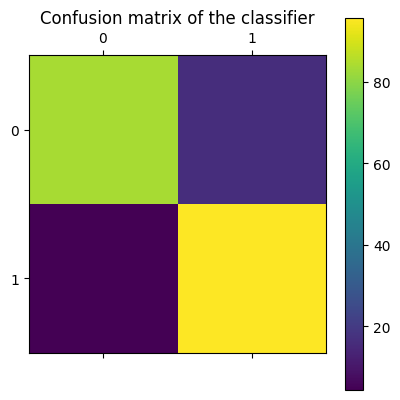

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3092
           1       0.91      0.96      0.93      5205

    accuracy                           0.91      8297
   macro avg       0.91      0.90      0.90      8297
weighted avg       0.91      0.91      0.91      8297



In [191]:
# Construction et entrainement du réseau de neuronnes avec le nombre d'epochs qui minimise le surapprentissage
embedding_dim = 16
num_epochs = 4
batch_size = 30
# 240 / 23 -> elephant dragon 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy']
             )

history = model.fit(train_padded, train_labels, batch_size=batch_size, epochs=num_epochs, verbose=2, validation_data=(val_padded,val_labels))
val_pred = model.predict(val_padded)
val_pred = np.round(val_pred).astype(int)
cm = confusion_matrix(val_labels, val_pred)

print("Confusion Matrix:")
print(cm)
s=[0,0]
for i,index in enumerate(cm):
    for j in index:
        s[i]+=j
cmtab=[]
for i,index in enumerate(cm):
    tmptab=[]
    for j in index:
        tmptab.append(100*(j/s[i]))
    cmtab.append(tmptab)   
    
print(model.summary())
pl.matshow(cmtab)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

print("Classification Report:")
print(classification_report(val_labels, val_pred))

### Troisième approche : intégrant à la fois l'analyse des commentaires et les variables collectées et créées (Bagging)

Nous allons maintenant étudier l'agglomération des trois modèles précédemment sélectionnés (MLP, RF, RL) en les combinant en un seul modèle. L'objectif est d'utiliser cet ensemble pour réduire l'erreur de rappel (recall) et ainsi obtenir un meilleur rapport de classification (Classification Report). Pour combiner ces trois modèles, nous utiliserons des classes spécialement conçues à cet effet, ainsi que la méthode des pipelines.

In [192]:
#Préparation des données pour le bagging
value=df.drop(columns=["note","type"])
labels=df["type"]
train, val, train_labels,val_labels = train_test_split(value, labels, test_size=0.2, random_state=42)

In [193]:
# Pipeline forêt aléatoire
pipeline_RF = make_pipeline( PretraitementRF(),preprocessing.StandardScaler(), RandomForestClassifier(criterion='gini', n_estimators=100))

In [194]:
# Pipeline régression linéaire
pipeline_RL = make_pipeline( PretraitementRL(),TfidfVectorizer(min_df=1e-08, max_features=50000,  ngram_range=(1, 20)), LogisticRegression(C=5,max_iter=2000))

In [195]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(8000, 16, input_length=200),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
MLP_model_Keras=KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
pipeline_MLP = make_pipeline(PretraitementMLP(),PretraitementMLPsuite(),MLP_model_Keras)

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [196]:
# Bagging 
bagmodel=Bagging([pipeline_MLP,pipeline_RL,pipeline_RF])
bagmodel.fit(train,train_labels)

In [197]:
# Prédiction bagging
prediction=bagmodel.predict(val)

260/260 [==============================] - 0s 1ms/step


In [198]:
# Classification report bagging
print(classification_report(prediction,val_labels))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2847
           1       0.96      0.91      0.93      5450

    accuracy                           0.91      8297
   macro avg       0.90      0.92      0.91      8297
weighted avg       0.92      0.91      0.92      8297



In [199]:
# Accuracy bagging
accuracy_score(prediction,val_labels) 

0.9145474267807642

### Quatrième approche : basée sur la prédiction des notes attribuées

#### MLP sur les notes

In [200]:
# Définition du modele MLP sur les notes
# Charger les données des commentaires et des notes
comments = df['commentaireAmeliore'].values
labels = df['note'].values

# Effectuer un sous-échantillonnage pour équilibrer les classes
sampler = RandomOverSampler(random_state=42)
comments, labels = sampler.fit_resample(comments.reshape(-1, 1), labels)
comments = comments.squeeze()
labels = labels.squeeze()

# Diviser les données en ensembles d'entraînement et de validation
comments_train, comments_val, labels_train, labels_val = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Tokenizer les commentaires pour les représenter sous forme de séquences d'entiers
max_seq_len = 250  # Longueur maximale des séquences d'entrée
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(comments_train)
X_train = tokenizer.texts_to_sequences(comments_train)
X_val = tokenizer.texts_to_sequences(comments_val)

# Remplacer les séquences d'entiers par des embeddings
embedding_dim = 250  # Dimension des embeddings
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_seq_len, padding='post', truncating='post')
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_seq_len, padding='post', truncating='post')

# Créer et compiler le modèle
num_classes = 6  # Nombre de classes de notes (1 à 5 + autre)
dff = 150  # Dimension de la couche cachée dans le réseau de feed-forward
rate = 0.005  # Taux de dropout

# Créer la couche d'embedding
embedding_layer = tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_len)

# Créer le modèle MLP pour la prédiction des notes
inputs = tf.keras.Input(shape=(max_seq_len,))
x = embedding_layer(inputs)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(dff, activation='relu')(x)
x = tf.keras.layers.Dropout(rate)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Créer le modèle final
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiler le modèle avec l'optimiseur Adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [201]:
# fit du model MLP sur les notes
model.fit(X_train, labels_train, batch_size=200, epochs=50, validation_data=(X_val, labels_val),verbose=0)

In [202]:
# Classification report sur MLP des notes
y_pred = model.predict(X_val)
y_pred= np.argmax(y_pred, axis=1)
# Évaluer les performances du modèle
accuracy = accuracy_score(labels_val, y_pred)
report = classification_report(labels_val, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
# 627/627 [==============================] - 2s 3ms/step
# Accuracy: 0.834156317023293
# Classification Report:
#                precision    recall  f1-score   support

#            1       0.95      0.90      0.92      3988
#            2       0.96      0.98      0.97      4008
#            3       0.89      0.91      0.90      3945
#            4       0.64      0.83      0.72      4007
#            5       0.78      0.55      0.64      4101

#     accuracy                           0.83     20049
#    macro avg       0.84      0.84      0.83     20049
# weighted avg       0.84      0.83      0.83     20049

627/627 [==============================] - 3s 4ms/step
Accuracy: 0.8367499625916505
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.91      0.92      3988
           2       0.95      0.99      0.97      4008
           3       0.87      0.94      0.90      3945
           4       0.66      0.79      0.72      4007
           5       0.77      0.58      0.66      4101

    accuracy                           0.84     20049
   macro avg       0.84      0.84      0.83     20049
weighted avg       0.84      0.84      0.83     20049



#### Modele pré-entrainé sur les notes

In [203]:
# Modele pré-entrainé sur les notes
#https://huggingface.co/cmarkea/distilcamembert-base-sentiment/tree/main
#L'objectif est d'évaluer si un modèle pré-entraîné sur un ensemble de données plus vaste, en utilisant des algorithmes 
# à la pointe optimisés pour la même tâche, est aussi efficace que nos propres modèles.

X_train_text, X_test_text, y_train, y_test = train_test_split(df.commentaire, df.note, test_size=0.2, random_state=42)


#Le modèle est importé en spécifiant une troncation fixe lorsque la longueur dépasse 512 caractères.
analyzer = pipeline(
    task='text-classification',
    model="distilcamembert-base-sentiment",
    tokenizer="distilcamembert-base-sentiment",
    max_length=512,
    truncation=True
)

resultats = []
probas = []
resultats = []
probas = []
for commentaire in tqdm(X_test_text):
    # calcul des scores pour chaque note
    scores = analyzer(commentaire, top_k=None)
    # on récupère le label complet, par exemple "LABEL_3" ou "LABEL_5"
    label = scores[0]["label"]
    # on extrait le chiffre de ce label
    note = int(re.search(r"\d+", label).group())
    proba = scores[0]['score']
    # stockage des probas
    probas.append(proba)
    # stockage de la note
    resultats.append(note)

100%|██████████| 8297/8297 [05:18<00:00, 26.04it/s]


In [204]:
# Accuracy du modele préentrainé sur les notes
accuracy = accuracy_score(resultats, y_test)
report = classification_report(resultats, y_test)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
# Accuracy: 0.7100156683138483
# Classification Report:
#                precision    recall  f1-score   support

#            1       0.94      0.83      0.88      2729
#            2       0.21      0.14      0.17       360
#            3       0.30      0.24      0.27       537
#            4       0.34      0.35      0.35      1149
#            5       0.76      0.86      0.81      3522

#     accuracy                           0.71      8297
#    macro avg       0.51      0.49      0.49      8297
# weighted avg       0.71      0.71      0.70      8297

Accuracy: 0.7100156683138483
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.83      0.88      2729
           2       0.21      0.14      0.17       360
           3       0.30      0.24      0.27       537
           4       0.34      0.35      0.35      1149
           5       0.76      0.86      0.81      3522

    accuracy                           0.71      8297
   macro avg       0.51      0.49      0.49      8297
weighted avg       0.71      0.71      0.70      8297



## Identification du sujet abordé dans les commentaires : approche non supervisée

### K-Means

#### Commentaires négatifs

In [77]:
# Commentaires négatifs
df_bad = df[df['type'] == 0] # Création d'un data frame pour les commentaires négatifs
tfidfvecto =TfidfVectorizer(ngram_range=(1,3),max_features=3000)#déclaration du vectorizer
corpus=df_bad["commentaireAmeliore"].values#création d'un corpus
X = tfidfvecto.fit_transform(corpus)#fit transform du vectorizer sur le corpus
tf_idf = pd.DataFrame(data = X.toarray(), columns=tfidfvecto.get_feature_names_out())
df_bad.reset_index(inplace=True)#reset index

In [78]:
# Running Kmeans
k = 10
kmeans_results = run_KMeans(k, tf_idf)#run kmeans de 2 à k 

In [79]:
# Plotting Silhouette Analysis
%%skip
silhouette(kmeans_results, tf_idf, plot=True)

UsageError: Line magic function `%%skip` not found.


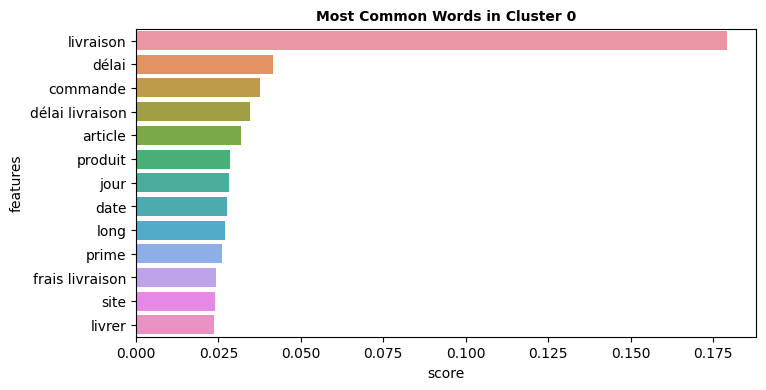

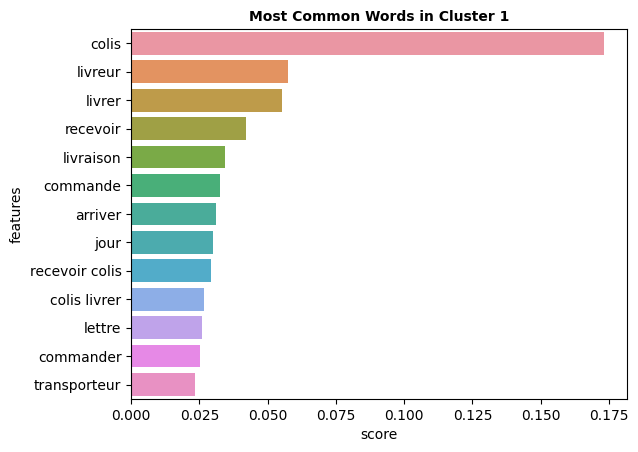

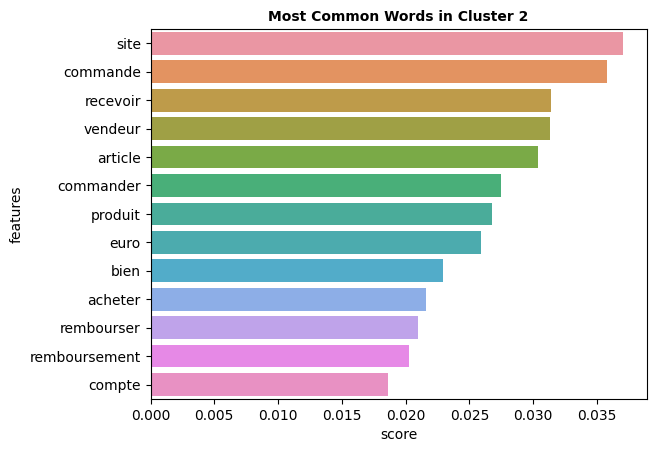

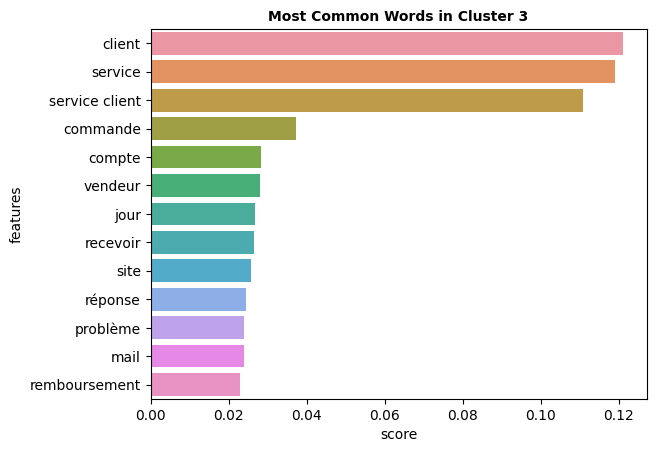

In [80]:
# Séléction du meilleur modèle et histogramme des mots
best_result = 4
kmeans_model = kmeans_results.get(best_result)

final_df_array = tf_idf.to_numpy()
prediction = kmeans_model.predict(tf_idf)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

livraison 0.17911373296123634
délai 0.04169187615273604
commande 0.037681542942669
délai livraison 0.034609998062461185
article 0.03181410867004481
produit 0.028541280142144784
jour 0.028108970797097264
date 0.027611238347380364
long 0.02698285762488458
prime 0.026161509677815345
frais livraison 0.024216511150424013
site 0.02401130023352825
livrer 0.023680374402335842
frais 0.02350420005335658
commander 0.022632354247259463
service 0.022551087649649228
prix 0.022143693268591842
date livraison 0.02194659888250591
livraison long 0.019910022829470006
bien 0.018298206699144882


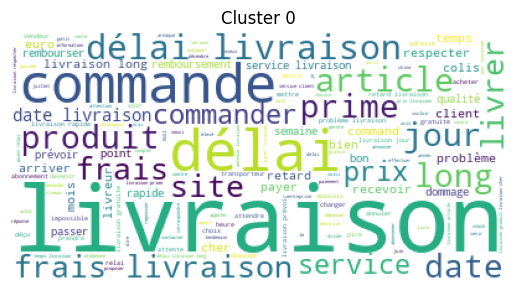

colis 0.172989671618443
livreur 0.0575287512238785
livrer 0.05521122664142049
recevoir 0.04196111123430092
livraison 0.03448498714324613
commande 0.03243040601125247
arriver 0.03103102487183721
jour 0.030029202763770392
recevoir colis 0.02929273023683866
colis livrer 0.026717694632453232
lettre 0.025776038794225693
commander 0.02528411589187604
transporteur 0.023430694053123674
client 0.022173478880679286
service 0.02195812554694568
remboursement 0.021782327593251802
bien 0.02170060461386511
colis arriver 0.02106421932471424
rembourser 0.020689160126822436
boîte 0.01923342675873744


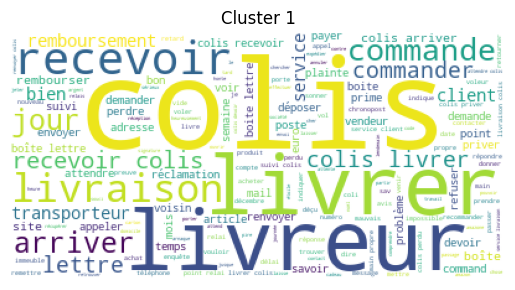

site 0.03703232493145101
commande 0.03580266150008333
recevoir 0.03139992477165667
vendeur 0.03130003434954401
article 0.03034307620878395
commander 0.02745724659912716
produit 0.026774711152526706
euro 0.025936520659303446
bien 0.022961528960072863
acheter 0.02160215808224432
rembourser 0.020937349164794356
remboursement 0.020262523425933678
compte 0.018586226839384365
mois 0.018434903153840772
achat 0.01803471949451875
jour 0.017006830555062566
bon 0.016603053722432867
payer 0.015231536978208567
prix 0.01457658177282546
frais 0.01418661351769397


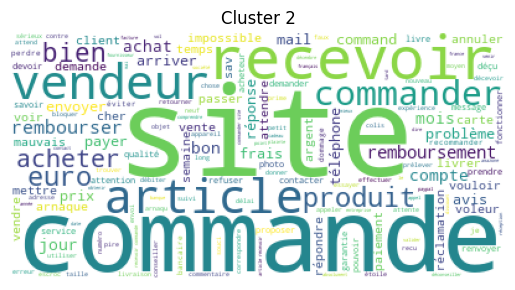

client 0.1211188189463363
service 0.11907550008739533
service client 0.11090476947276685
commande 0.03731795244262102
compte 0.02827410438799456
vendeur 0.028039099157831142
jour 0.02671005808438029
recevoir 0.02649877052769006
site 0.025822880041473657
réponse 0.024565111880331784
problème 0.02386744708250797
mail 0.023846727827162226
remboursement 0.023011983721674796
euro 0.022448092366796818
rembourser 0.021793012375306998
commander 0.02108427396322839
contacter 0.020970846877995206
produit 0.02088047404292581
article 0.020656717170042464
mois 0.01911258335453739


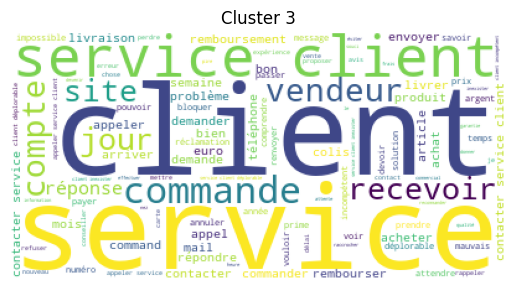

In [83]:
# Word clouds
centroids = pd.DataFrame(kmeans_model.cluster_centers_)
centroids.columns = tf_idf.columns
generateWordClouds(centroids)

In [84]:
commentaire_par_cluster={}
for i, xcluster in enumerate(kmeans_model.labels_):
    if xcluster not in commentaire_par_cluster.keys():
        commentaire_par_cluster[xcluster]=[]
    commentaire_par_cluster[xcluster].append(df_bad["commentaireAmeliore"][i])


Trigrammes les plus intéressants pour la liste '2':
Top 10 des trigrammes les plus intéressants :
vendeur chinois envoyer (0.66)
acheter téléphone vendeur (0.51)
adresse postal adresser (0.35)
répondre adresse postal (0.35)
mail répondre adresse (0.35)
adresse mail répondre (0.35)
réclamation sourde oreill (0.35)
téléphone vendeur chinois (0.35)
vente numéro commande (0.18)
service vente numéro (0.18)
question service vente (0.18)
préférable question service (0.18)
nettement préférable question (0.18)
acheter nettement préférable (0.18)
possibilité acheter nettement (0.18)
éloge possibilité acheter (0.18)
lettre éloge possibilité (0.18)
adresser lettre éloge (0.18)
postal adresser lettre (0.18)
proposer adresse mail (0.18)


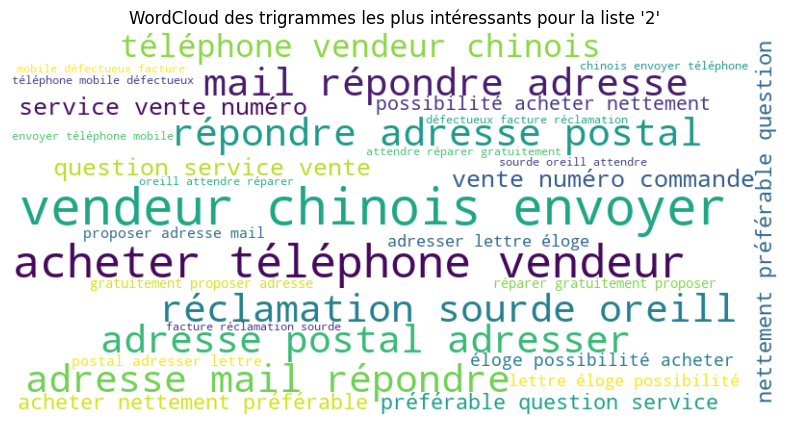

---
Trigrammes les plus intéressants pour la liste '3':
Top 10 des trigrammes les plus intéressants :
le service client (6.38)
dommage mois dénouement (0.25)
rembourser dommage mois (0.25)
compéter rembourser dommage (0.25)
client compéter rembourser (0.25)
service client compéter (0.25)
câble le service (0.25)
recevoir câble le (0.25)
smartphone recevoir câble (0.25)
place smartphone recevoir (0.25)
vendeur place smartphone (0.25)
contact vendeur place (0.25)
parvenir contact vendeur (0.25)
smartphone parvenir contact (0.25)
effectuer smartphone parvenir (0.25)
command effectuer smartphone (0.25)
client insupportable command (0.00)
service client insupportable (0.00)
robot service client (0.00)
débattre robot service (0.00)


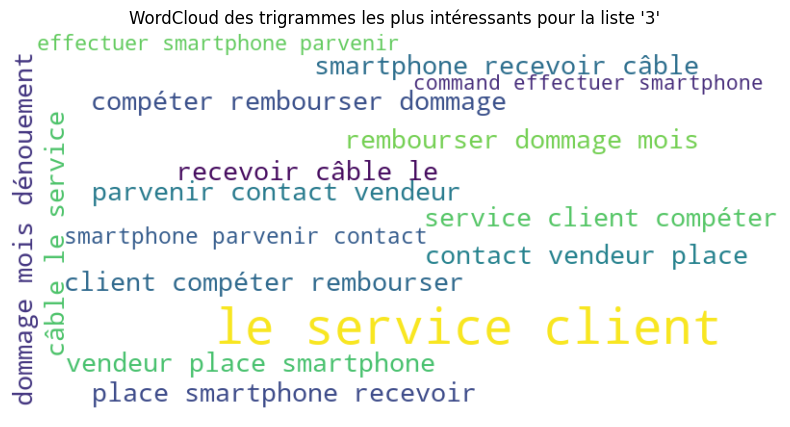

---
Trigrammes les plus intéressants pour la liste '1':
Top 10 des trigrammes les plus intéressants :
litige mordre doigt (0.20)
acheter litige mordre (0.20)
jour acheter litige (0.20)
appeler jour acheter (0.20)
livraison appeler jour (0.20)
société livraison appeler (0.20)
choisir société livraison (0.20)
faute choisir société (0.20)
rejeter faute choisir (0.20)
semaine rejeter faute (0.20)
supplémentaire semaine rejeter (0.20)
délai supplémentaire semaine (0.20)
enquête délai supplémentaire (0.20)
prétexter enquête délai (0.20)
rembourser prétexter enquête (0.20)
refuser rembourser prétexter (0.20)
perdre refuser rembourser (0.20)
voler perdre refuser (0.20)
chronopost voler perdre (0.20)
charge chronopost voler (0.20)


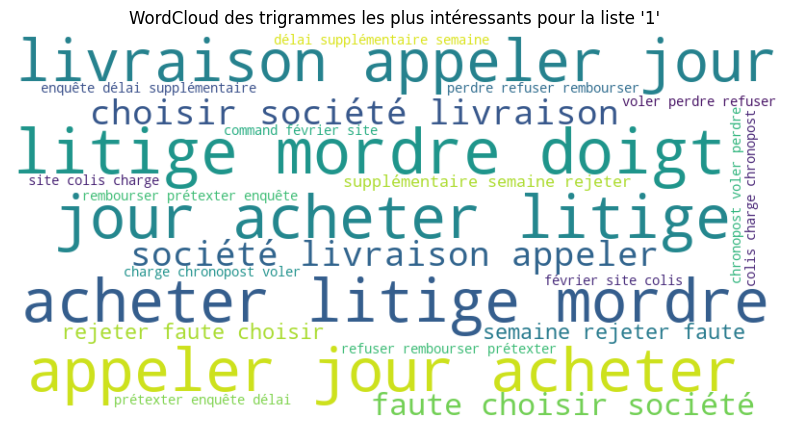

---
Trigrammes les plus intéressants pour la liste '0':
Top 10 des trigrammes les plus intéressants :
délai livraison produit (1.14)
long délai livraison (1.14)
produit basique sodastream (0.32)
livraison produit basique (0.32)
performant long délai (0.32)
pas performant long (0.32)
boulanger pas performant (0.32)
marchand boulanger pas (0.32)
site marchand boulanger (0.32)
malheureusement site marchand (0.32)
attention service livraison (0.00)
neuf attention service (0.00)
chose neuf attention (0.00)
trouver chose neuf (0.00)
changer livreur colis (0.00)
fortement changer livreur (0.00)
espérer fortement changer (0.00)
garde espérer fortement (0.00)
livraison garde espérer (0.00)
partenaire livraison garde (0.00)


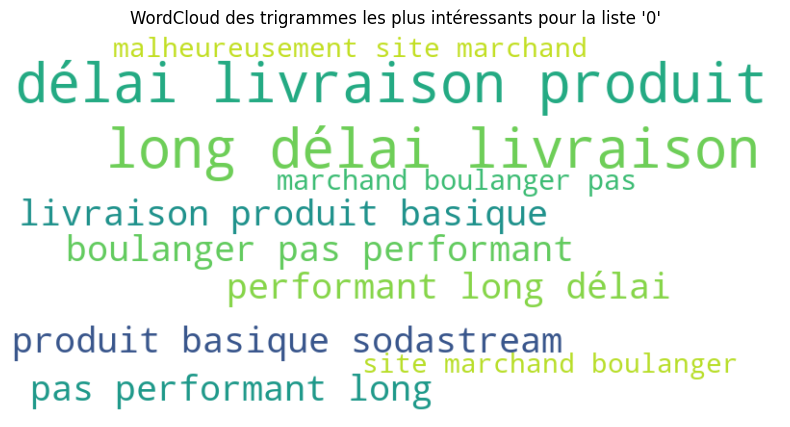

---


In [85]:
# Trigrams wordcloud par cluster
for key, value in commentaire_par_cluster.items():
    print(f"Trigrammes les plus intéressants pour la liste '{key}':")
    trigram_tfidf_scores = extraire_trigrammes_tfidf(value)

    # Créer un WordCloud à partir des trigrammes et de leurs scores TF-IDF
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_tfidf_scores)

    # Afficher le WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud des trigrammes les plus intéressants pour la liste '{key}'")
    plt.show()
    print('---')

In [86]:
find_common_trigrams(X, kmeans_model.labels_, tfidfvecto, 20)

Cluster 0: délai livraison long, délai livraison respecter, euro frais livraison, livraison point relai, contacter service client, produit mauvais qualité, livrer point relai, recevoir mail indiquer, recevoir article commander, service client déplorable, commander article recevoir, site vente ligne, appeler service client, le service client, joindre service client, réponse service client, service client demande, bon achat euro, livrer main propre, service client réponse
Cluster 1: remettre main propre, colis boîte lettre, livrer boîte lettre, livrer main propre, livrer boite lettre, livrer point relai, appeler service client, contacter service client, appel service client, livraison point relai, le service client, déconseiller fortement site, remboursement service client, contact service client, porter plainte contre, service client répondre, joindre service client, recevoir mail confirmation, service après vent, réponse service client
Cluster 2: commander article recevoir, service apr

#### Commentaires positifs

In [87]:
df_good = df[df['type'] == 1]
tfidfvecto =TfidfVectorizer(ngram_range=(1,3),max_features=3000)
corpus=df_good["commentaireAmeliore"].values
X = tfidfvecto.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=tfidfvecto.get_feature_names_out())
df_good.reset_index(inplace=True)

In [88]:
# Running Kmeans
k = 5
kmeans_results = run_KMeans(k, tf_idf)

In [89]:
# Plotting Silhouette Analysis
%%skip
silhouette(kmeans_results, tf_idf, plot=True)

UsageError: Line magic function `%%skip` not found.


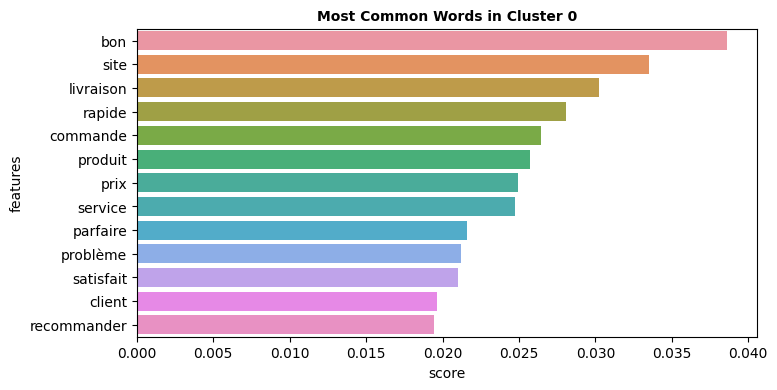

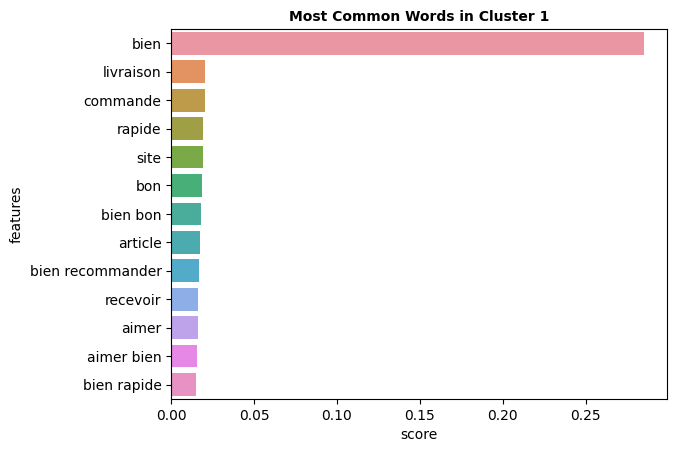

In [90]:
# Séléction du meilleur modèle
best_result = 2
kmeans_model = kmeans_results.get(best_result)

final_df_array = tf_idf.to_numpy()
prediction = kmeans_model.predict(tf_idf)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

bon 0.03864228055838668
site 0.03351756414737983
livraison 0.030248542384555356
rapide 0.028070585638051357
commande 0.026462917829926633
produit 0.025698681731745273
prix 0.02491892298080818
service 0.02472568240384422
parfaire 0.02157392908211518
problème 0.02119054464858954
satisfait 0.021007211351550793
client 0.019620612560711043
recommander 0.019434504833672747
article 0.019202572456178253
achat 0.018375223513695905
satisfaire 0.01771501521455013
super 0.01679100369743579
vendeur 0.01553894978770177
qualité 0.014693720373503057
choix 0.014407613288799881


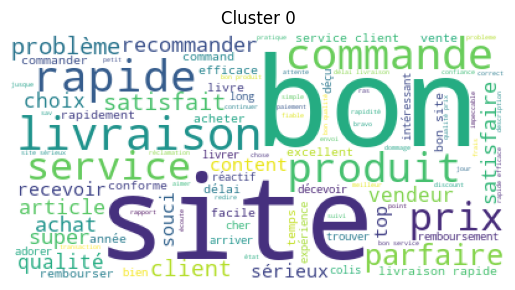

bien 0.28504837145281176
livraison 0.020165496382437267
commande 0.020110739121251636
rapide 0.019230151026966534
site 0.01910255880737735
bon 0.018419190041677594
bien bon 0.01766623749143898
article 0.01704869156744431
bien recommander 0.01656271764925398
recevoir 0.016091371771925867
aimer 0.016019484022042563
aimer bien 0.015272303804990573
bien rapide 0.015040375187783188
produit 0.01464276676171801
recommander 0.014517705152498856
emballer 0.014249200496703914
bien emballer 0.014206274178163347
site bien 0.01408234643515049
super 0.013298032433520967
bien recevoir 0.01237342996489524


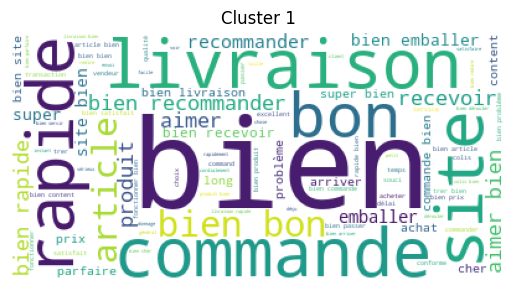

In [93]:
# Word clouds
centroids = pd.DataFrame(kmeans_model.cluster_centers_)
centroids.columns = tf_idf.columns
generateWordClouds(centroids)

In [94]:
commentaire_par_cluster={}
for i, xcluster in enumerate(kmeans_model.labels_):
    if xcluster not in commentaire_par_cluster.keys():
        commentaire_par_cluster[xcluster]=[]
    commentaire_par_cluster[xcluster].append(df_good["commentaireAmeliore"][i])

Trigrammes les plus intéressants pour la liste '0':
Top 10 des trigrammes les plus intéressants :
pouvoir trouver produit (0.47)
site agréable visiter (0.47)
recommande essayer bémol (0.24)
fidélité recommande essayer (0.24)
programme fidélité recommande (0.24)
cumuler programme fidélité (0.24)
pouvoir cumuler programme (0.24)
top pouvoir cumuler (0.24)
point top pouvoir (0.24)
occasion point top (0.24)
produit occasion point (0.24)
trouver produit occasion (0.24)
génial pouvoir trouver (0.24)
utiliser génial pouvoir (0.24)
facile utiliser génial (0.24)
visiter facile utiliser (0.24)
agréable visiter facile (0.24)
colis impeccable ras (0.00)
commande colis impeccable (0.00)
indiquer commande colis (0.00)


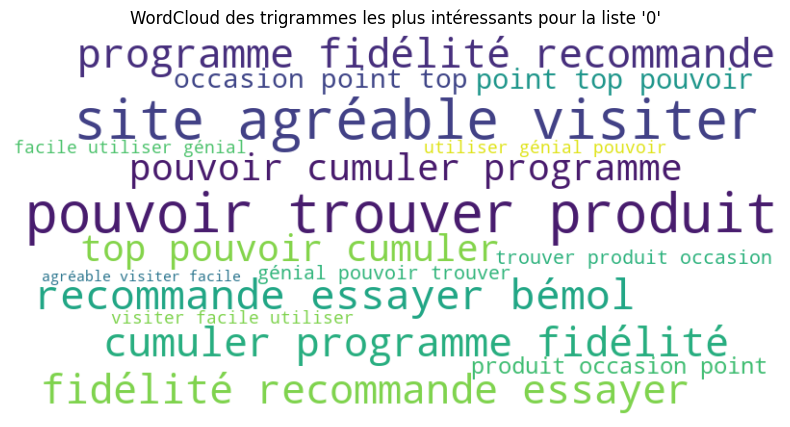

---
Trigrammes les plus intéressants pour la liste '1':
Top 10 des trigrammes les plus intéressants :
indisponibilité acheter recharge (0.38)
chose indisponibilité acheter (0.38)
élevé chose indisponibilité (0.38)
prix élevé chose (0.38)
aimer prix élevé (0.38)
vente aimer prix (0.38)
bien vente aimer (0.38)
pro obligatoirement compétent (0.00)
vendeur pro obligatoirement (0.00)
bien vendeur pro (0.00)
surveiller bien vendeur (0.00)
rakuten surveiller bien (0.00)
bien rakuten surveiller (0.00)
finir bien rakuten (0.00)
suivi finir bien (0.00)
mériter suivi finir (0.00)
ramasse mériter suivi (0.00)
transporteur ramasse mériter (0.00)
égarer transporteur ramasse (0.00)
colis égarer transporteur (0.00)


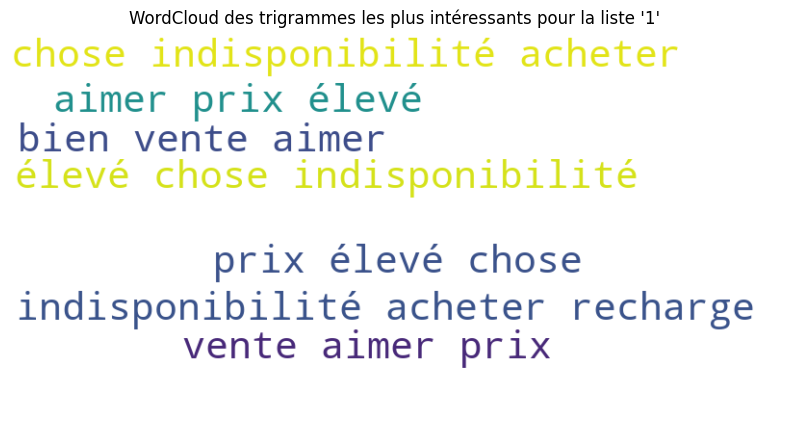

---


In [95]:
for key, value in commentaire_par_cluster.items():
    print(f"Trigrammes les plus intéressants pour la liste '{key}':")
    trigram_tfidf_scores = extraire_trigrammes_tfidf(value)

    # Créer un WordCloud à partir des trigrammes et de leurs scores TF-IDF
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_tfidf_scores)

    # Afficher le WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud des trigrammes les plus intéressants pour la liste '{key}'")
    plt.show()
    print('---')

In [96]:
find_common_trigrams(X, kmeans_model.labels_, tfidfvecto, 20)

Cluster 0: rapport qualité prix, bon rapport qualité, service client réactif, service client top, délai livraison long, bon service client, bon site recommander, bon site vente, délai livraison respecter, bon site bon, service client efficace, prix livraison rapide, livraison rapide produit, produit bon qualité, livre bon état, bon site achat, produit conforme description, service après vent, service client écoute, site vente ligne
Cluster 1: bien recommander vivement, bien livraison rapide, bien bon produit, bien livraison long, commande bien passer, excellent bien recommander, colis bien emballer, rapide bien emballer, bien recevoir colis, bien recevoir commande, rapport qualité prix, article bien emballer, livraison rapide bien, site bien concevoir, envoi rapide bien, bon rapport qualité, bon site achat, bien lire descriptif, bien lire description, service client bien
Trigrams communs : bon rapport qualité, rapport qualité prix, bon site achat


### Analyse hiérarchique

#### Commentaires négatifs

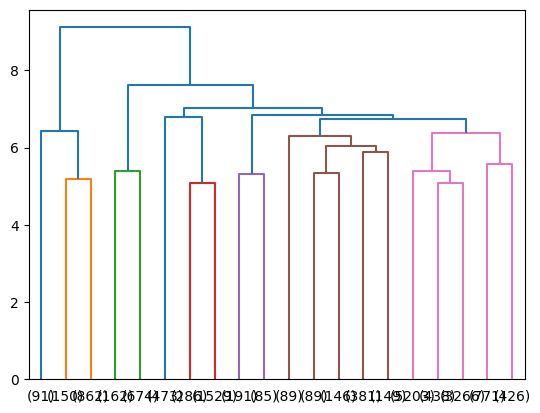

In [221]:
# Analyse dendogramme 
vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X = vectorizer.fit_transform(df_bad["commentaireAmeliore"])

# Calcul de la matrice de liaison
linkage_matrix = linkage(X.toarray(), method='ward')

# Affichage du dendrogramme
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, orientation='top', leaf_font_size=10)
plt.show()

In [222]:
# préparation des données pour hierarchical et fit du modèle
vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X = vectorizer.fit_transform(df_bad["commentaireAmeliore"])

# Création du modèle de clustering avec AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X.toarray())

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [223]:
print_top_features_in_cluster(X, model.labels_, vectorizer, 20)

Cluster 0: site, vendeur, article, recevoir, commande, produit, client, commander, service, euro, bien, livraison, remboursement, rembourser, acheter, mois, jour, bon, colis, achat
Cluster 1: commande, livraison, service, client, service client, jour, recevoir, arriver, command, colis, commander, livrer, prime, annuler, site, délai, article, date, produit, remboursement
Cluster 2: compte, carte, bancaire, paiement, commande, euro, bloquer, carte bancaire, site, client, prélever, payer, banque, paypal, service, achat, cb, pirater, jour, commander
Cluster 3: colis, livreur, livrer, livraison, lettre, recevoir, commande, service, boîte, point, relai, client, point relai, boîte lettre, transporteur, jour, colis livrer, poste, commander, bien


In [224]:
print_top_trigrams_in_cluster(X, model.labels_, vectorizer, 20)

Cluster 0: contacter service client, délai livraison long, service après vent, appel service client, commander article recevoir, appeler service client, déconseiller fortement site, article mauvais qualité, produit mauvais qualité, joindre service client, service client réponse, site vente ligne, site service client, impossible contacter service, service client répondre, réclamation service client, euro frais livraison, mail service client, bon achat euro, porter plainte contre
Cluster 1: contacter service client, service client déplorable, service client inexister, service client incompétent, appeler service client, service client répondre, recevoir service client, réponse service client, délai livraison respecter, le service client, contact service client, remboursement service client, service client téléphone, recevoir mail confirmation, recevoir mail indiquer, service client rembourser, appel service client, rappeler service client, mail service client, impossible contacter service

In [225]:
print_common_trigrams_in_clusters(X, model.labels_, vectorizer, 20)

Trigrammes communs :
contacter service client
appel service client
appeler service client
produit mauvais qualité
joindre service client
impossible contacter service
service client répondre
réclamation service client
euro frais livraison
mail service client
porter plainte contre
service client déplorable
service client inexister
réponse service client
le service client
contact service client
remboursement service client
recevoir mail confirmation
service client rembourser
rappeler service client
service client demande
téléphone service client


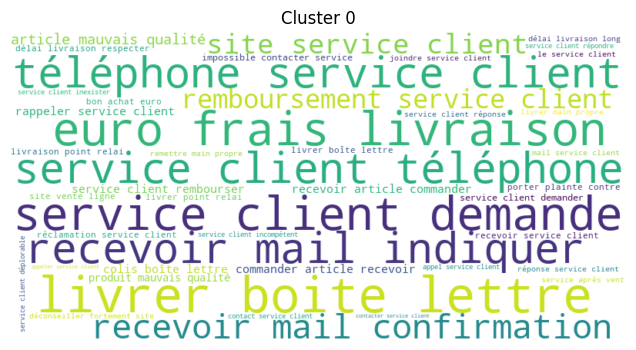

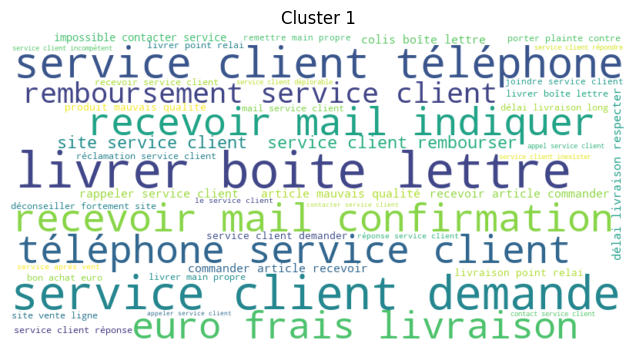

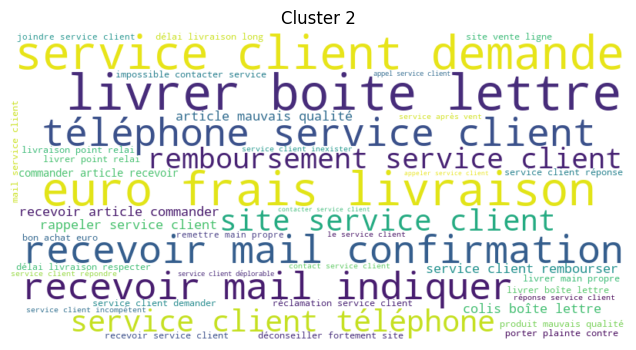

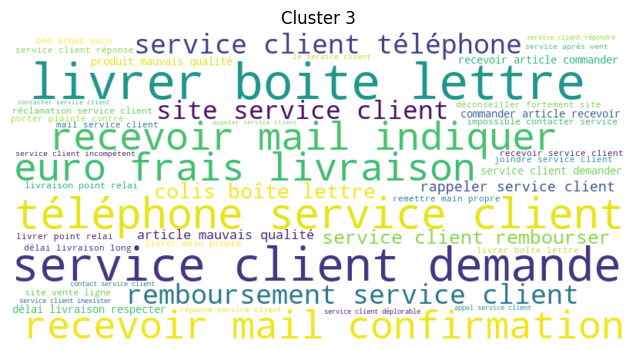

In [226]:
create_wordcloud(X, model.labels_, vectorizer)

#### Commentaires positifs

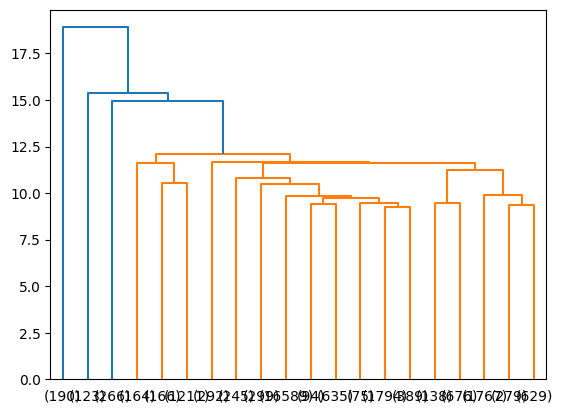

In [227]:
# Analyse dendogramme
vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X = vectorizer.fit_transform(df_good["commentaireAmeliore"])

# Calcul de la matrice de liaison
linkage_matrix = linkage(X.toarray(), method='ward')

# Affichage du dendrogramme
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, orientation='top', leaf_font_size=10)
plt.show()

In [228]:
# préparation des données pour hierarchical et fit du model
vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X = vectorizer.fit_transform(df_bad["commentaireAmeliore"])

# Création du modèle de clustering avec AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X.toarray())

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


AgglomerativeClustering(affinity='euclidean')

In [229]:
print_top_features_in_cluster(X, model.labels_, vectorizer, 20)

Cluster 0: commande, site, recevoir, client, service, article, vendeur, livraison, commander, produit, euro, bien, jour, remboursement, rembourser, service client, colis, acheter, compte, mois
Cluster 1: colis, livreur, livrer, livraison, lettre, recevoir, commande, service, boîte, point, relai, client, point relai, boîte lettre, transporteur, jour, colis livrer, poste, commander, bien


In [230]:
print_top_trigrams_in_cluster(X, model.labels_, vectorizer, 20)

Cluster 0: contacter service client, appeler service client, service client déplorable, service client inexister, service client répondre, service client incompétent, appel service client, délai livraison long, réponse service client, service après vent, contact service client, le service client, recevoir service client, commander article recevoir, délai livraison respecter, article mauvais qualité, déconseiller fortement site, joindre service client, impossible contacter service, service client réponse
Cluster 1: remettre main propre, livrer main propre, livrer boîte lettre, colis boîte lettre, livrer point relai, livraison point relai, livrer boite lettre, appeler service client, contacter service client, appel service client, contact service client, le service client, joindre service client, service client rembourser, réclamation service client, service client demande, téléphone service client, réponse service client, rappeler service client, remboursement service client


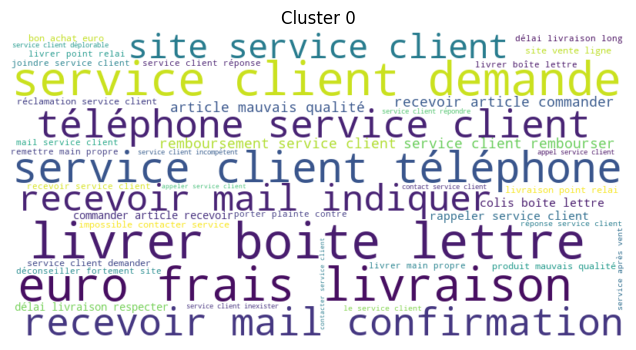

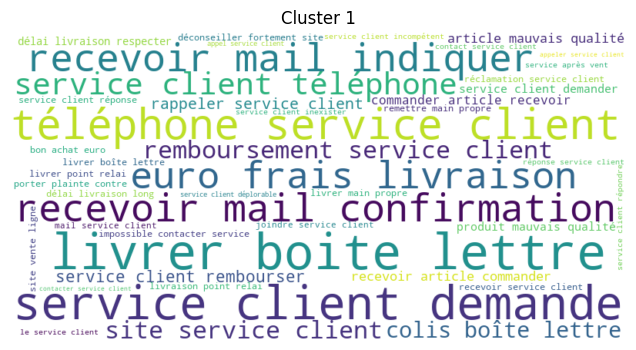

In [231]:
create_wordcloud(X, model.labels_, vectorizer)

# Sauvegarde des modèles et préparation pour le streamlit

## Entraînement des modèles

In [232]:
# Importation des données
%%skip
dfrakuten=pd.read_excel(r"Rakuten.xlsx")
dfrakuten["Site"]="Rakuten"
dfamazon=pd.read_excel(r"Amazon.xlsx")
dfamazon["Site"]="Amazon"
dfwish=pd.read_excel(r"Wish.xlsx")
dfwish["Site"]="Wish"
dfcdiscount=pd.read_excel(r"Cdiscount.xlsx")
dfcdiscount["Site"]="Cdiscount"
df = pd.concat([dfrakuten, dfcdiscount, dfamazon,dfwish], ignore_index=True)
del dfrakuten, dfcdiscount, dfwish, dfamazon

UsageError: Line magic function `%%skip` not found.


In [233]:
# Preprocess Data pour les pipeline
%%skip
df=preprocessDataBIS(df)

UsageError: Line magic function `%%skip` not found.


In [234]:
df=pd.read_csv(r"Train.csv")
# Convertir la colonne "commentaire" en str
df['commentaire'] = df['commentaire'].astype(str)

# Convertir la colonne "commentaireAmeliore" en str
df['commentaireAmeliore'] = df['commentaireAmeliore'].astype(str)

In [235]:
# choix des train et train labels
train=df.drop(columns=["note","type"])
train_labels=df["type"]

In [236]:
# Undersampling des données
# rus=RandomUnderSampler()
# train,train_labels=rus.fit_resample(train,train_labels)

In [237]:
# Pipeline Foret aleatoire
pipeline_RF = make_pipeline( PretraitementRF(), RandomForestClassifier(criterion='gini', n_estimators=100))

In [238]:
pipeline_RF.fit(train,train_labels)

Pipeline(steps=[('pretraitementrf', PretraitementRF()),
                ('randomforestclassifier', RandomForestClassifier())])

In [239]:
# Pipeline Regression lineaire
pipeline_RL = make_pipeline(PretraitementRL(),TfidfVectorizer(min_df=1e-08, max_features=50000,  ngram_range=(1, 5)), LogisticRegression(C=5,max_iter=2000))

In [240]:
pipeline_RL.fit(train,train_labels)

Pipeline(steps=[('pretraitementrl', PretraitementRL()),
                ('tfidfvectorizer',
                 TfidfVectorizer(max_features=50000, min_df=1e-08,
                                 ngram_range=(1, 5))),
                ('logisticregression', LogisticRegression(C=5, max_iter=2000))])

In [241]:
import MLPpretrait as MP

In [242]:
# Modele MLP
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(8000, 16, input_length=200),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
MLP_model_Keras=create_model()

In [243]:
preMLP=MP.PretraitementMLP()
preMLPsuit=MP.PretraitementMLPsuite()
train_padded=preMLPsuit.fit_transform(preMLP.fit_transform(train,train_labels))
MLP_model_Keras.fit(train_padded, train_labels, batch_size=30, epochs=4)

Epoch 1/4
1386/1386 [==============================] - 85s 3ms/step - loss: 0.4534 - accuracy: 0.7857
Epoch 2/4
1386/1386 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8923
Epoch 3/4
1386/1386 [==============================] - 3s 2ms/step - loss: 0.2367 - accuracy: 0.9108
Epoch 4/4
1386/1386 [==============================] - 3s 2ms/step - loss: 0.2174 - accuracy: 0.9185


## Test des modèles

In [244]:
#Importation d'un nouveau jeu de données TEST
dfsh = pd.read_excel("Shein.xlsx")
Test = preprocessDataBIS(dfsh)

In [245]:
#Préparation des données
Testvalue=Test.drop(columns=["note","type"])
Testlabels=Test["type"]

In [246]:
test_padded=preMLPsuit.transform(preMLP.transform(Testvalue))
pred = MLP_model_Keras.predict(test_padded)

44/44 [==============================] - 0s 1ms/step


In [247]:
predictionMLP=[]
for i in pred:
    if i >0.5:
        predictionMLP.append(1)
    else:
        predictionMLP.append(0)

In [248]:
print(classification_report(predictionMLP,Testlabels))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72       180
           1       0.99      0.90      0.94      1223

    accuracy                           0.91      1403
   macro avg       0.79      0.92      0.83      1403
weighted avg       0.94      0.91      0.92      1403



In [249]:
predictionRL=pipeline_RL.predict(Testvalue)

In [250]:
print(classification_report(predictionRL,Testlabels))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       254
           1       0.97      0.94      0.96      1149

    accuracy                           0.93      1403
   macro avg       0.87      0.90      0.89      1403
weighted avg       0.93      0.93      0.93      1403



In [251]:
predictionRF=pipeline_RF.predict(Testvalue)

In [252]:
print(classification_report(predictionRF,Testlabels))

              precision    recall  f1-score   support

           0       0.44      0.63      0.52       198
           1       0.93      0.87      0.90      1205

    accuracy                           0.83      1403
   macro avg       0.69      0.75      0.71      1403
weighted avg       0.86      0.83      0.85      1403



In [253]:
predictionbagg=[]
for i in range(len(predictionMLP)):
    preds=predictionMLP[i]+predictionRF[i]+predictionRL[i]
    if preds>=2:
        predictionbagg.append(1)
    else:
        predictionbagg.append(0)

In [254]:
print(classification_report(predictionbagg,Testlabels))

              precision    recall  f1-score   support

           0       0.60      0.92      0.73       185
           1       0.99      0.91      0.95      1218

    accuracy                           0.91      1403
   macro avg       0.79      0.92      0.84      1403
weighted avg       0.94      0.91      0.92      1403



## Sauvegarde des modèles

In [255]:
import joblib

filename = 'RF.sav'
joblib.dump((pipeline_RF.named_steps['randomforestclassifier']), filename,compress=True)


['RF.sav']

In [256]:
filename = 'RL.sav'
joblib.dump((pipeline_RL.named_steps['logisticregression']), filename,compress=True)

filename = 'TRL.sav'
joblib.dump((pipeline_RL.named_steps['tfidfvectorizer']), filename,compress=True)

['TRL.sav']

In [257]:
MLP_model_Keras.save("my_model.h5")

In [258]:
filename="PMLP.sav"
joblib.dump((preMLPsuit,preMLP), filename,compress=True)

['PMLP.sav']

## Utilisation des modèles

In [259]:
RFsave=joblib.load("RF.sav")

In [260]:
predictionRF=RFsave.predict(Testvalue.drop(["commentaire", "commentaireAmeliore"], axis=1))

X has feature names, but RandomForestClassifier was fitted without feature names


In [261]:
print(classification_report(predictionRF,Testlabels))

              precision    recall  f1-score   support

           0       0.44      0.63      0.52       198
           1       0.93      0.87      0.90      1205

    accuracy                           0.83      1403
   macro avg       0.69      0.75      0.71      1403
weighted avg       0.86      0.83      0.85      1403



In [262]:
RLsave=joblib.load("RL.sav")
TRLsave=joblib.load("TRL.sav")

In [263]:
predictionRL=RLsave.predict(TRLsave.transform(Testvalue["commentaireAmeliore"]))

In [264]:
print(classification_report(predictionRL,Testlabels))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       254
           1       0.97      0.94      0.96      1149

    accuracy                           0.93      1403
   macro avg       0.87      0.90      0.89      1403
weighted avg       0.93      0.93      0.93      1403



In [265]:
from keras.models import load_model
preMLPsuitsave,preMLPsave=joblib.load("PMLP.sav")
MLPsave=load_model("my_model.h5")

In [266]:
predictionMLP=MLPsave.predict(preMLPsuitsave.transform(preMLP.transform(Testvalue)))

44/44 [==============================] - 0s 1ms/step


In [267]:
predictionMLPbis=[]
for i in predictionMLP:
    if i >0.5:
        predictionMLPbis.append(1)
    else:
        predictionMLPbis.append(0)

In [268]:
print(classification_report(predictionMLPbis,Testlabels))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72       180
           1       0.99      0.90      0.94      1223

    accuracy                           0.91      1403
   macro avg       0.79      0.92      0.83      1403
weighted avg       0.94      0.91      0.92      1403



In [269]:
predictionbagg=[]
for i in range(len(predictionMLP)):
    preds=predictionMLPbis[i]+predictionRF[i]+predictionRL[i]
    if preds>=2:
        predictionbagg.append(1)
    else:
        predictionbagg.append(0)

In [270]:
print(classification_report(predictionbagg,Testlabels))

              precision    recall  f1-score   support

           0       0.60      0.92      0.73       185
           1       0.99      0.91      0.95      1218

    accuracy                           0.91      1403
   macro avg       0.79      0.92      0.84      1403
weighted avg       0.94      0.91      0.92      1403

